<a href="https://colab.research.google.com/github/hamsikarammohan/Test/blob/main/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!cp -r /content/drive/MyDrive/MLProject/team_se7en/* .

In [9]:
from pandas import read_csv
import datetime
from math import sqrt
import numpy as np
from datetime import timedelta
import pandas as pd
import csv
import copy
from covid_forecasting import get_state_list
from string import digits
import matplotlib.pyplot as plt
import numpy as np
from os import listdir

In [10]:
df = pd.read_csv("./Predictions/cumulative_predictions.csv")

In [11]:
df

Date  ...  Wyoming-jh_death_weightedEnsemble_30
0   07-01-2021  ...                            774.493354
1   07-02-2021  ...                            771.663113
2   07-03-2021  ...                            771.895701
3   07-04-2021  ...                            772.134807
4   07-05-2021  ...                            774.153155
5   07-06-2021  ...                            774.947059
6   07-07-2021  ...                            775.184029
7   07-08-2021  ...                            774.108965
8   07-09-2021  ...                            771.615013
9   07-10-2021  ...                            772.037580
10  07-11-2021  ...                            772.085050
11  07-12-2021  ...                            774.210006
12  07-13-2021  ...                            774.251247
13  07-14-2021  ...                            771.767732
14  07-15-2021  ...                            771.795061
15  07-16-2021  ...                            771.992063
16  07-17-2021  ...                            771.917402
17  07-18-2021  ...                            771.990833
18  07-19-2021  ...                            771.836833
19  07-20-2021  ...                            772.303254
20  07-21-2021  ...                            772.062111
21  07-22-2021  ...                            771.980517
22  07-23-2021  ...                            772.217544
23  07-24-2021  ...                            772.453143
24  07-25-2021  ...                            774.832366
25  07-26-2021  ...                            774.923634
26  07-27-2021  ...                            774.895308
27  07-28-2021  ...                            771.984417
28  07-29-2021  ...                            772.163575
29  07-30-2021  ...                            772.230171
30  07-31-2021  ...                            772.467183

[31 rows x 36001 columns]

In [12]:
all_files = listdir('./Data/State_Data_Clean/')
states = [file.split('_')[0] for file in all_files]

In [13]:
data_source='cdc'
data_type = 'death'

In [14]:
states=states[:1]

# IGNORE 3 Cells below this

NameError: ignored

<Figure size 1080x1080 with 0 Axes>

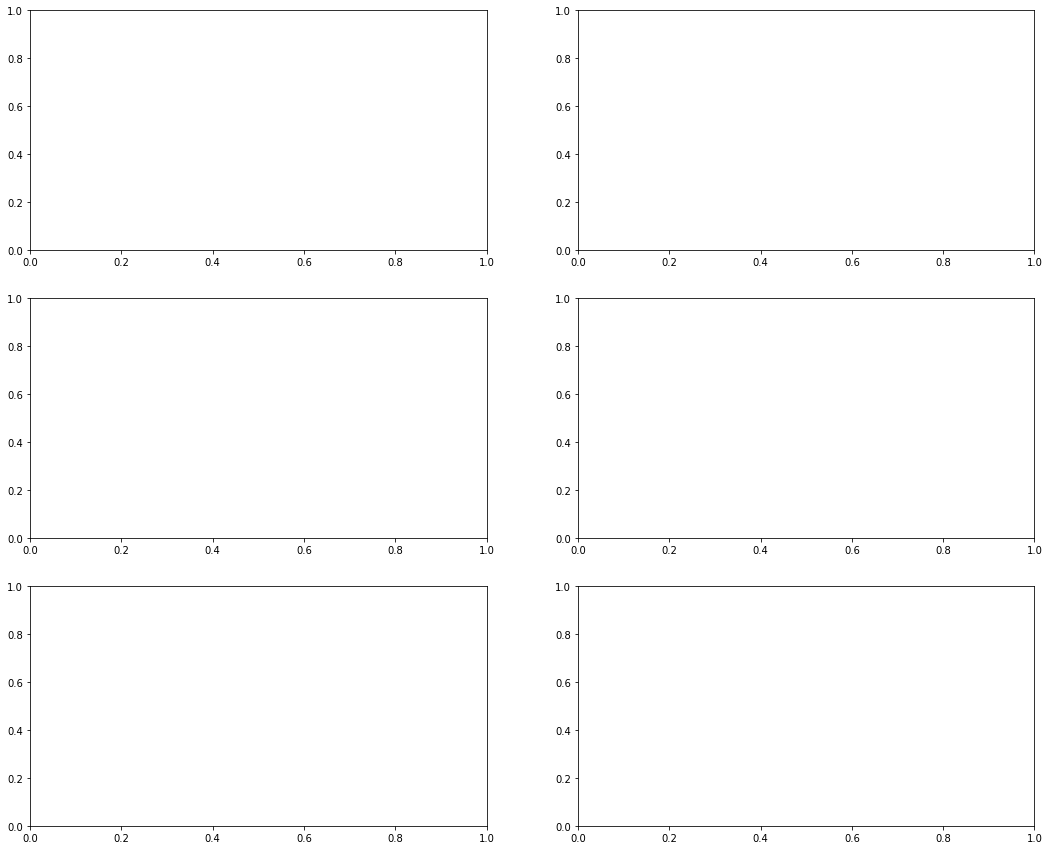

In [15]:
models = [data_type+'_decisionTree_predictions', data_type+'_randomForest_predictions', 'bagged_decisionTree_predictions', 'bagged_randomForest_predictions', 'weightedEnsemble']
models=models[:1]
days = np.arange(1,32)
for state in states:
    df_sub = df.loc[:, df.columns.str.contains(state)]
    df_sub = df_sub.loc[:, df_sub.columns.str.contains(data_source)]
    df_sub = df_sub.loc[:, df_sub.columns.str.contains(data_type)]
    plt.figure(1, figsize=(15, 15))
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
    for num in days[:31]:
        df_sub = df_sub.loc[:, df_sub.columns.str.endswith('_'+str(day))]
        actual = df_sub.loc[:, df_sub.columns.str.contains(data_type+'_truth')].to_numpy()
        for model in models:
            model_predictions[model]=[]
            df_model = df_sub.loc[:, df_sub.columns.str.contains(model)]
            model_predictions[model]=df_model.to_numpy().astype(int)
            if i==0:
                x=0
                y=0
            if i==1:
                x=0
                y=1
            if i==2:
                x=1
                y=0
            if i==3:
                x=1
                y=1
            if i==4:
                x=2
                y=0
            ax[x,y].plot(days, model_predictions[model], label=model)
            ax[x,y].plot(days, actual, label='Actual Deaths')
            ax[x,y].legend()
            ax[x,y].set_xlabel('Days in July 2021')
            ax[x,y].set_ylabel('Predicted/Actual Deaths')

In [ ]:
df_sub

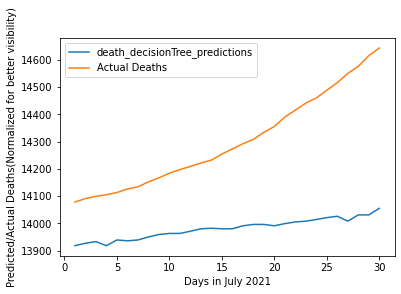

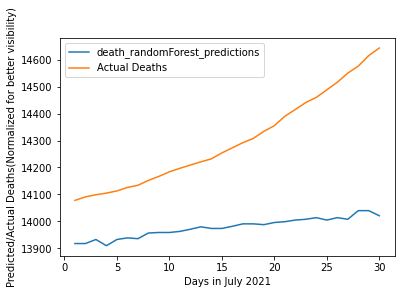

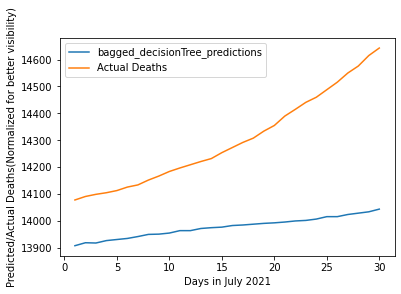

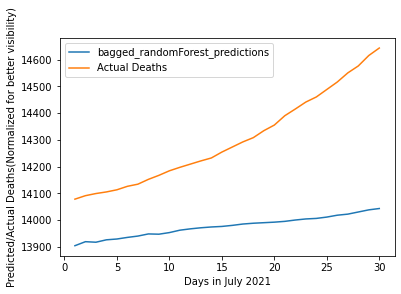

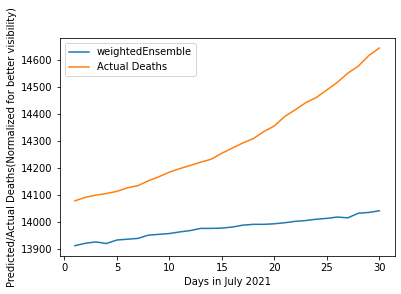

In [16]:
df_sub = df.iloc[-1:,:]
df_sub = df_sub.loc[:, df_sub.columns.str.contains(state)]
df_sub = df_sub.loc[:, df_sub.columns.str.contains('cdc')]
df_sub = df_sub.loc[:, df_sub.columns.str.contains('death')]
models = ['death_decisionTree_predictions', 'death_randomForest_predictions', 'bagged_decisionTree_predictions', 'bagged_randomForest_predictions', 'weightedEnsemble']
actual = df_sub.loc[:, df_sub.columns.str.contains('death_truth')].to_numpy().T
# actual = (actual-actual.mean())/(actual.std())


days = np.arange(1,31)
month='August'
model_predictions={}
for model in models:
    model_predictions[model]=[]
    df_model = df_sub.loc[:, df_sub.columns.str.contains(model)]
    model_predictions[model]=df_model.to_numpy().T.astype(int)
#     model_predictions[model] = (model_predictions[model]-model_predictions[model].mean())/(model_predictions[model].std())
#     print(df_model.to_numpy().T.shape)
    plt.plot(days, model_predictions[model], label=model)
    plt.plot(days, actual, label='Actual Deaths')
    plt.legend()
    plt.xlabel('Days in July 2021')
    plt.ylabel('Predicted/Actual Deaths(Normalized for better visibility)')
    plt.show()
# plt.plot(days, actual, label='actual')


# GRAPHS for website

<Figure size 1080x1080 with 0 Axes>

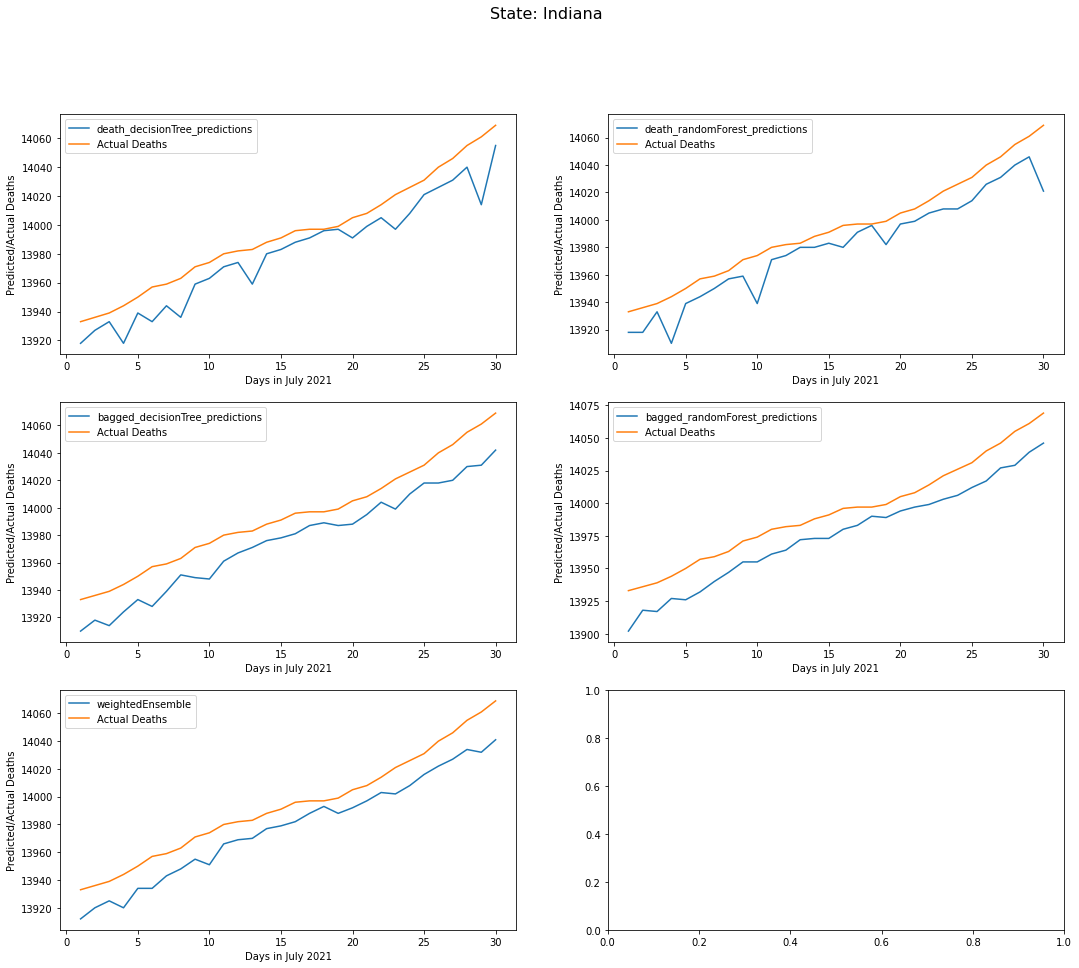

<Figure size 1080x1080 with 0 Axes>

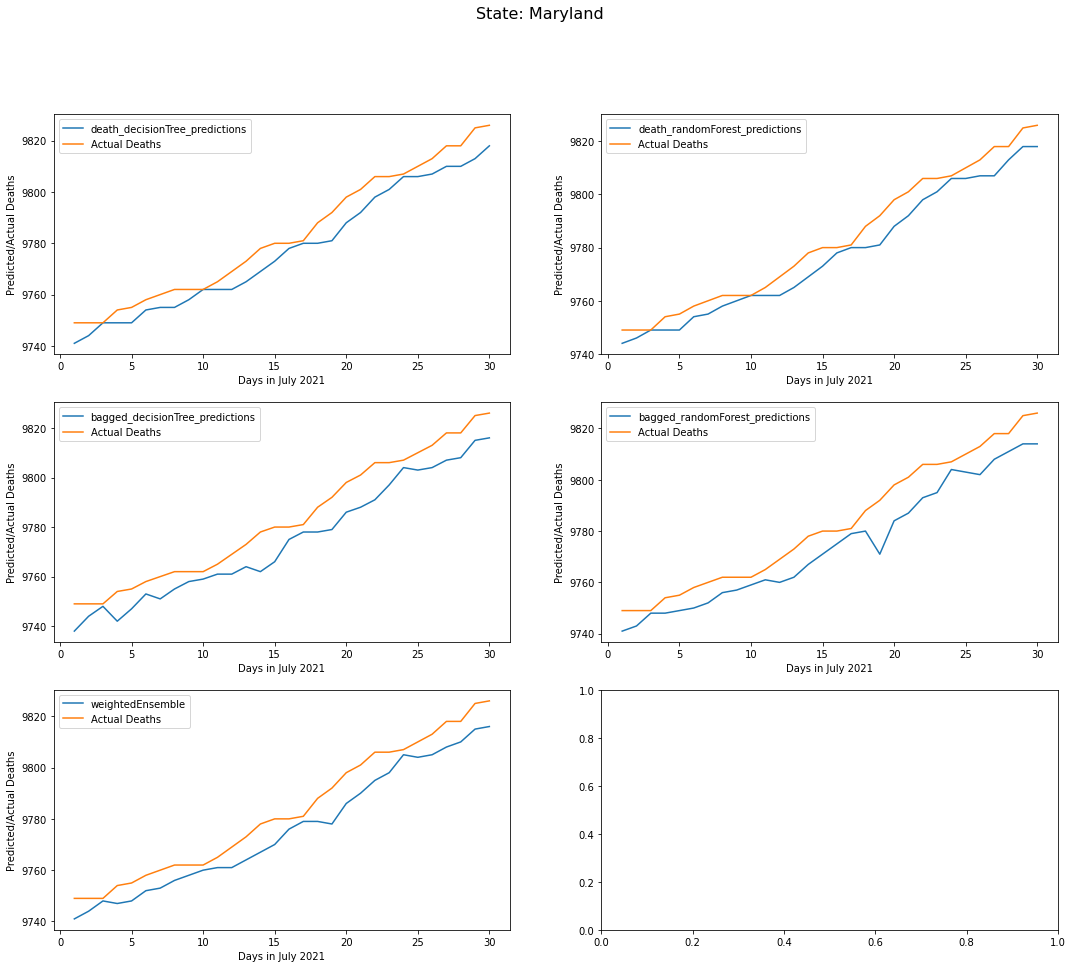

<Figure size 1080x1080 with 0 Axes>

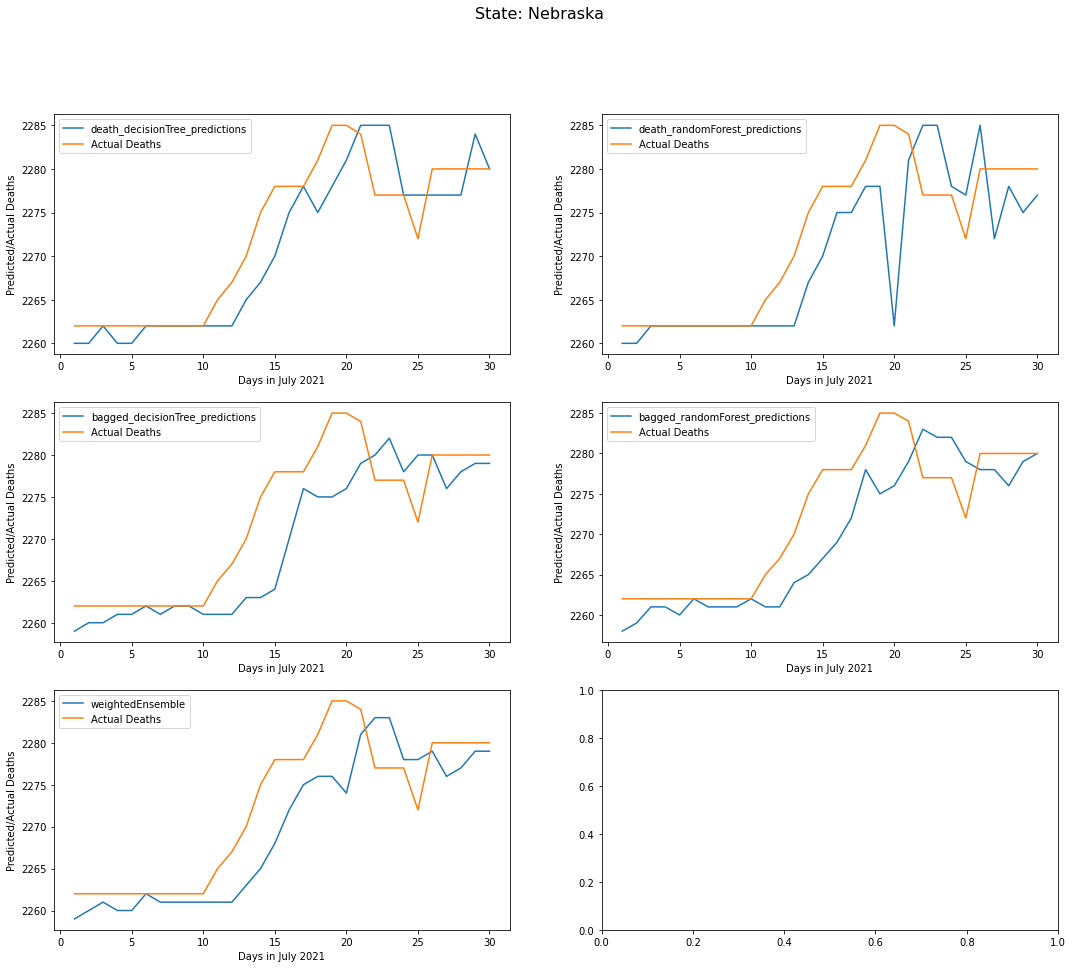

<Figure size 1080x1080 with 0 Axes>

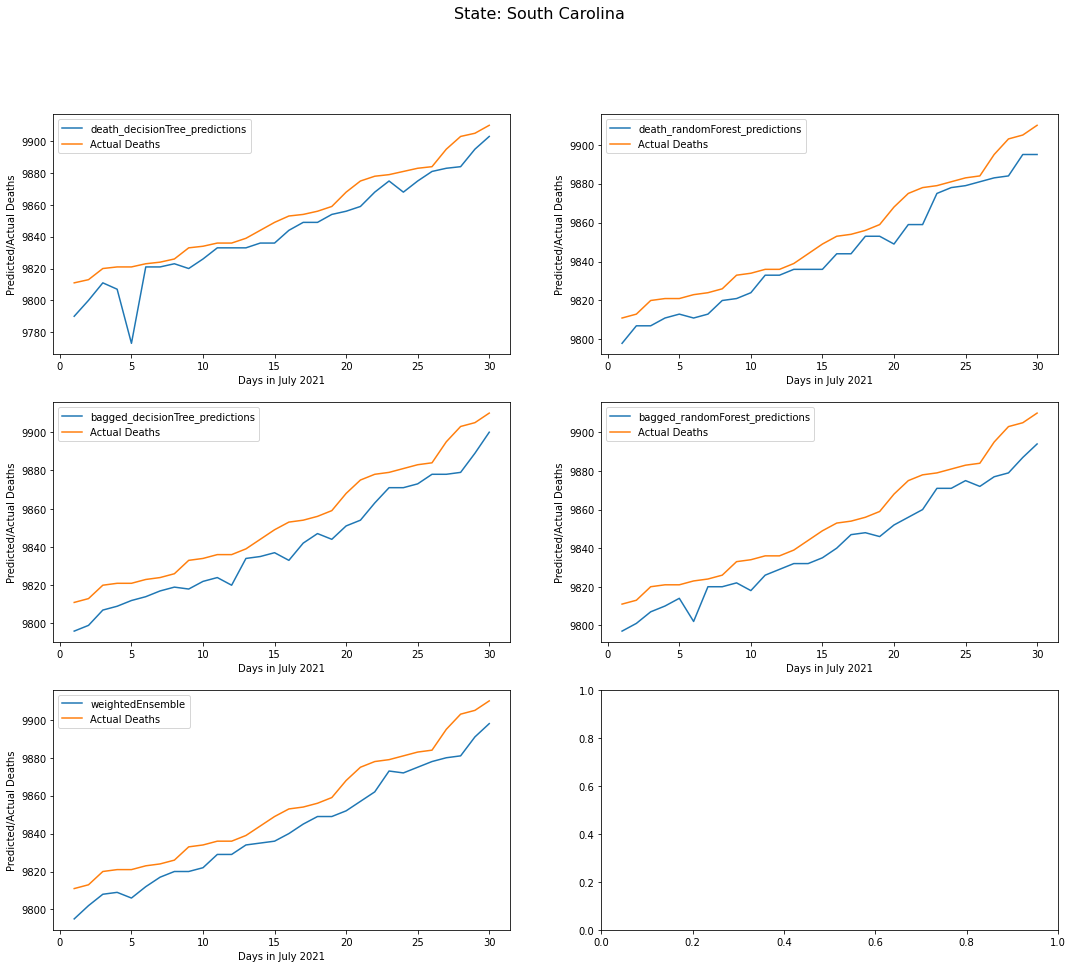

<Figure size 1080x1080 with 0 Axes>

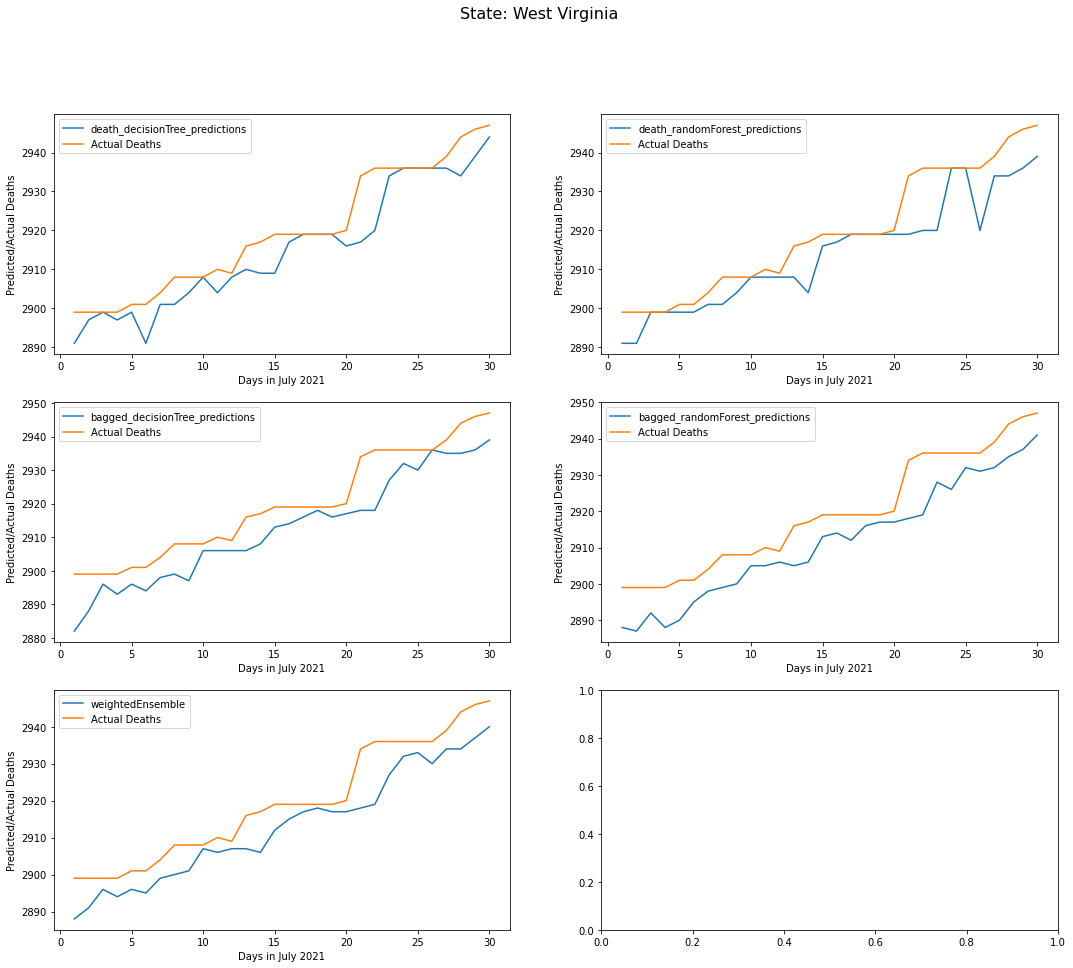

<Figure size 1080x1080 with 0 Axes>

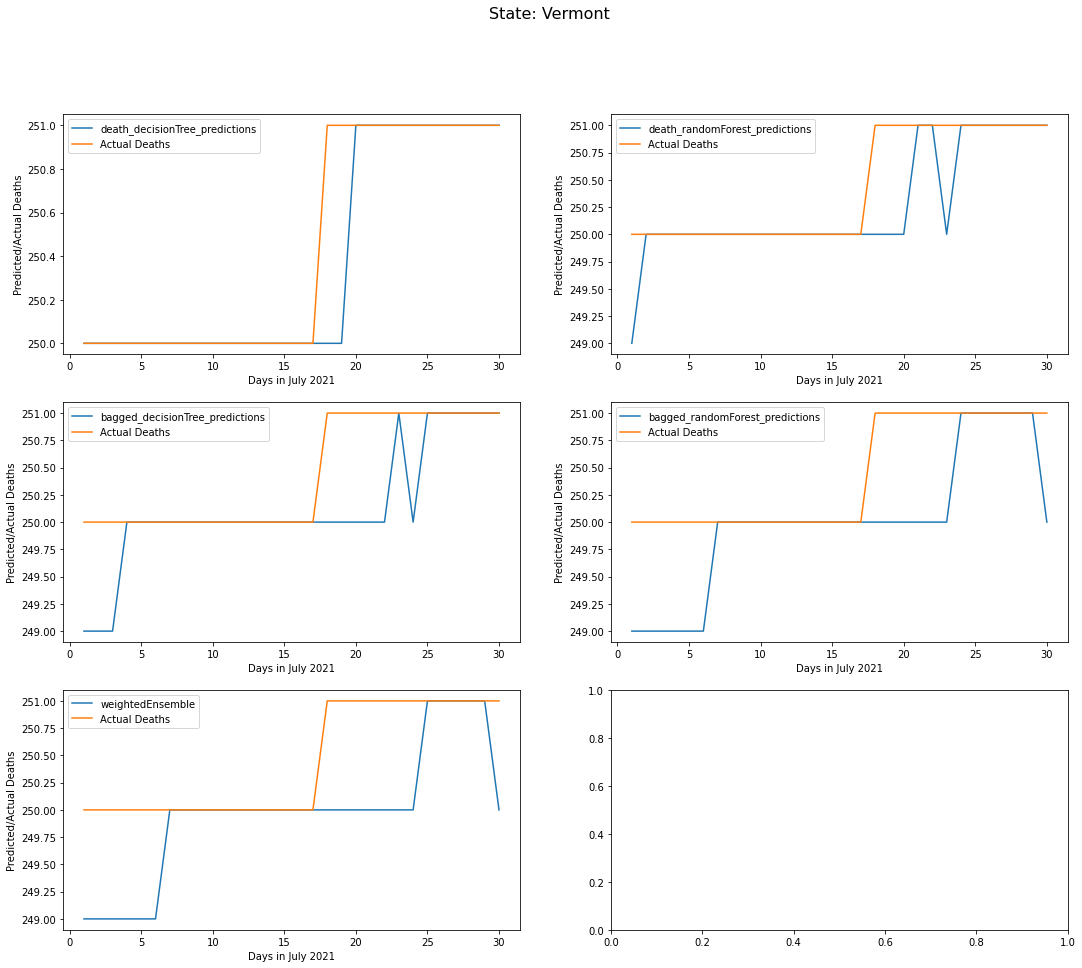

<Figure size 1080x1080 with 0 Axes>

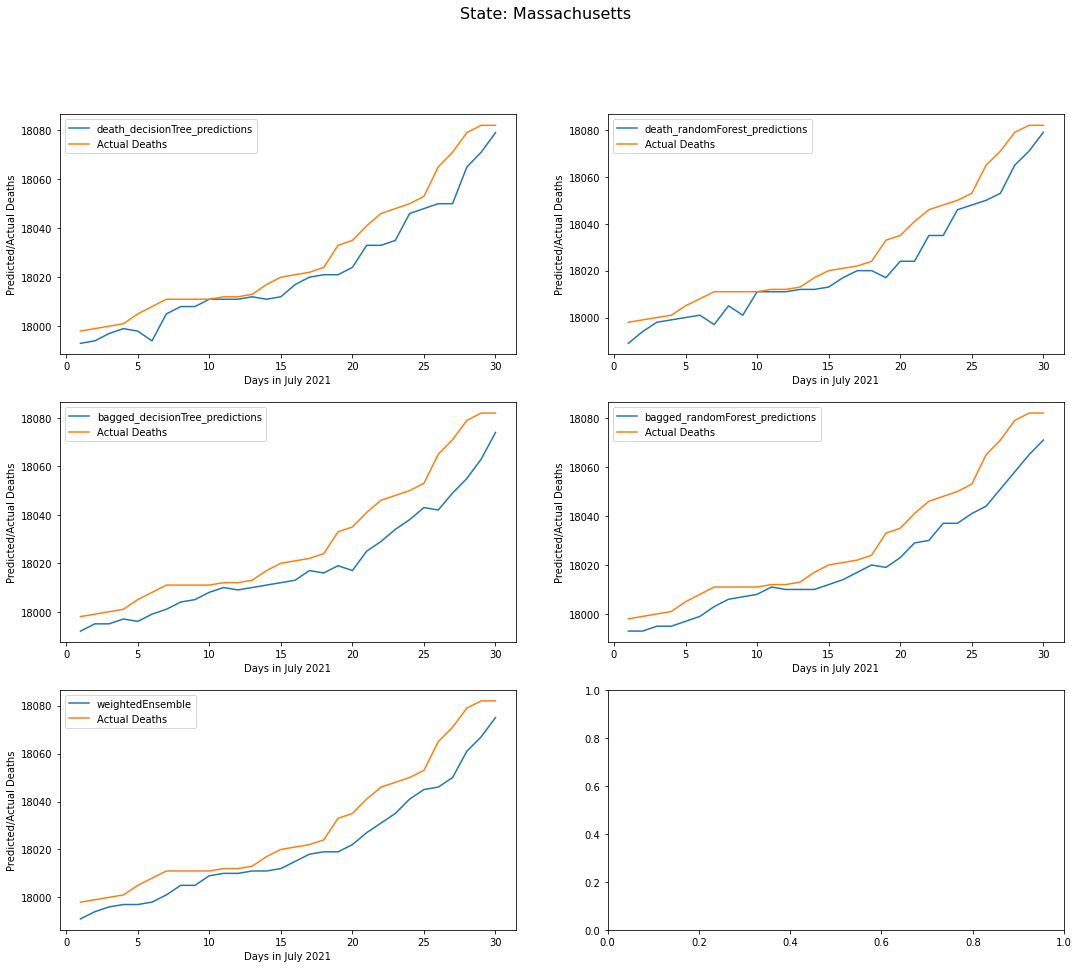

<Figure size 1080x1080 with 0 Axes>

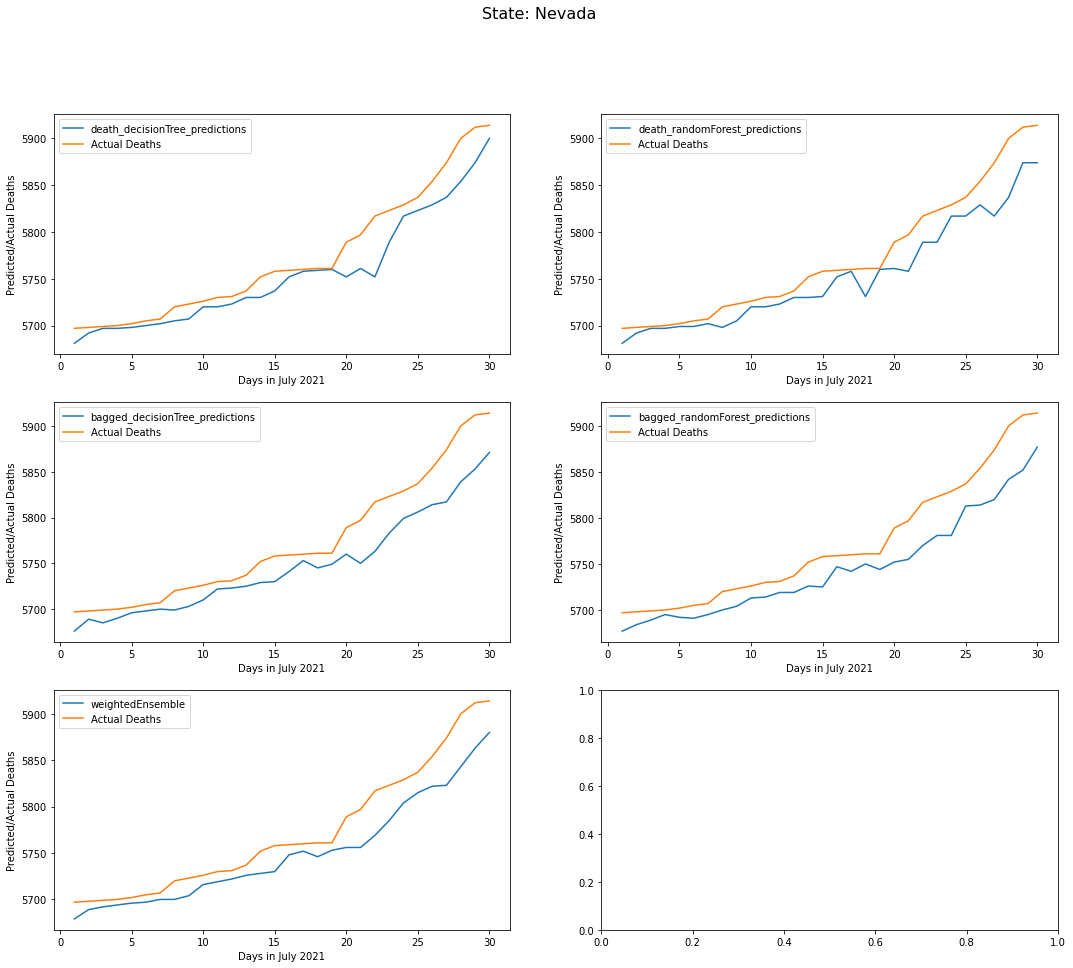

<Figure size 1080x1080 with 0 Axes>

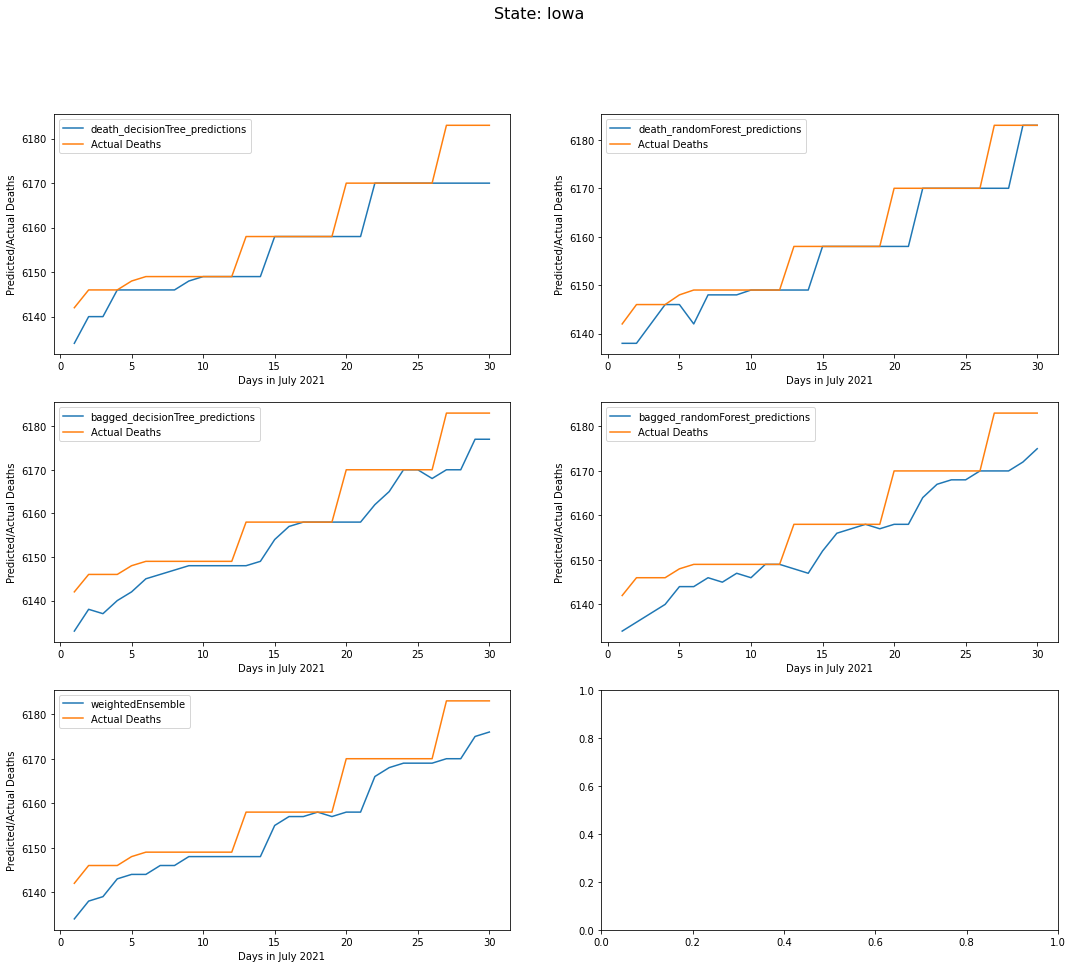

<Figure size 1080x1080 with 0 Axes>

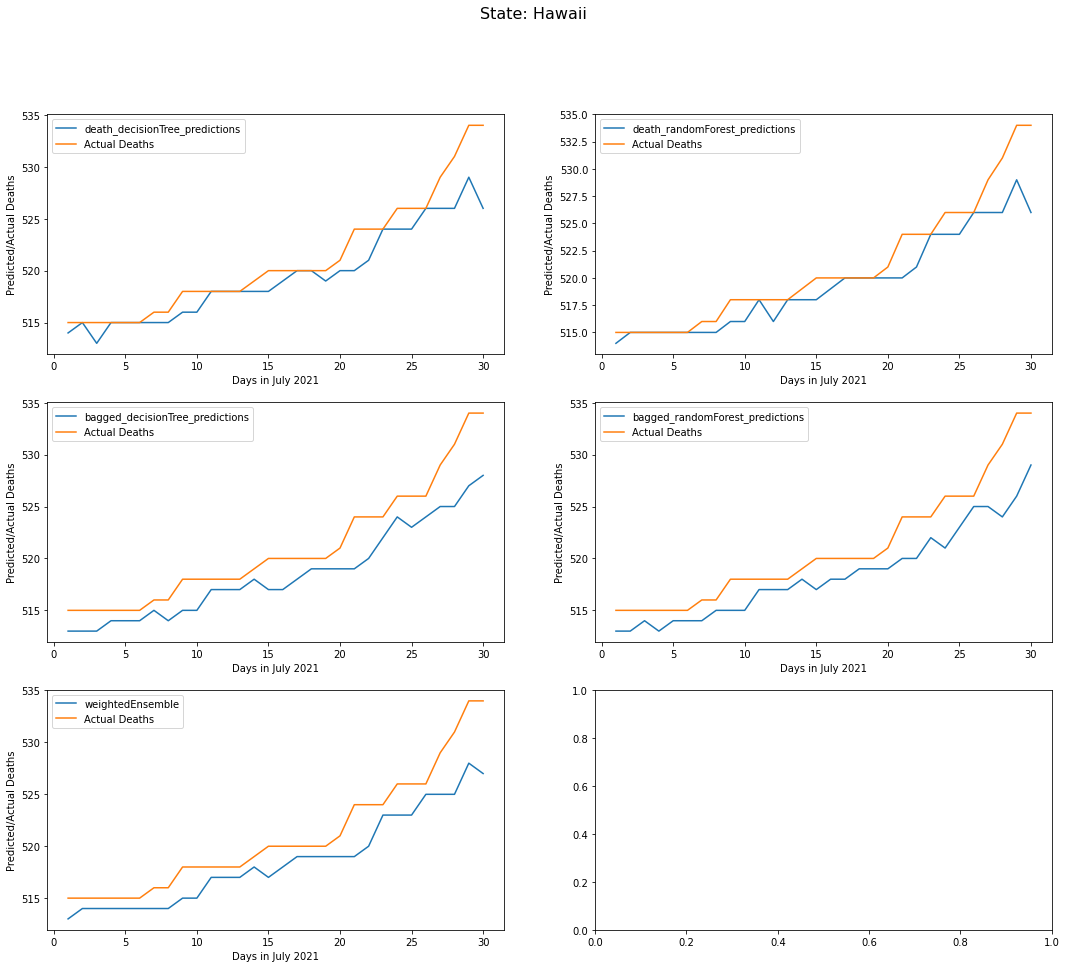

<Figure size 1080x1080 with 0 Axes>

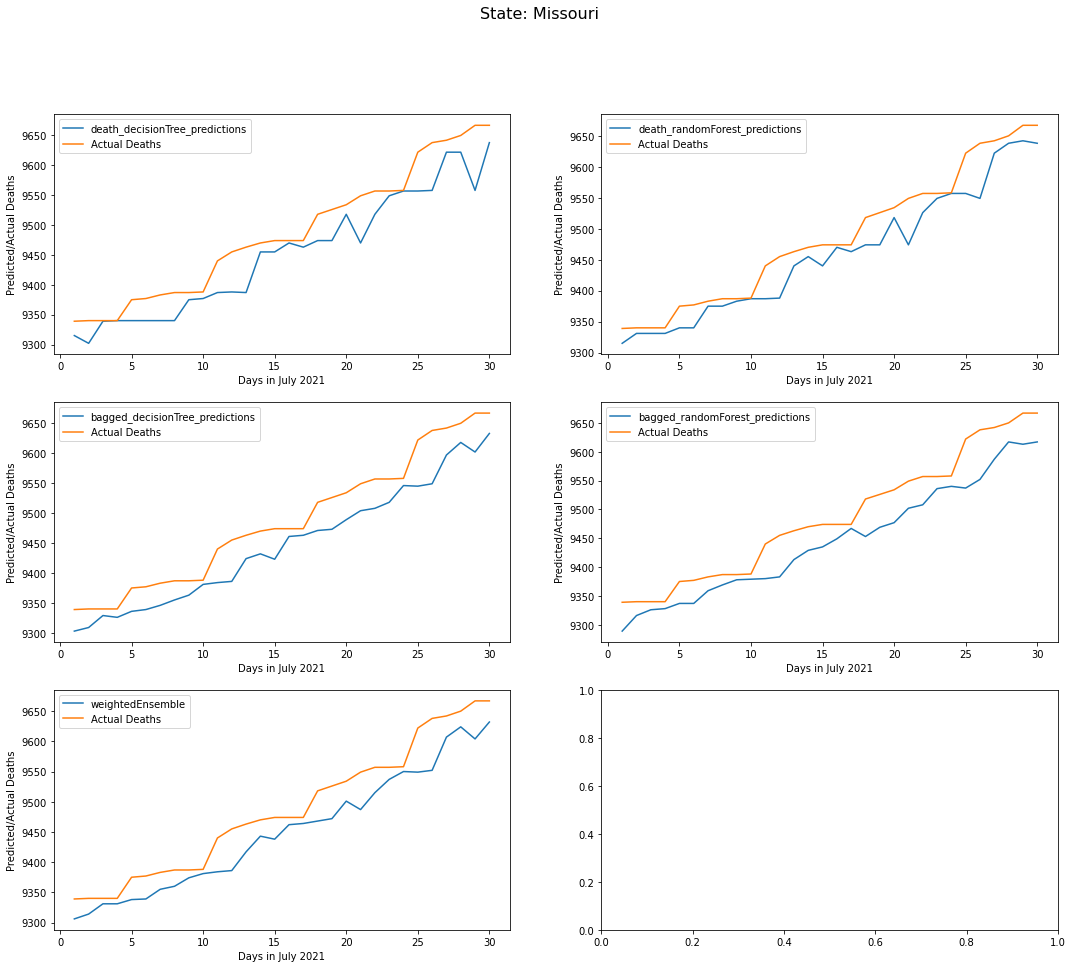

<Figure size 1080x1080 with 0 Axes>

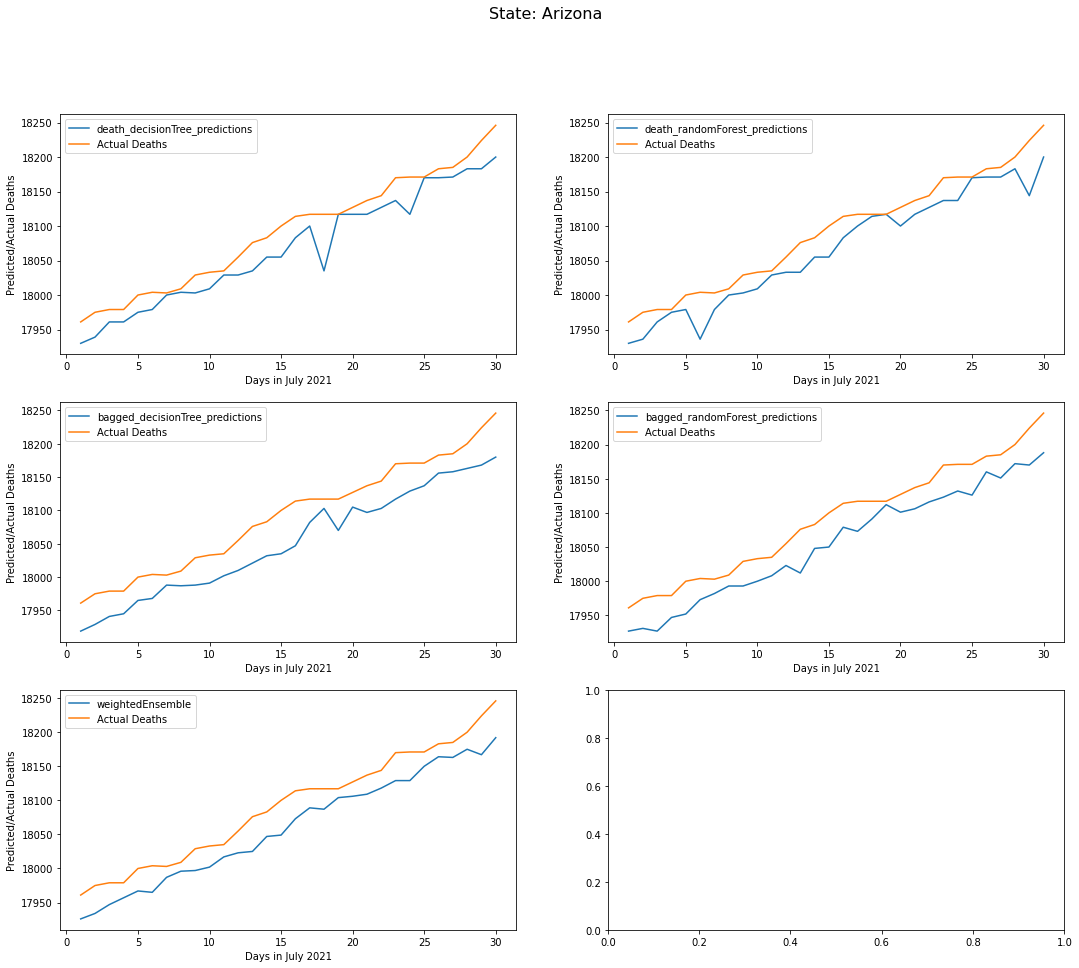

<Figure size 1080x1080 with 0 Axes>

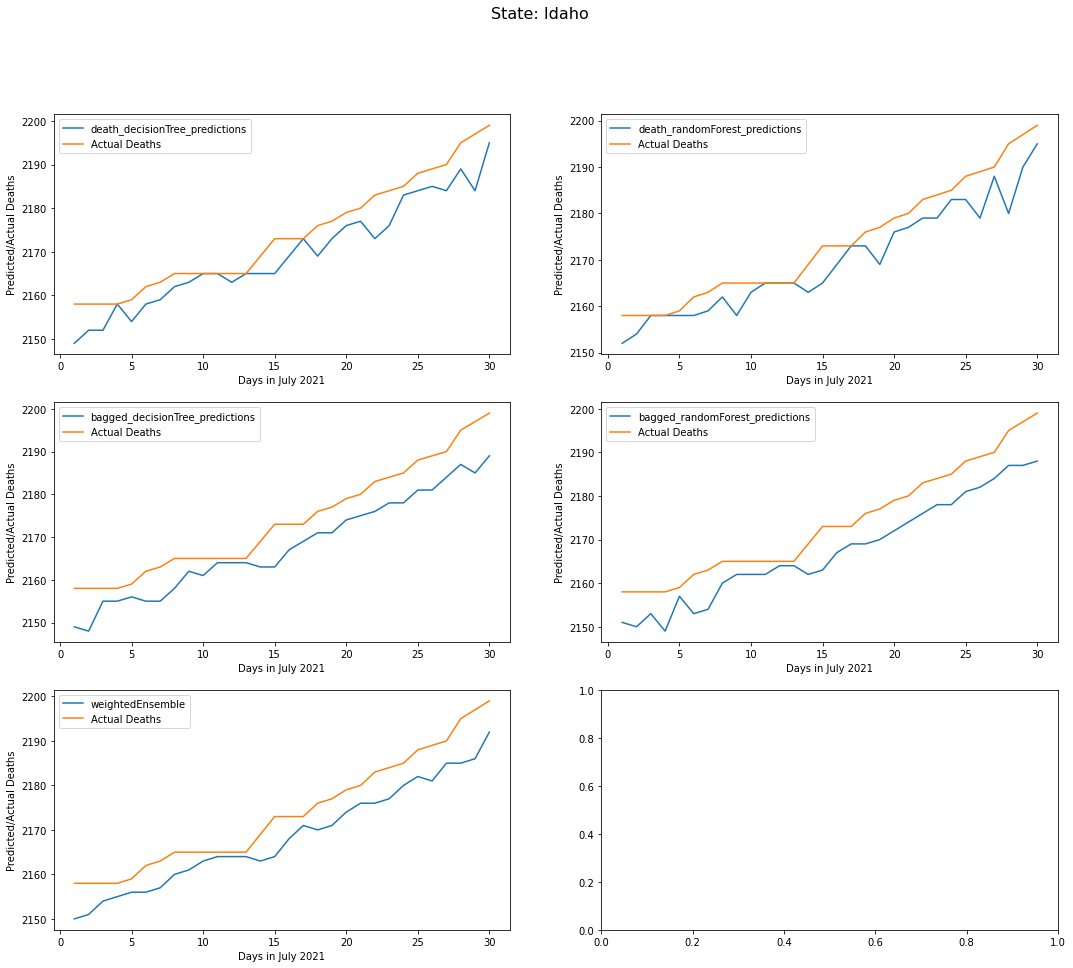

<Figure size 1080x1080 with 0 Axes>

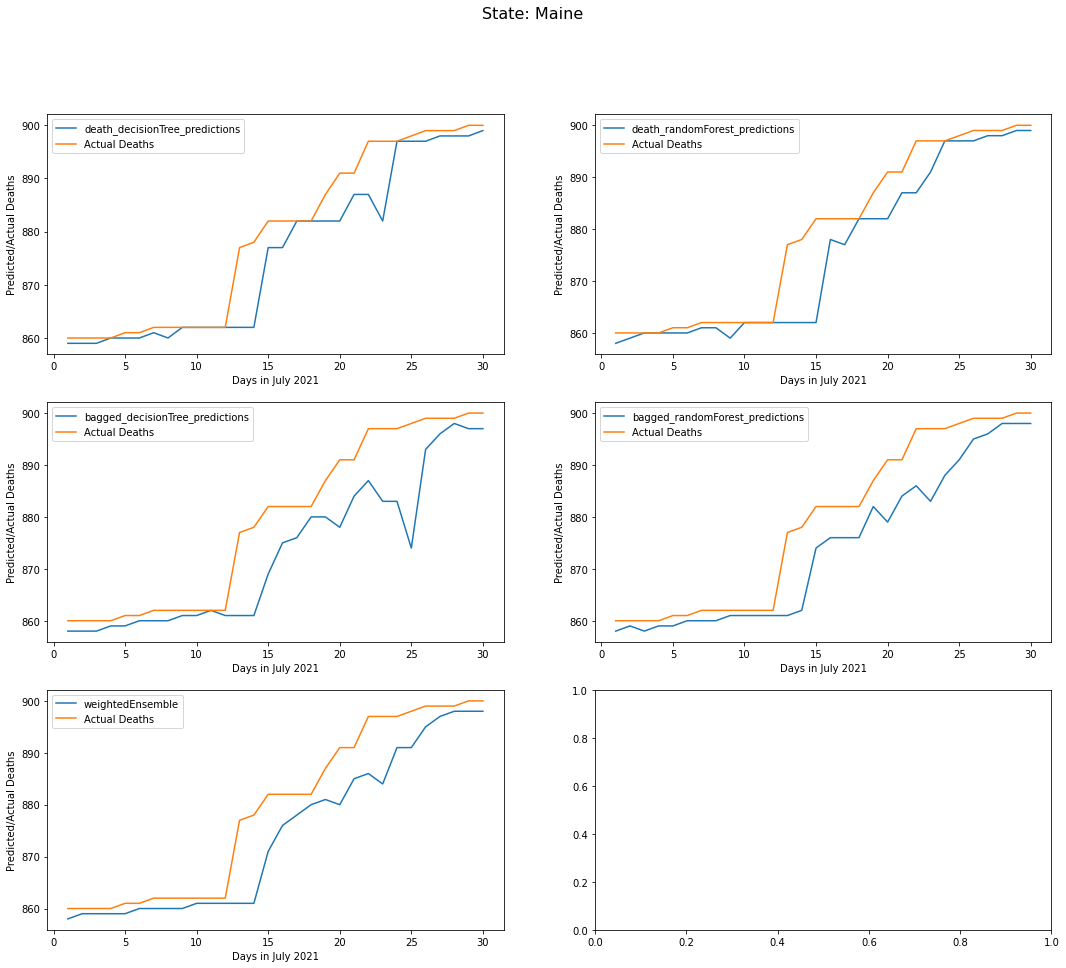

<Figure size 1080x1080 with 0 Axes>

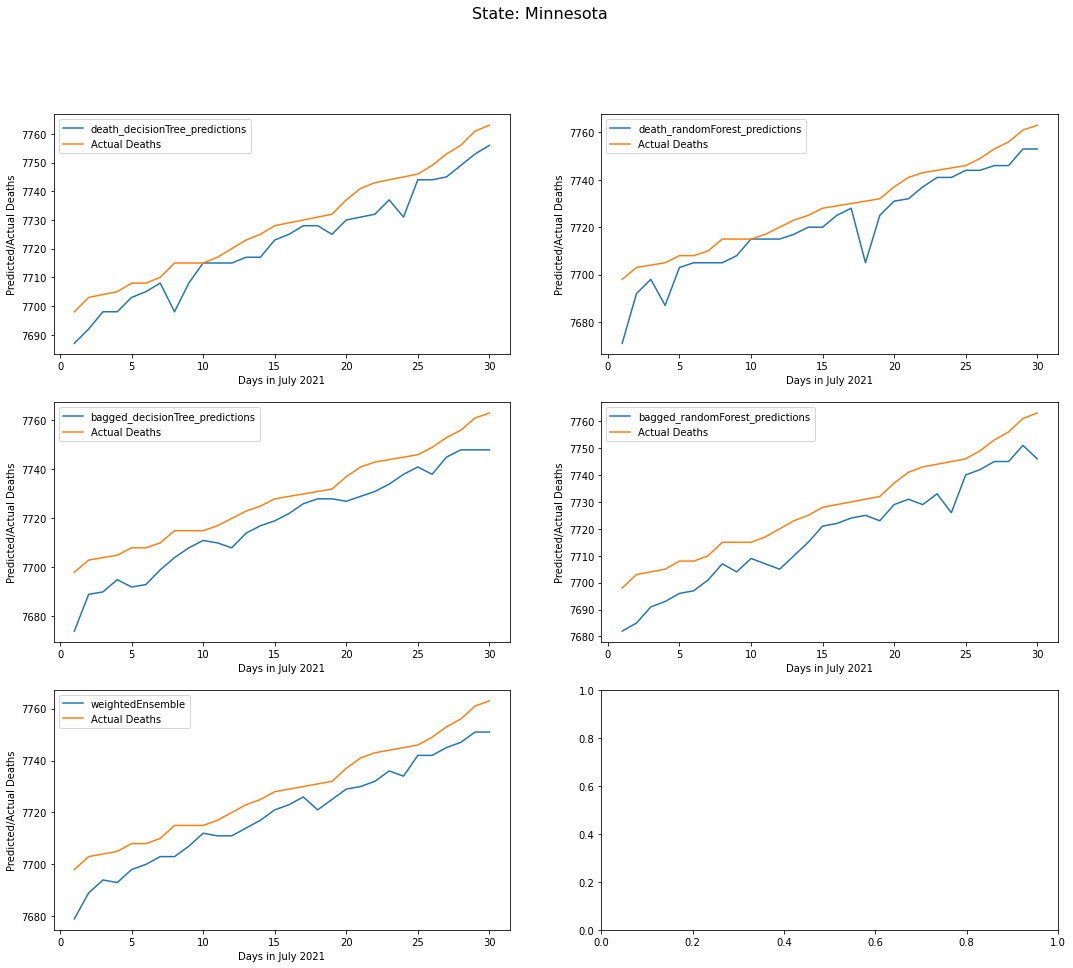

<Figure size 1080x1080 with 0 Axes>

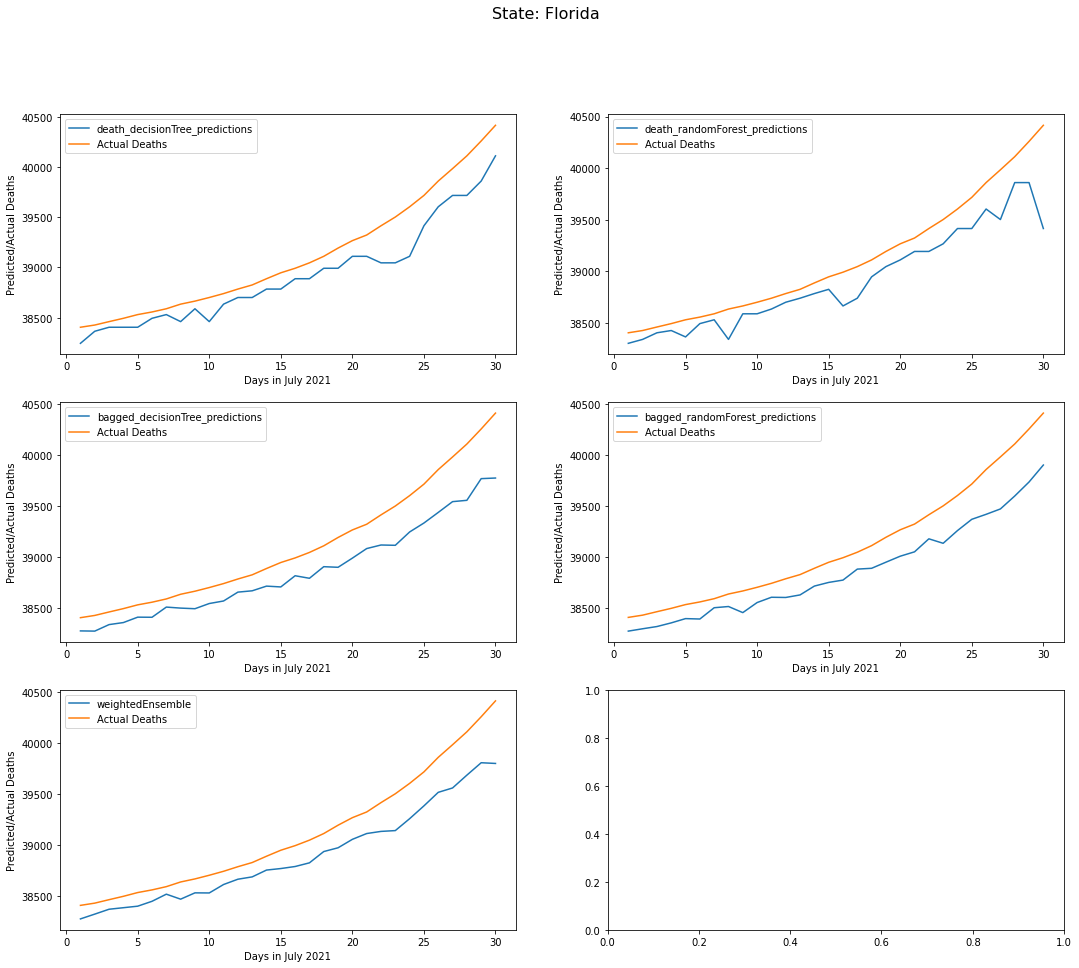

<Figure size 1080x1080 with 0 Axes>

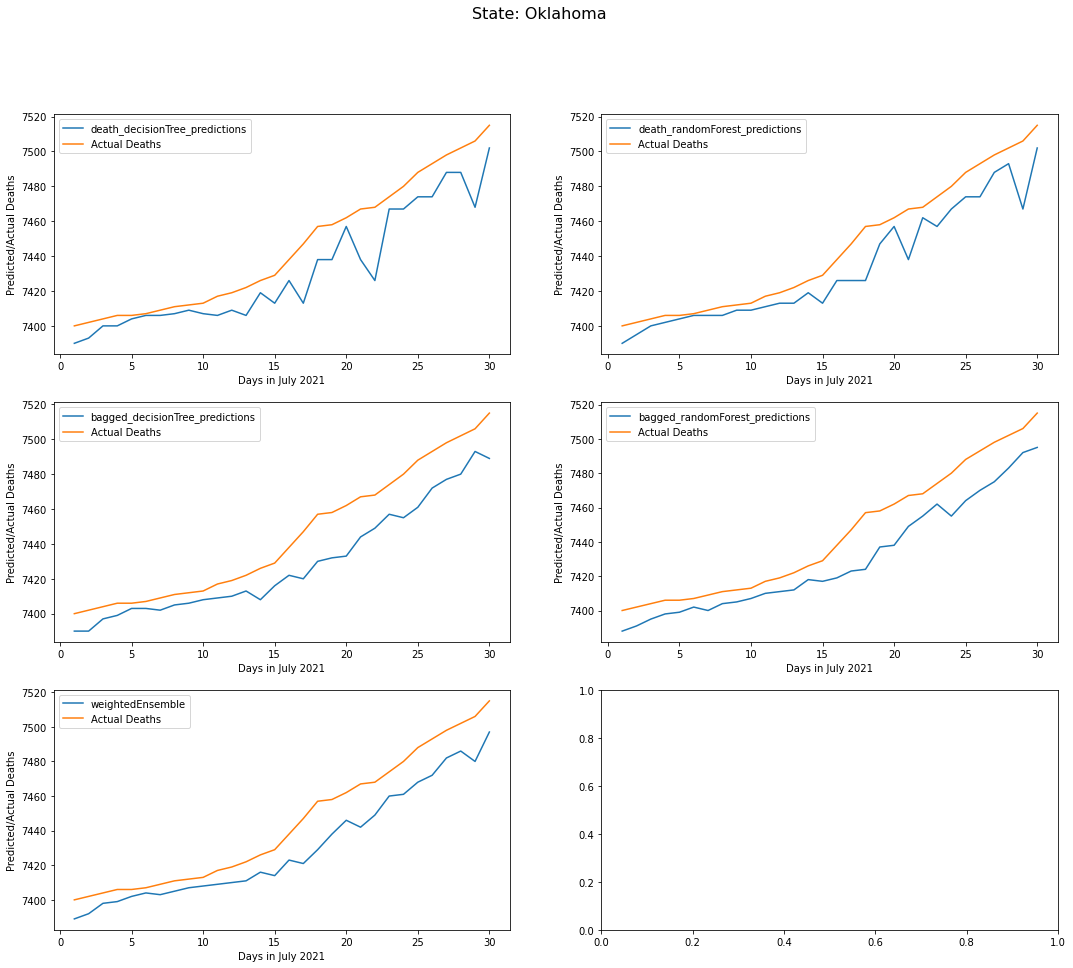

<Figure size 1080x1080 with 0 Axes>

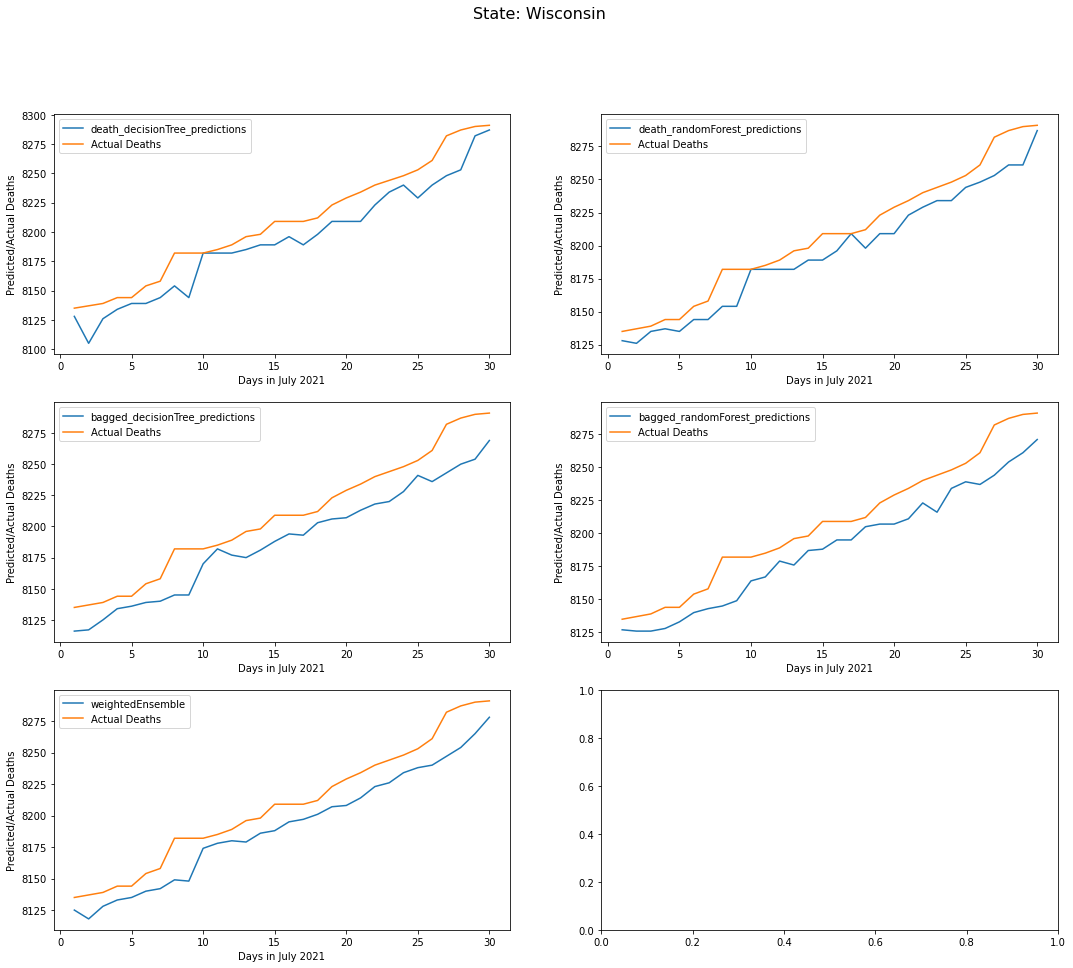

<Figure size 1080x1080 with 0 Axes>

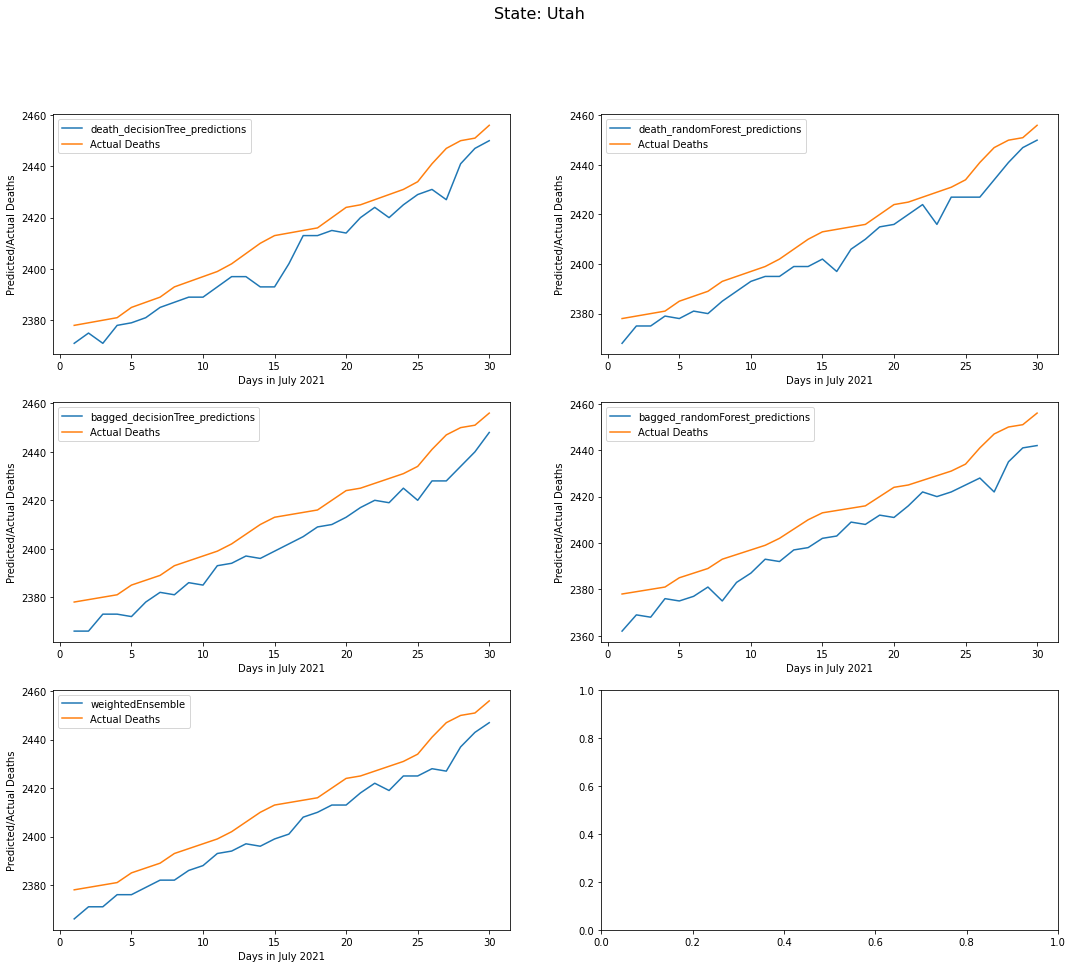

<Figure size 1080x1080 with 0 Axes>

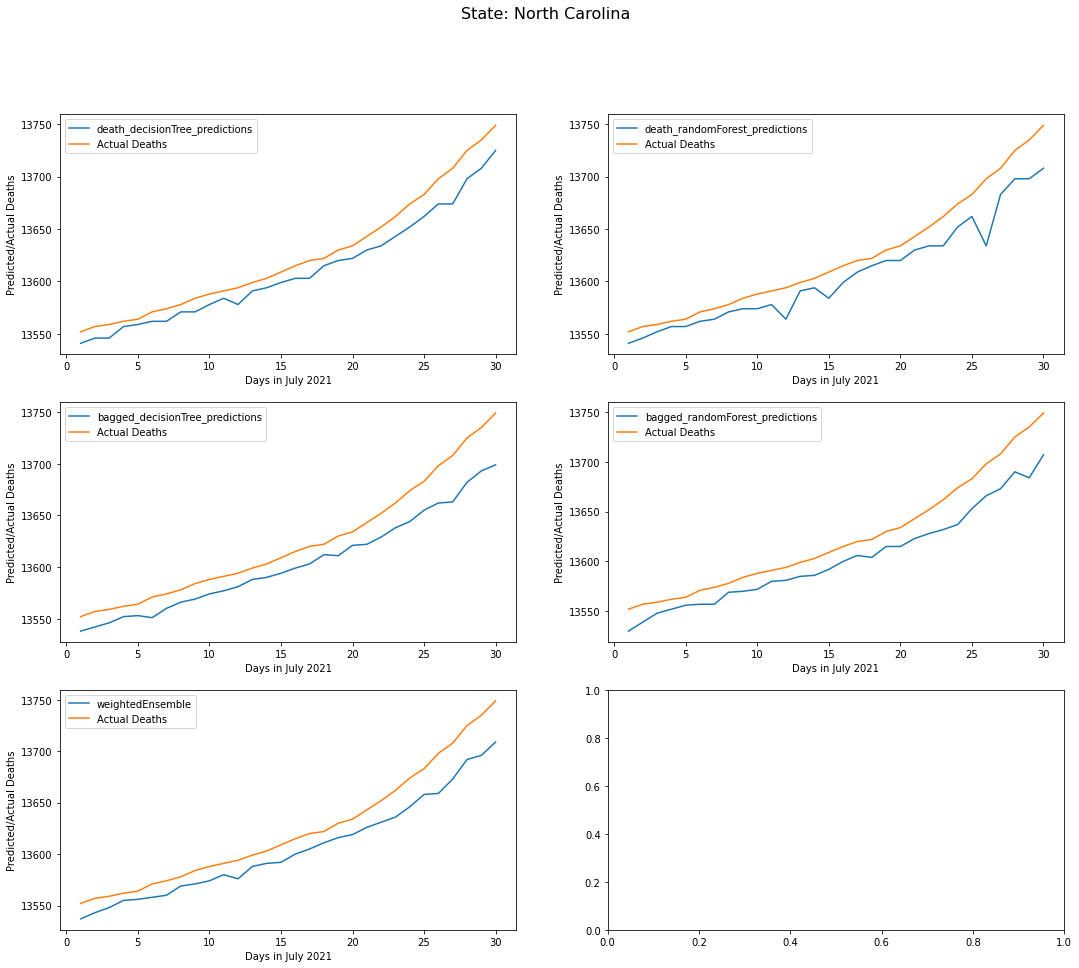

<Figure size 1080x1080 with 0 Axes>

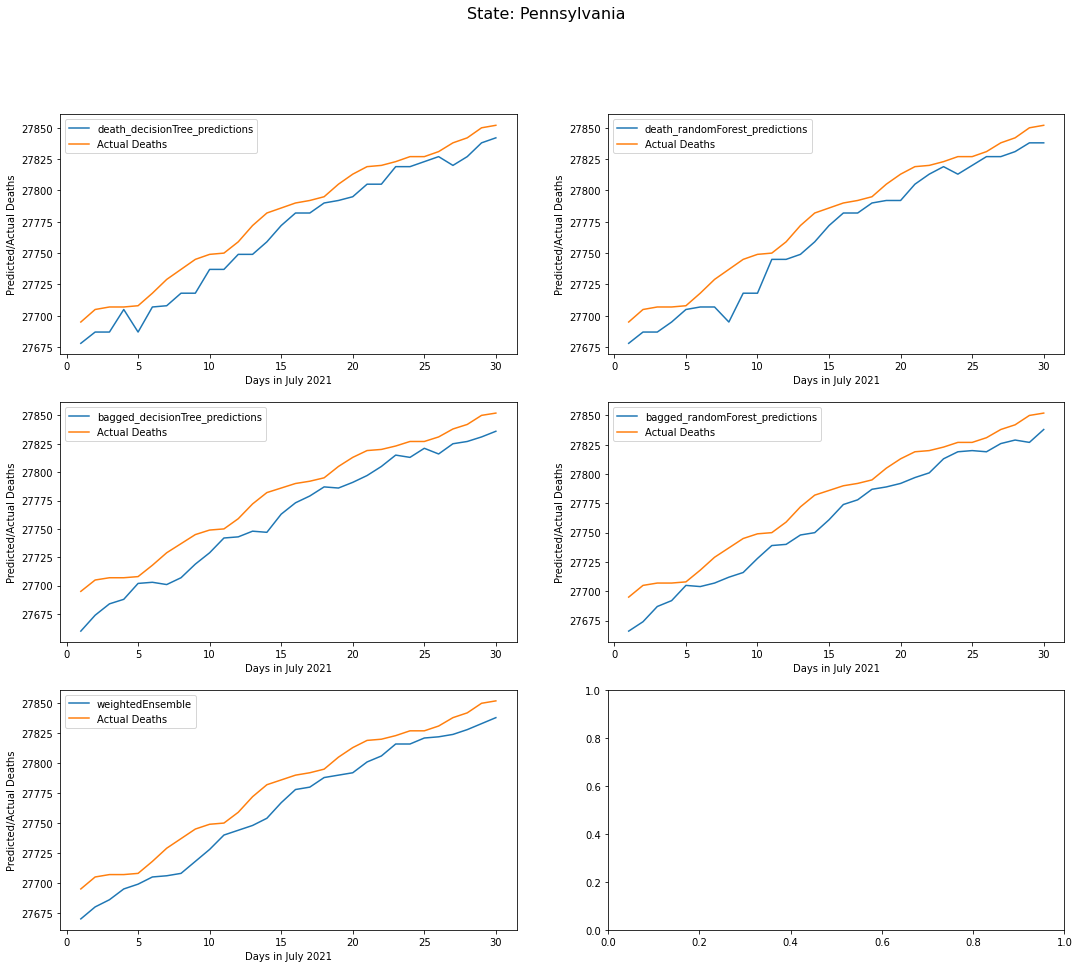

<Figure size 1080x1080 with 0 Axes>

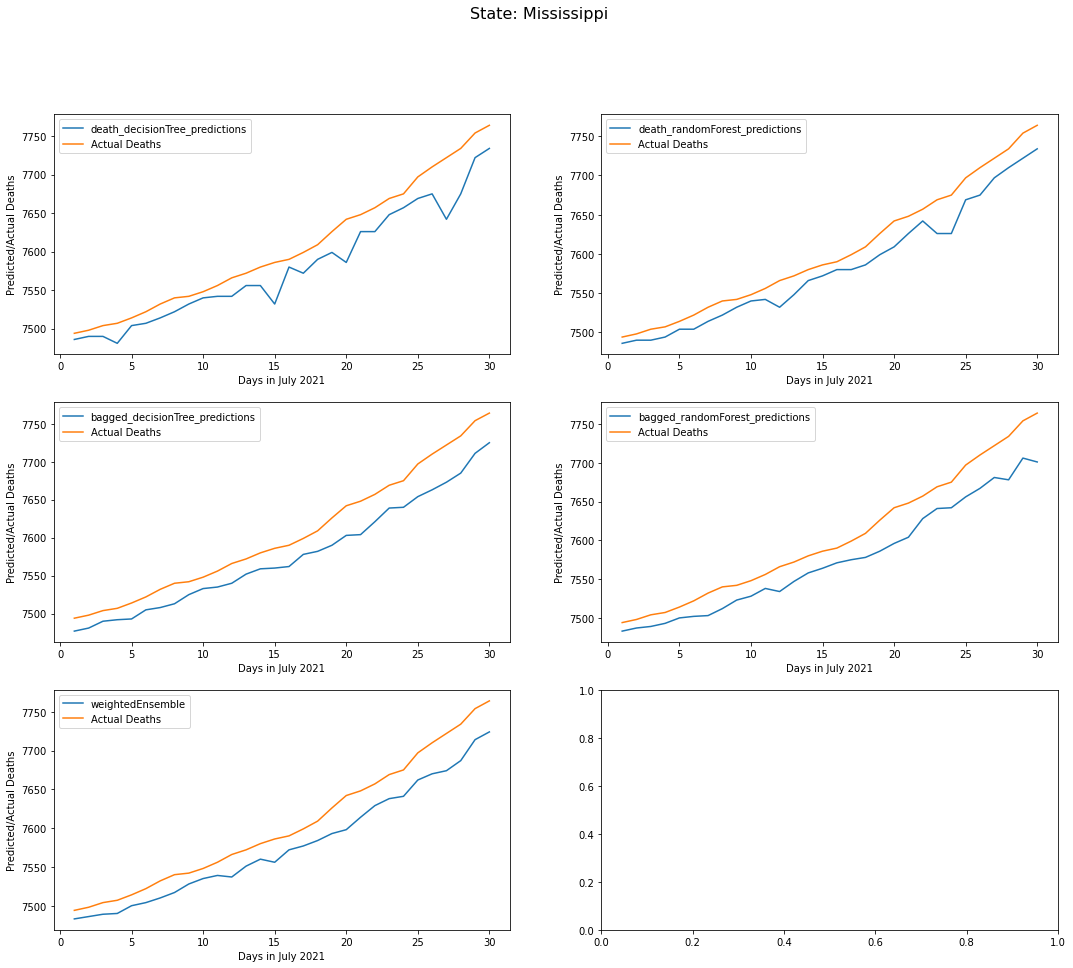

<Figure size 1080x1080 with 0 Axes>

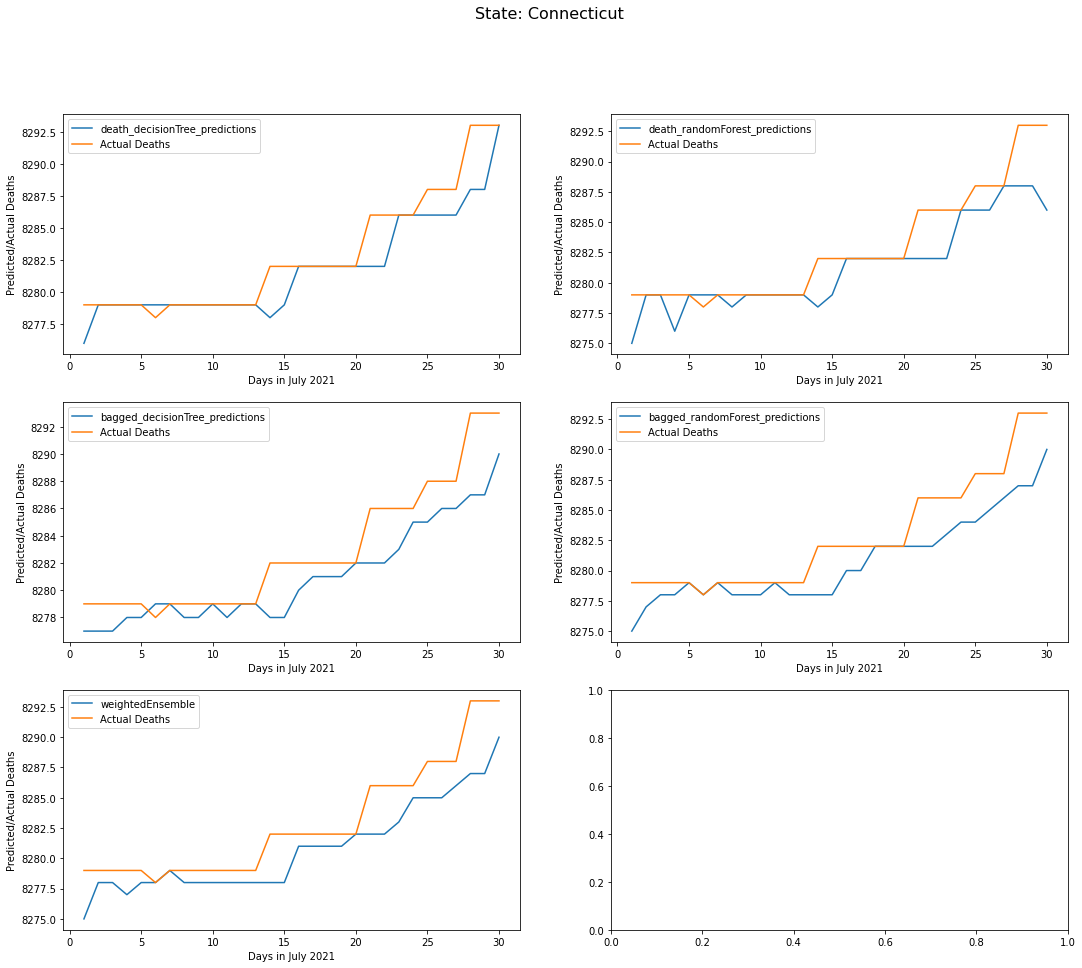

<Figure size 1080x1080 with 0 Axes>

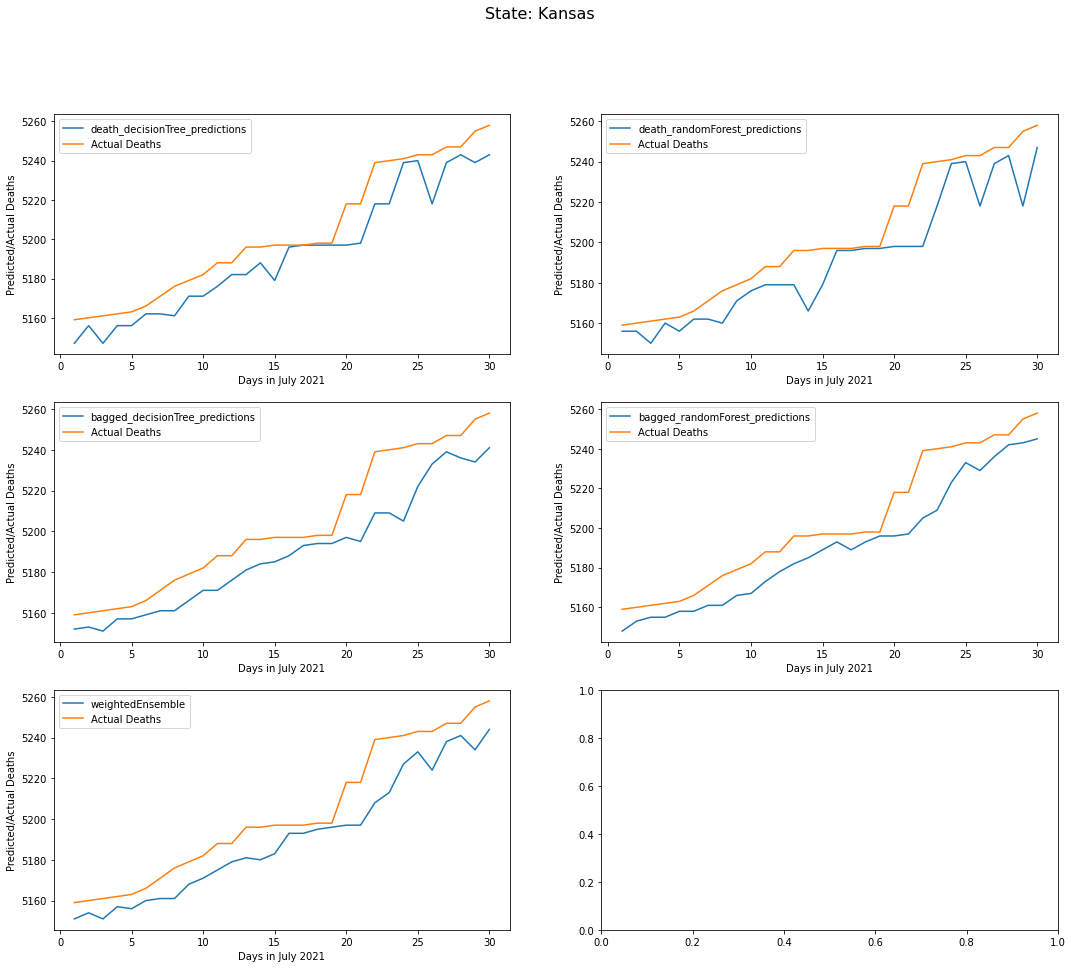

<Figure size 1080x1080 with 0 Axes>

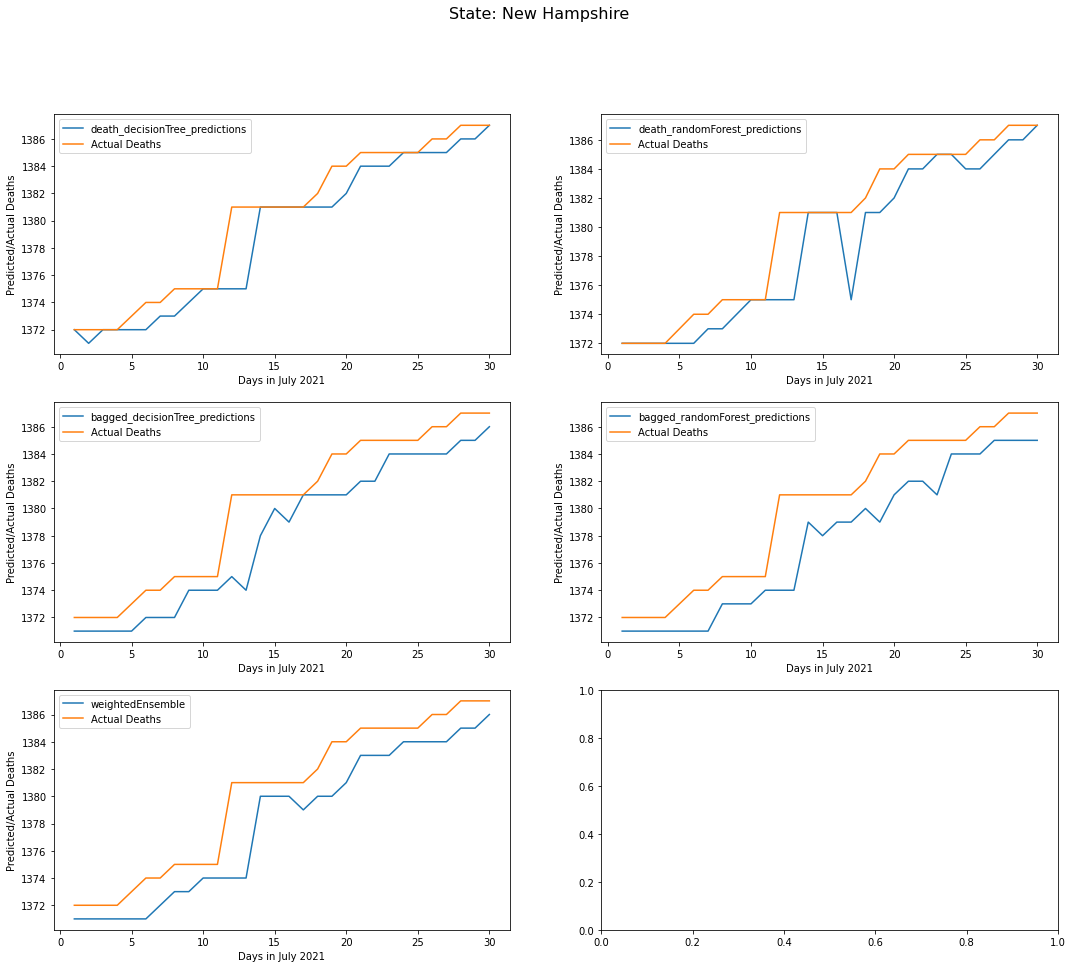

<Figure size 1080x1080 with 0 Axes>

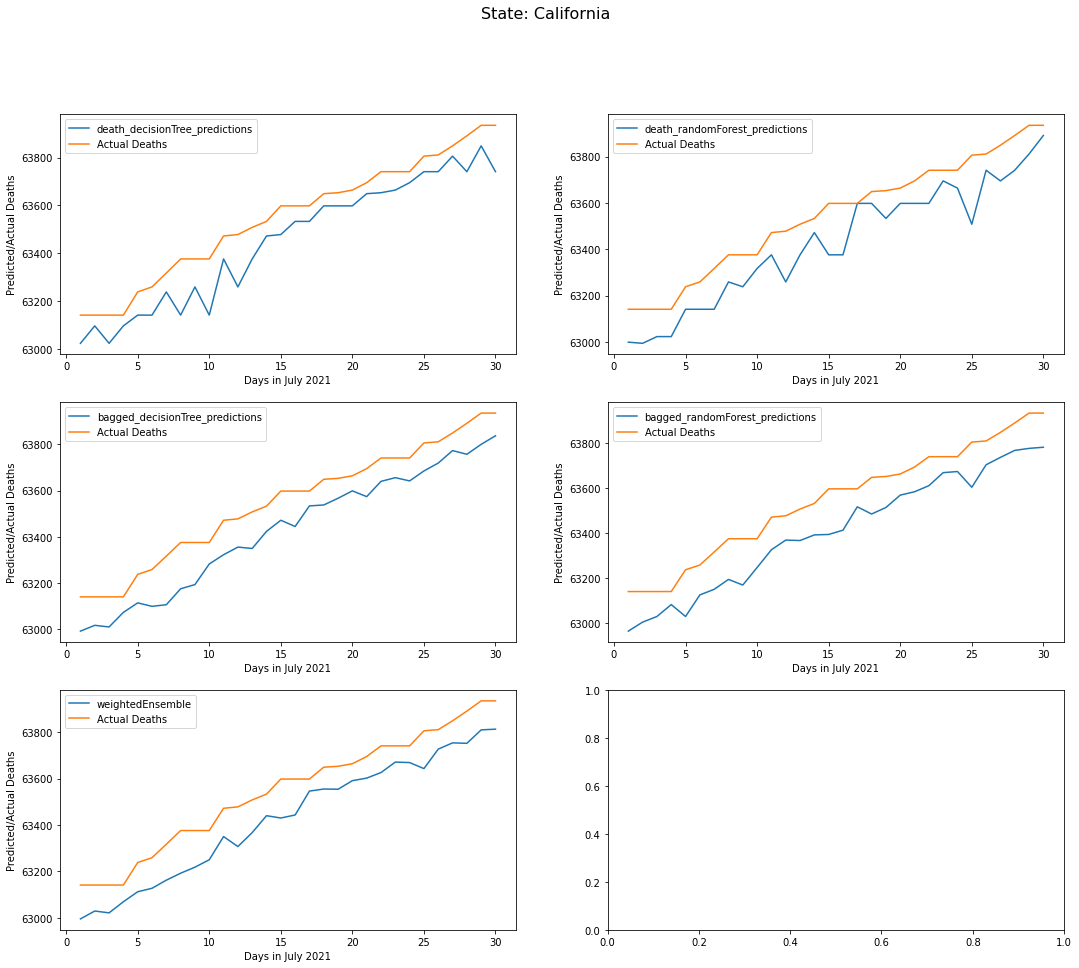

<Figure size 1080x1080 with 0 Axes>

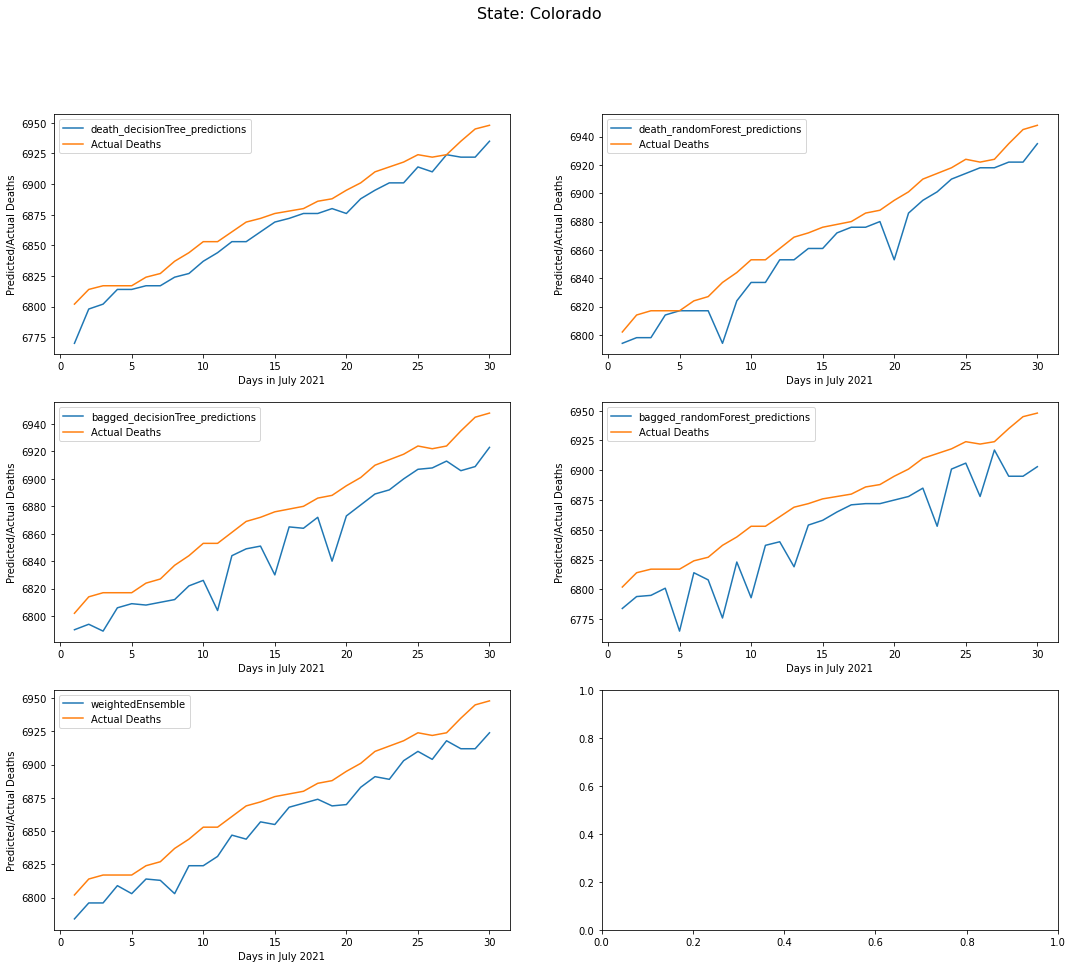

<Figure size 1080x1080 with 0 Axes>

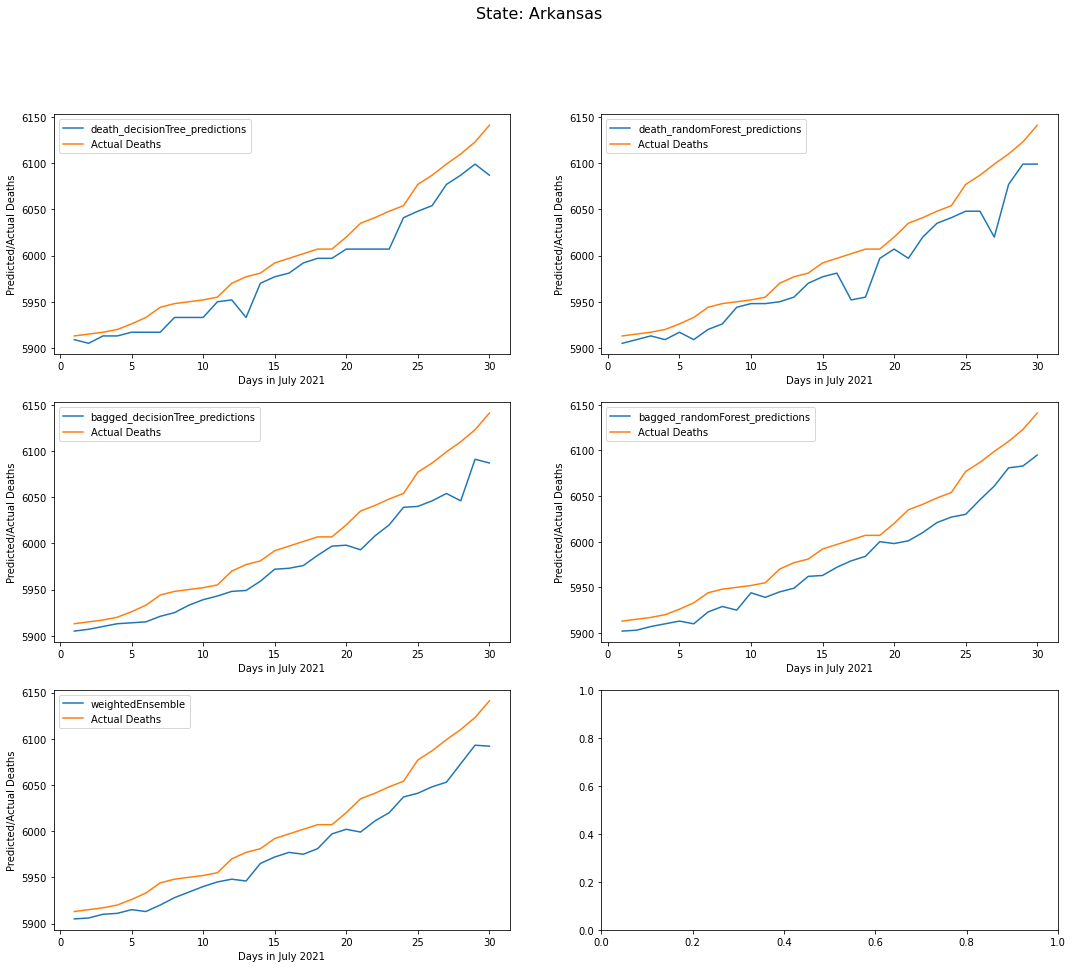

<Figure size 1080x1080 with 0 Axes>

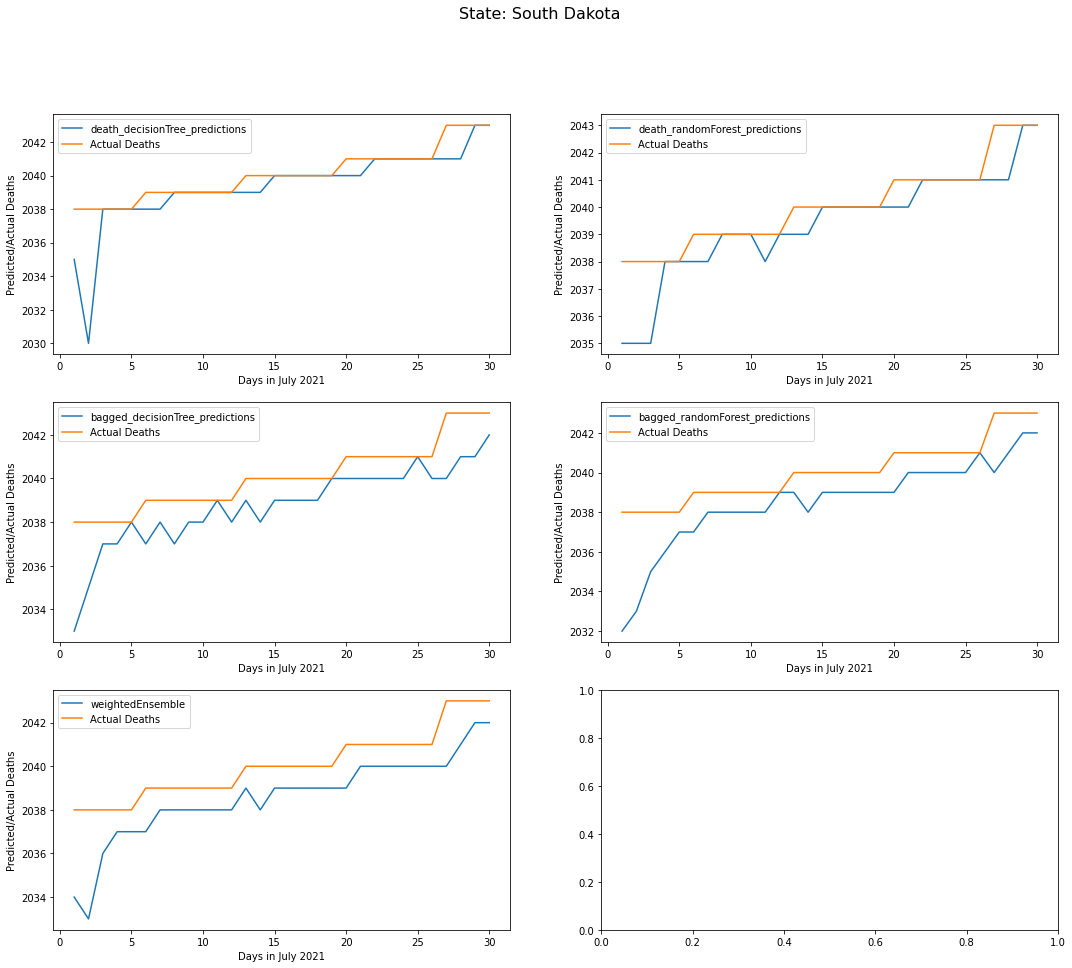

<Figure size 1080x1080 with 0 Axes>

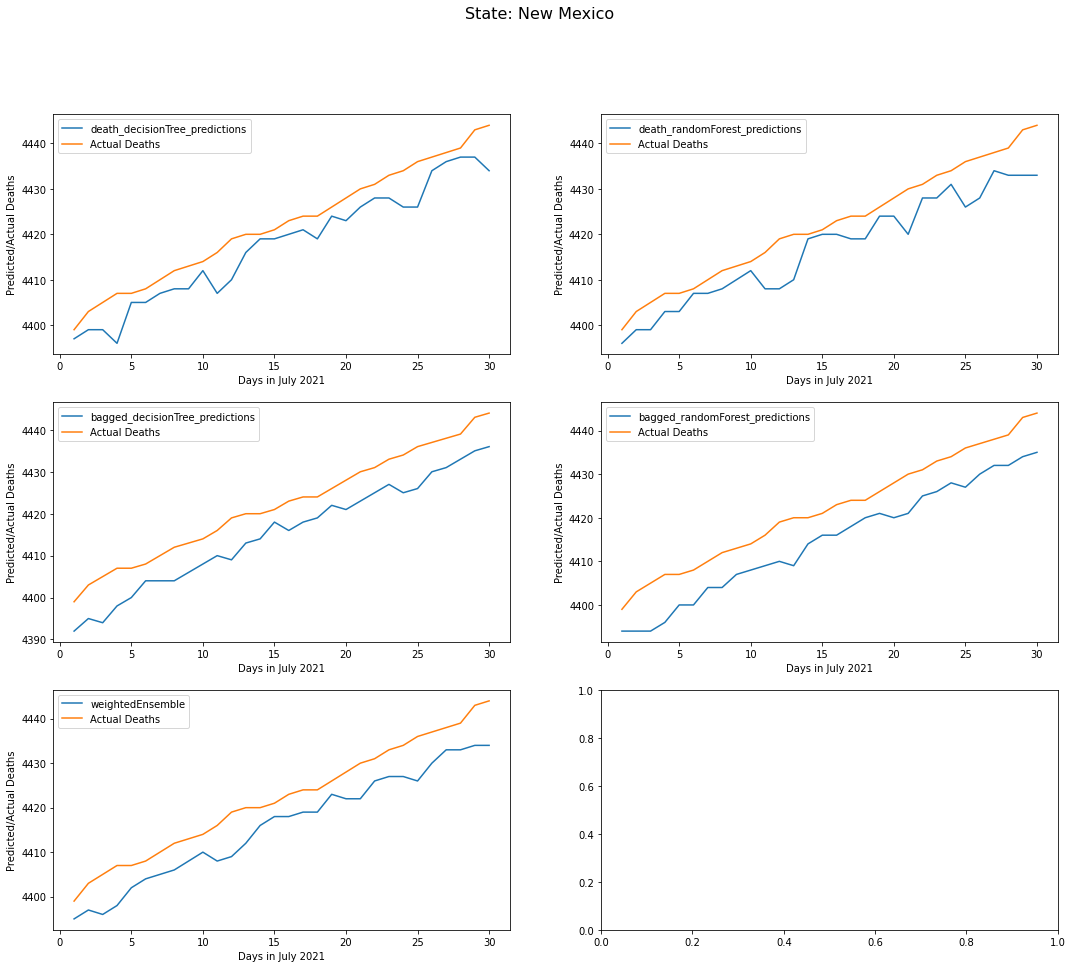

<Figure size 1080x1080 with 0 Axes>

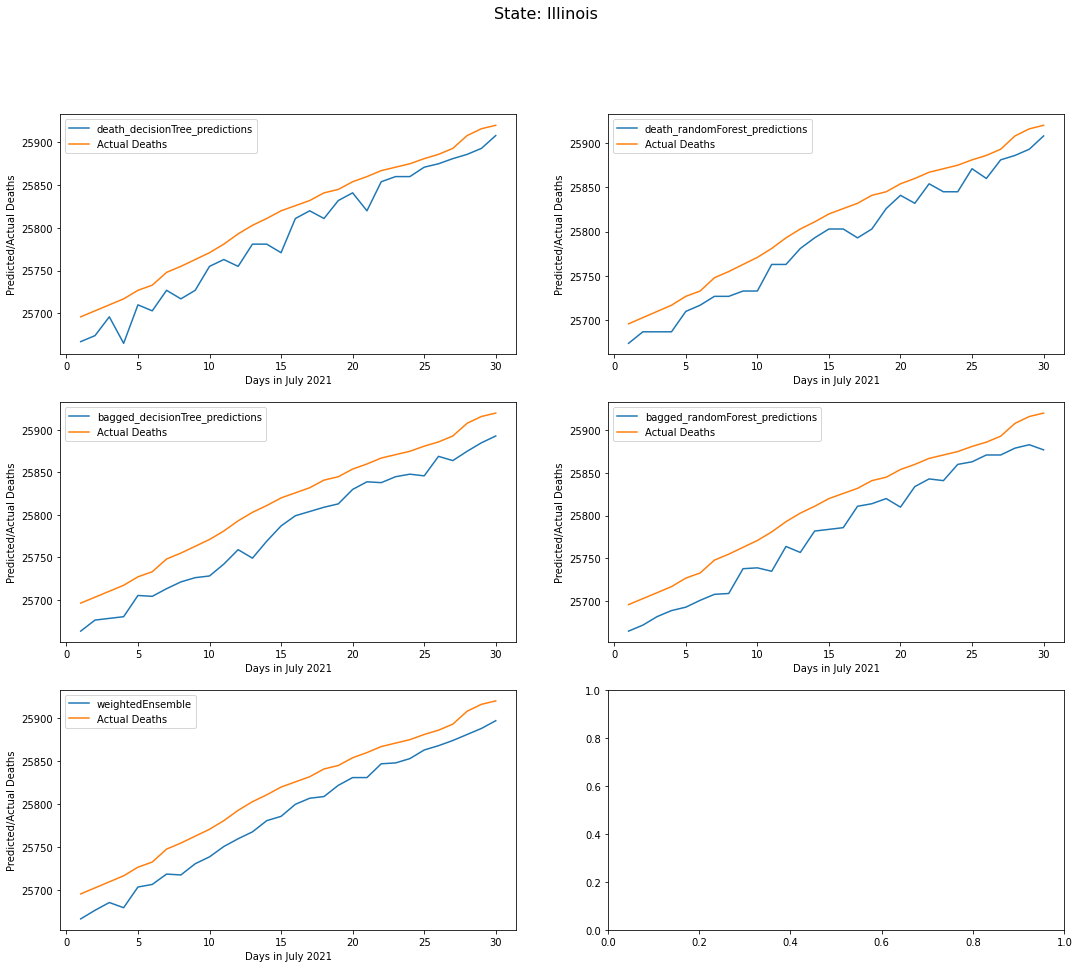

<Figure size 1080x1080 with 0 Axes>

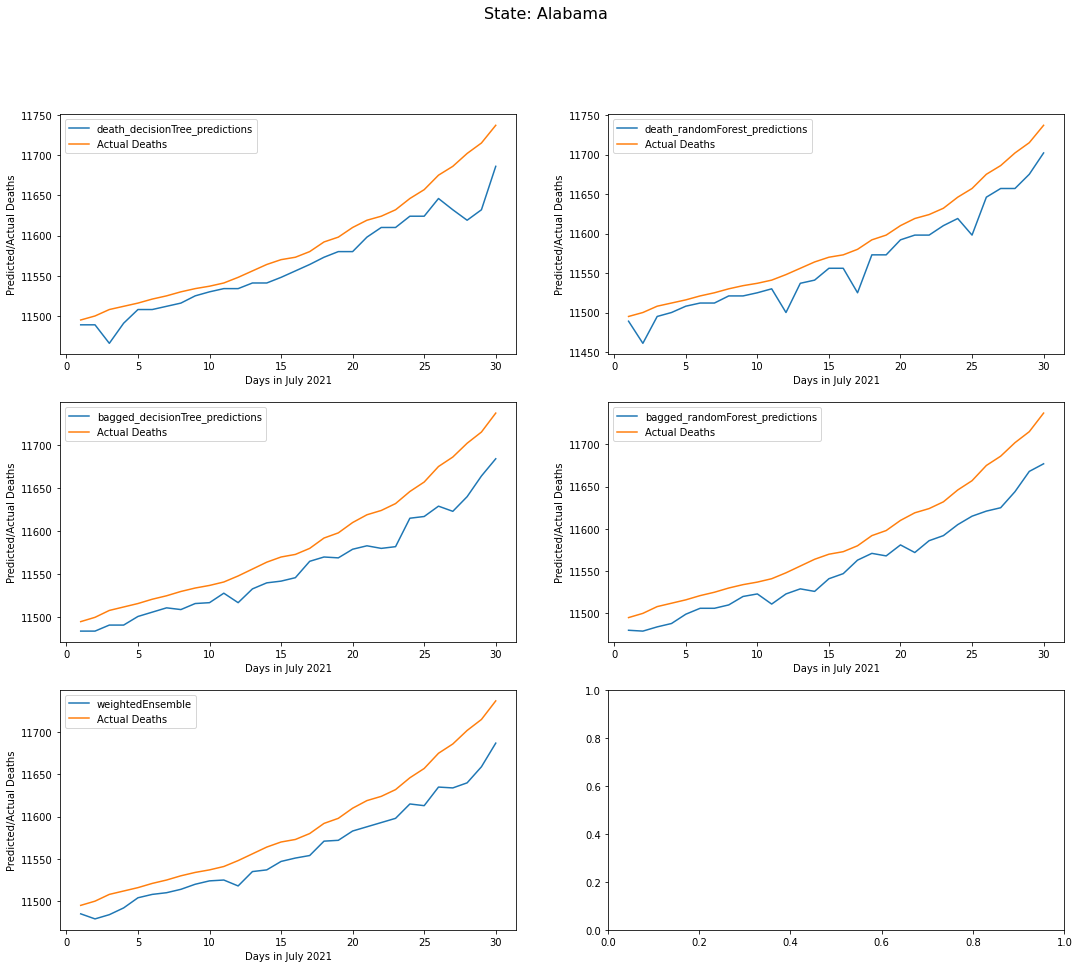

<Figure size 1080x1080 with 0 Axes>

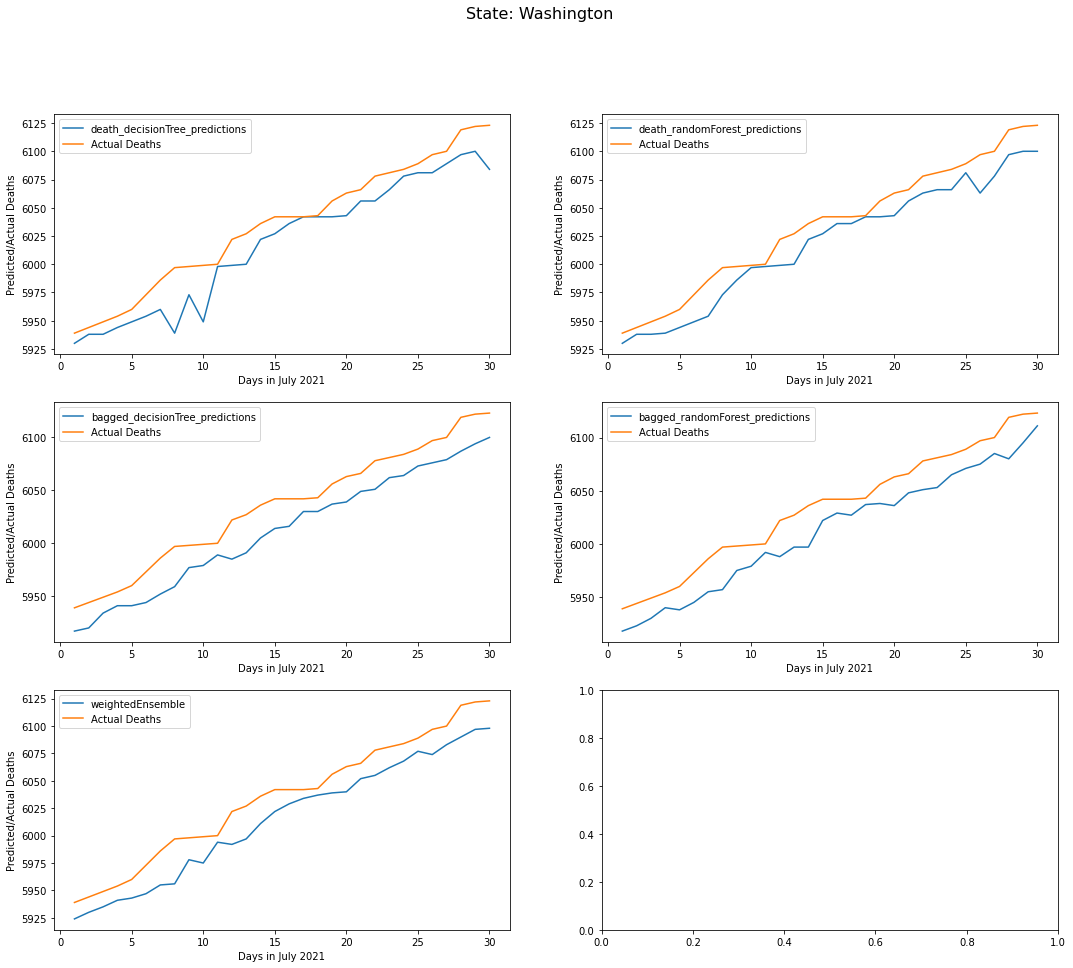

<Figure size 1080x1080 with 0 Axes>

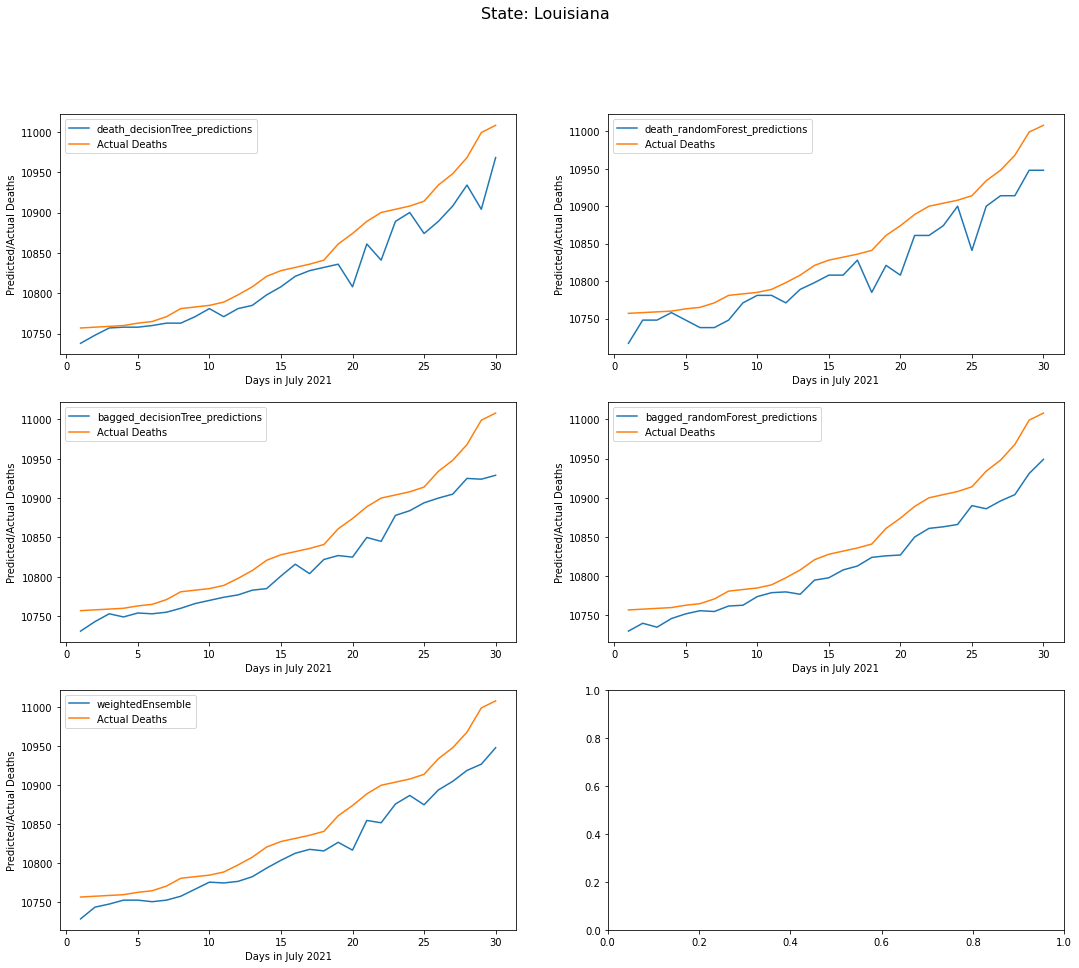

<Figure size 1080x1080 with 0 Axes>

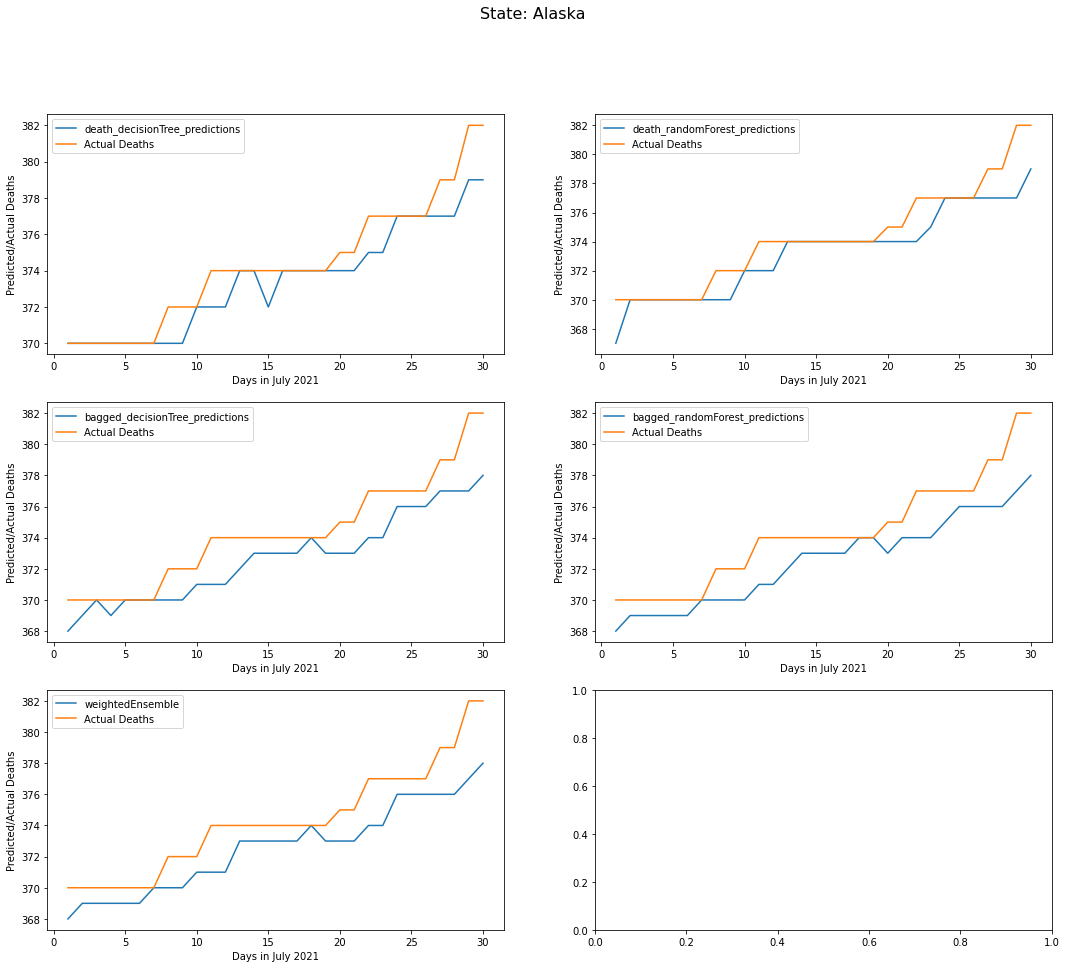

<Figure size 1080x1080 with 0 Axes>

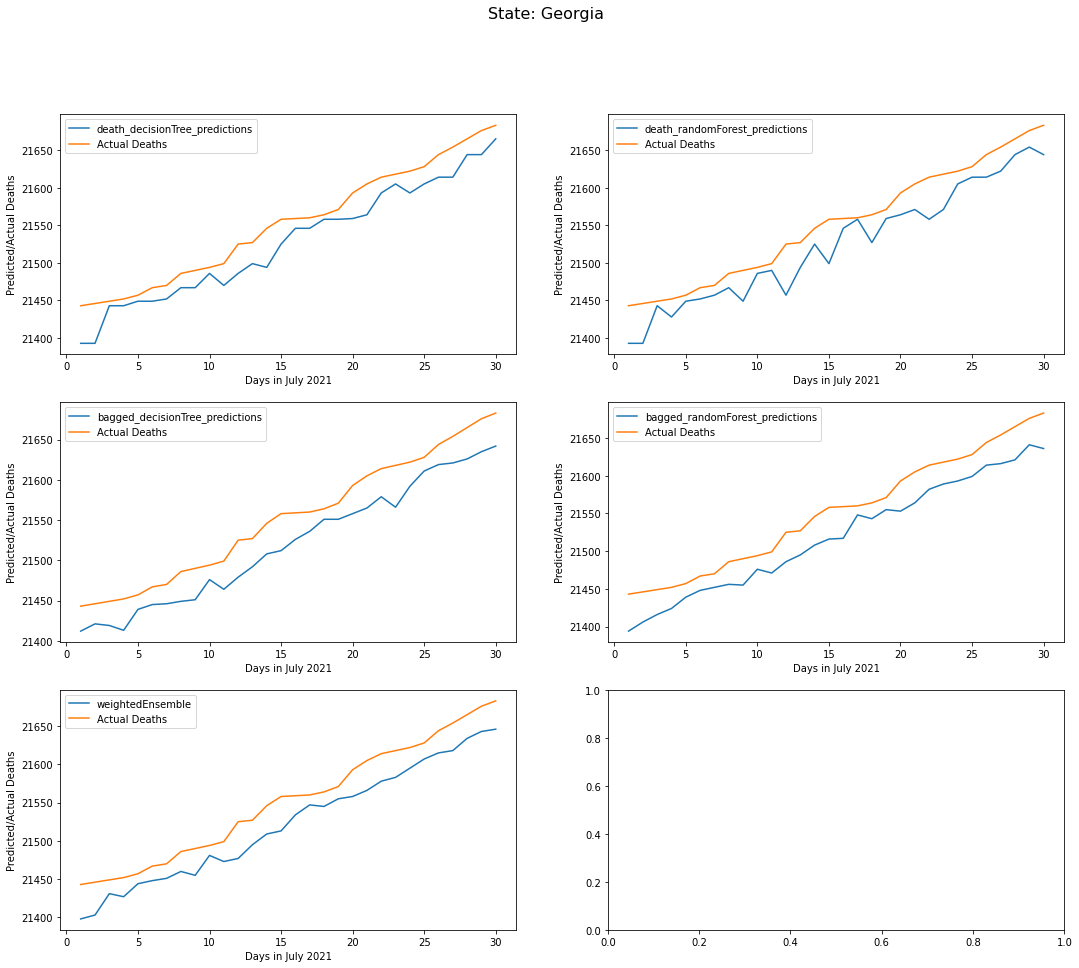

<Figure size 1080x1080 with 0 Axes>

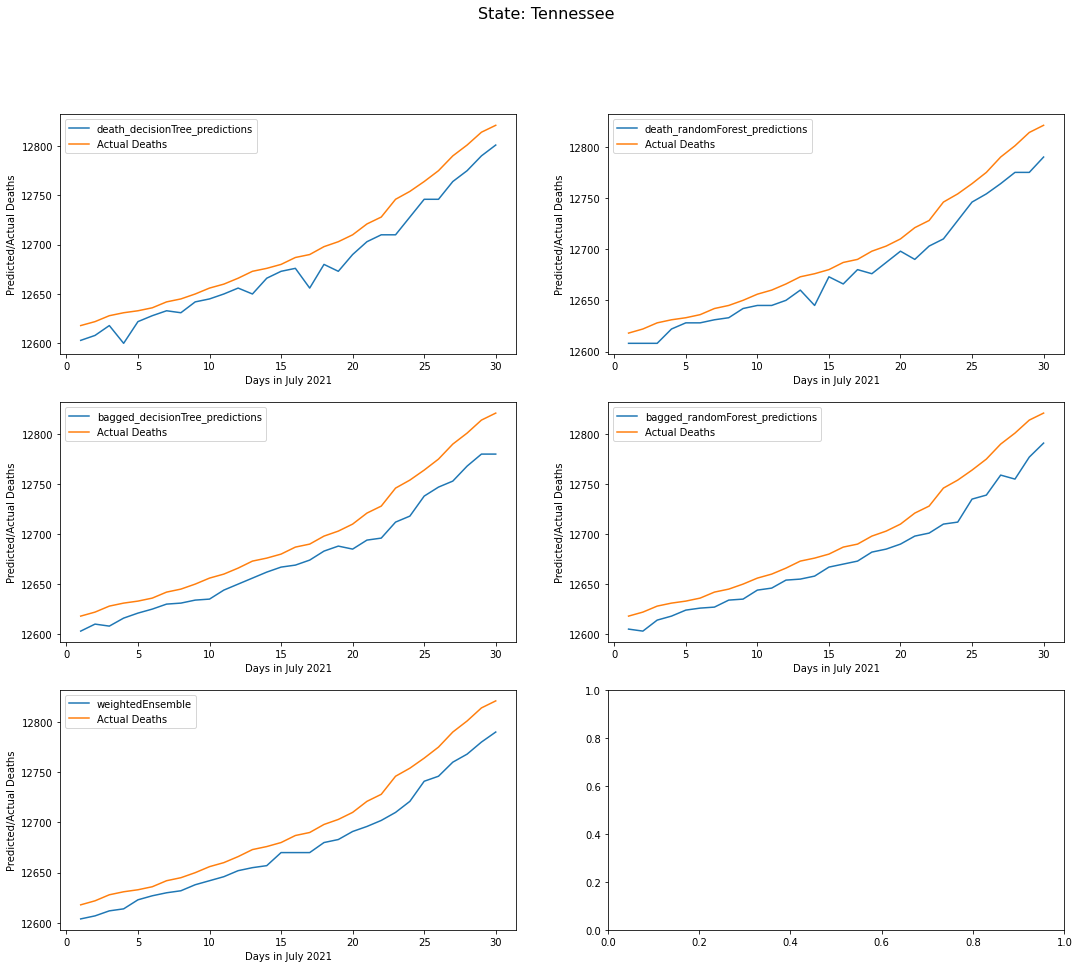

<Figure size 1080x1080 with 0 Axes>

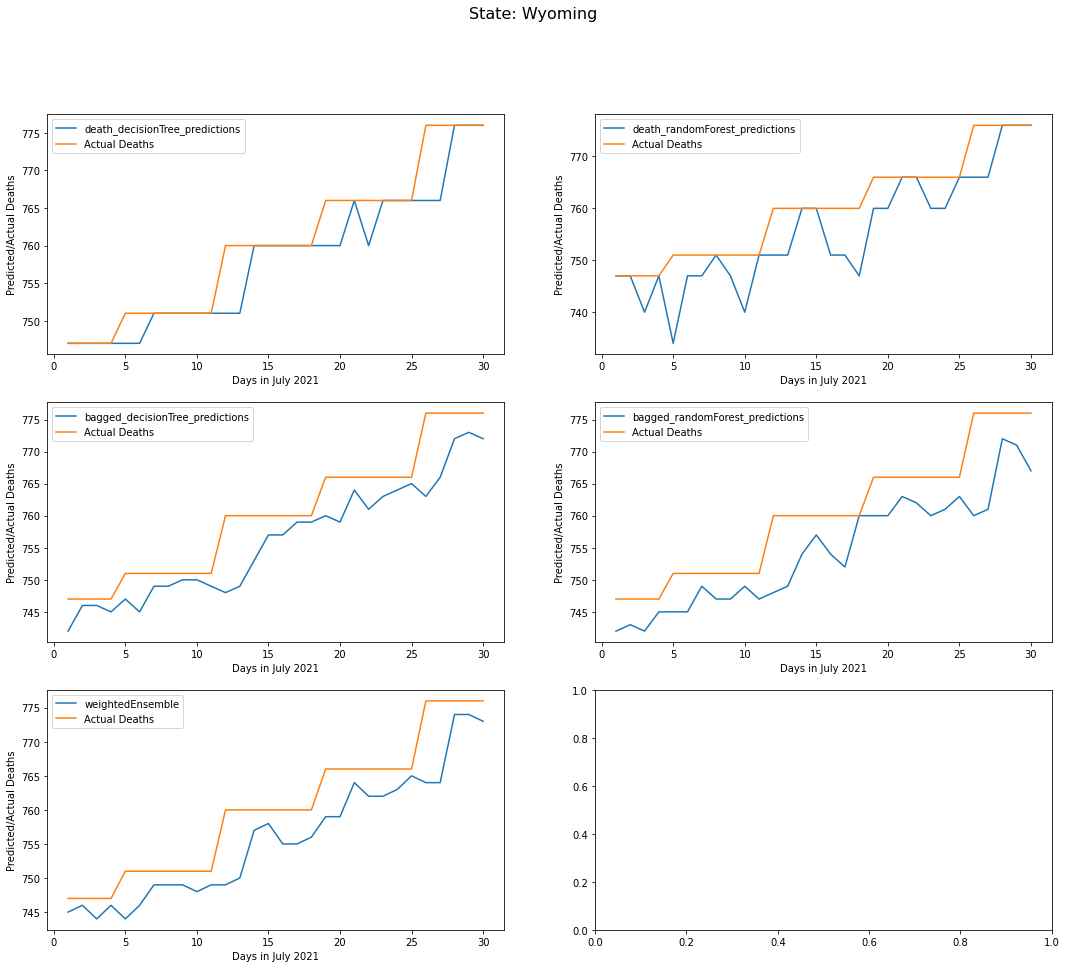

<Figure size 1080x1080 with 0 Axes>

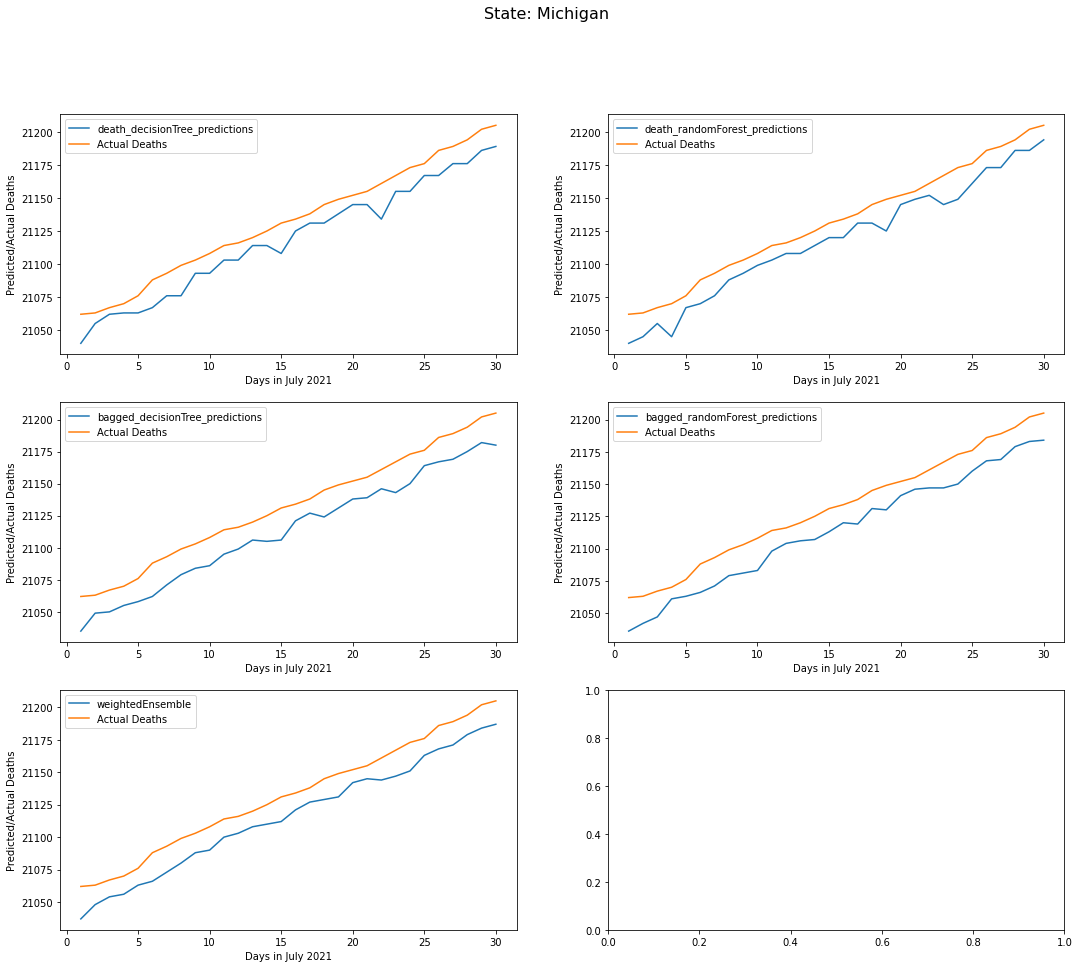

<Figure size 1080x1080 with 0 Axes>

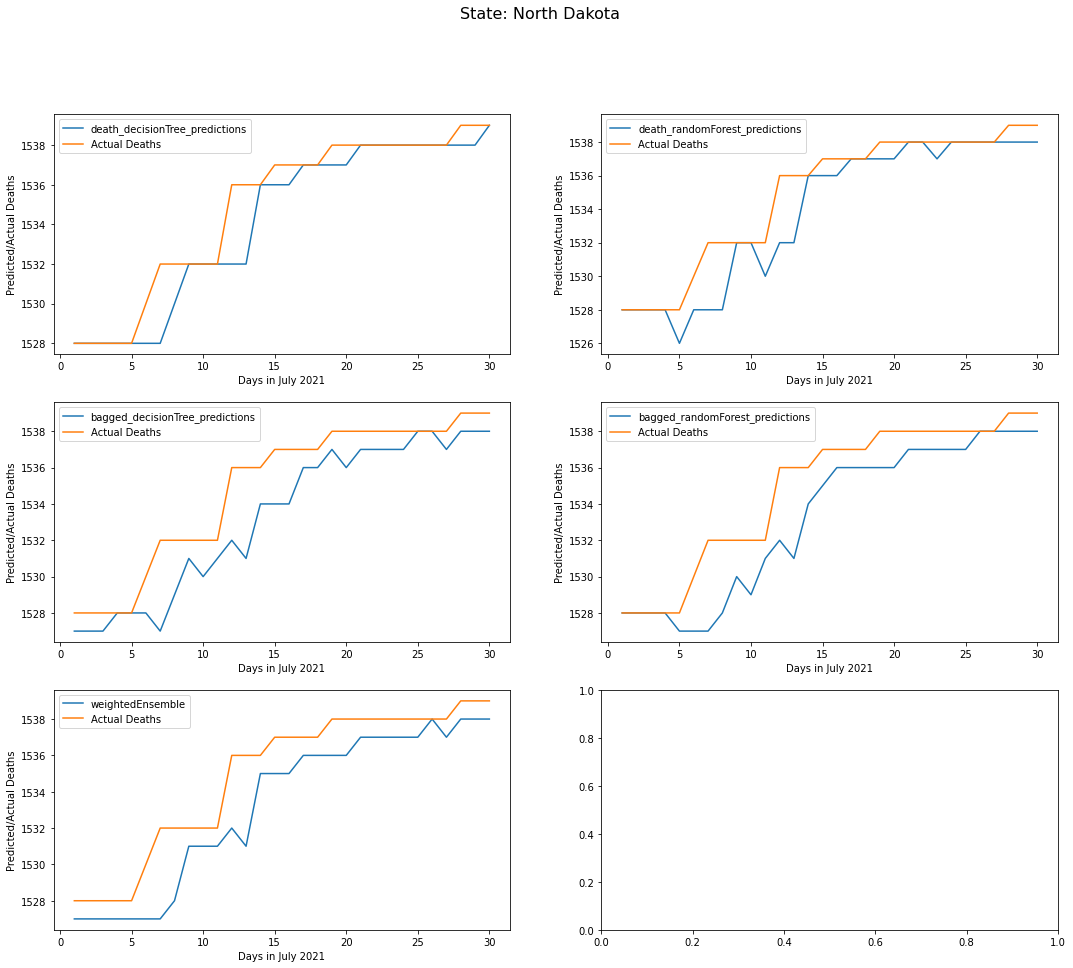

<Figure size 1080x1080 with 0 Axes>

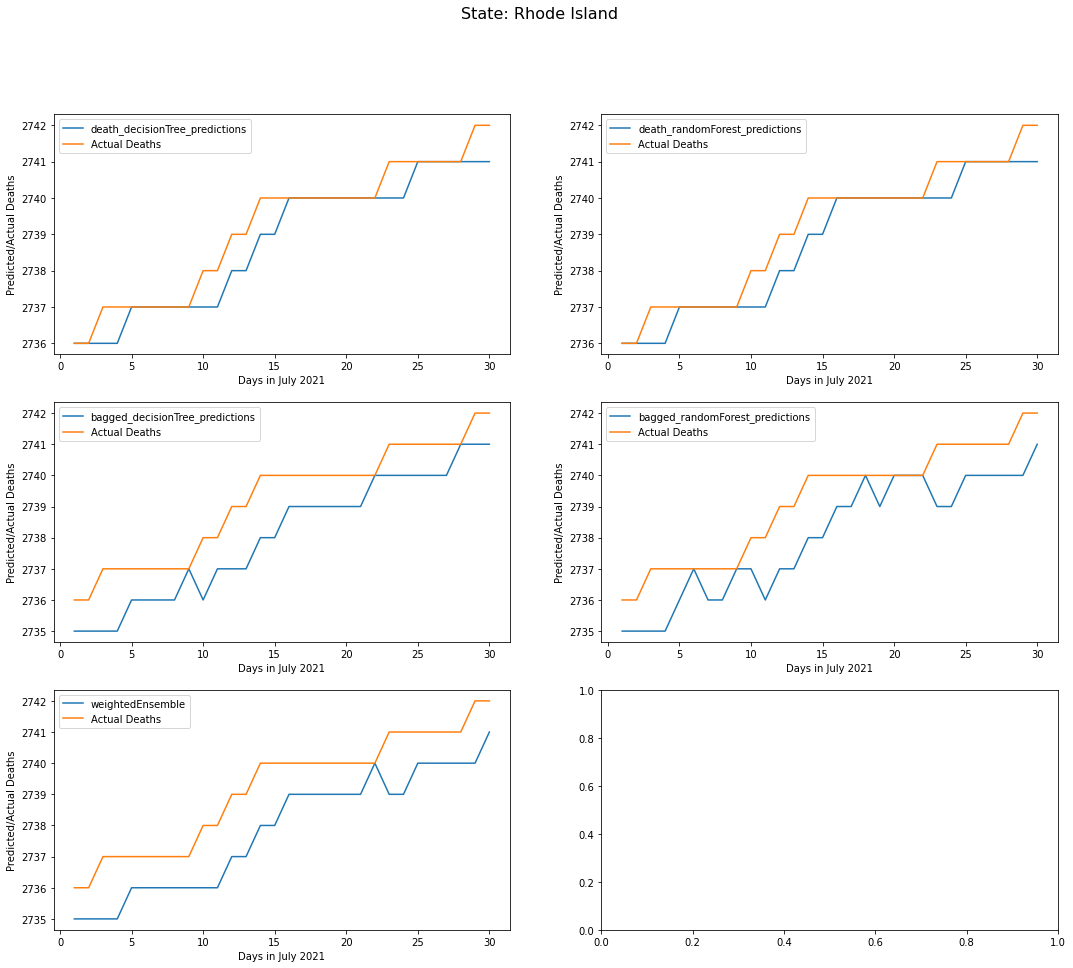

<Figure size 1080x1080 with 0 Axes>

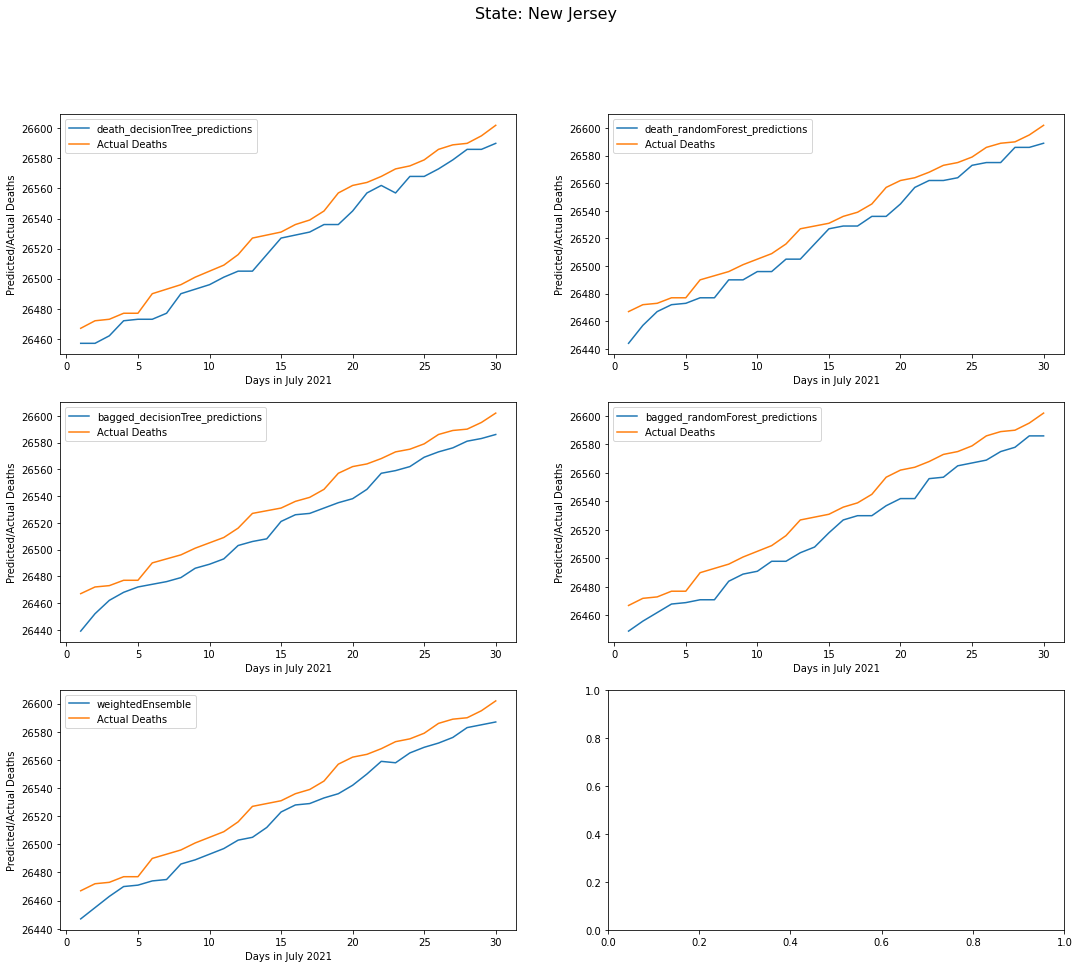

<Figure size 1080x1080 with 0 Axes>

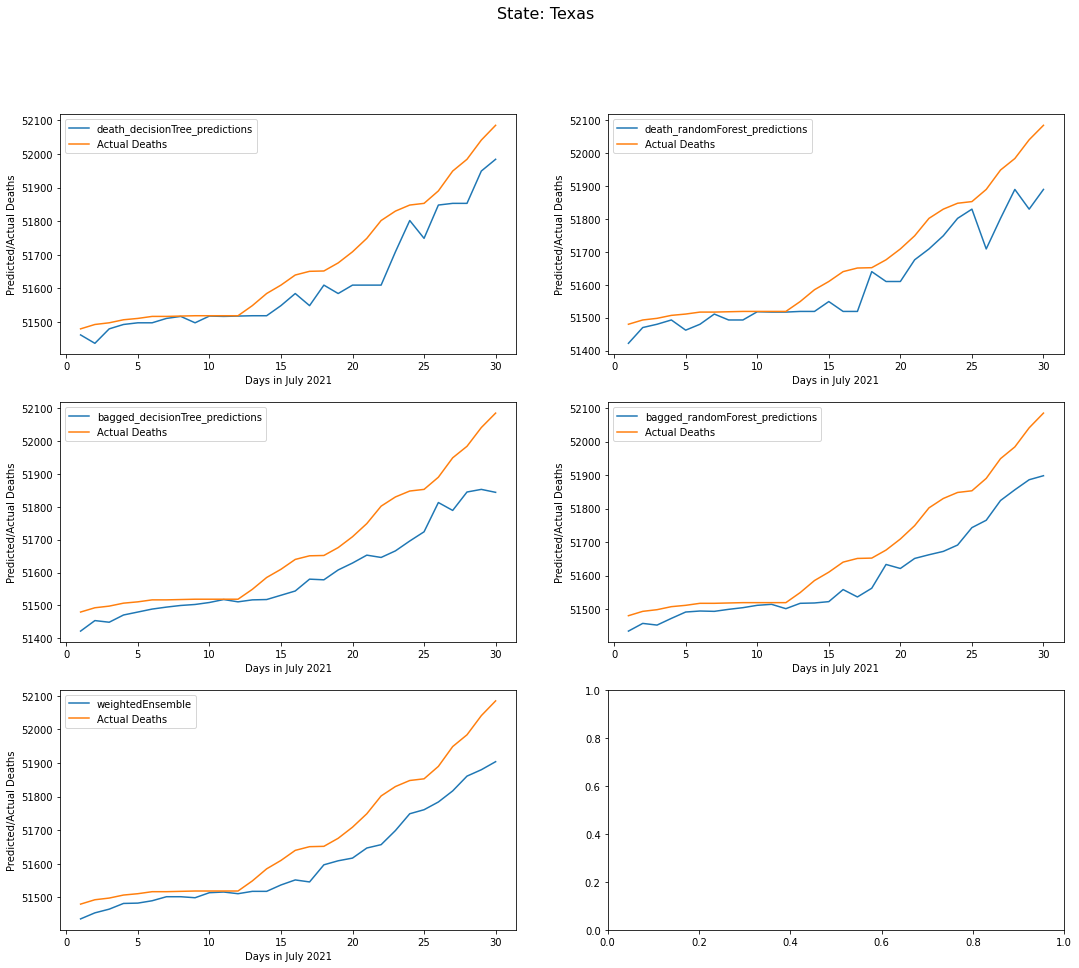

<Figure size 1080x1080 with 0 Axes>

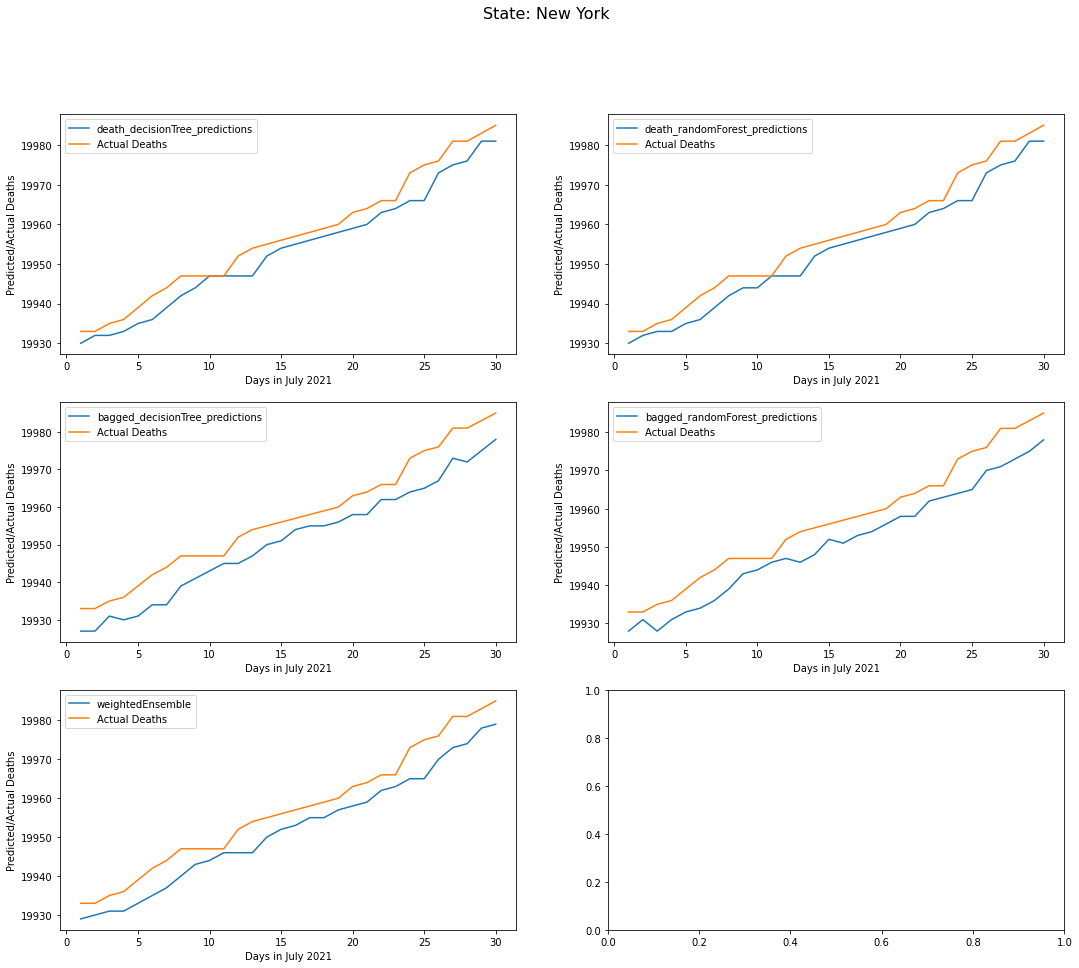

<Figure size 1080x1080 with 0 Axes>

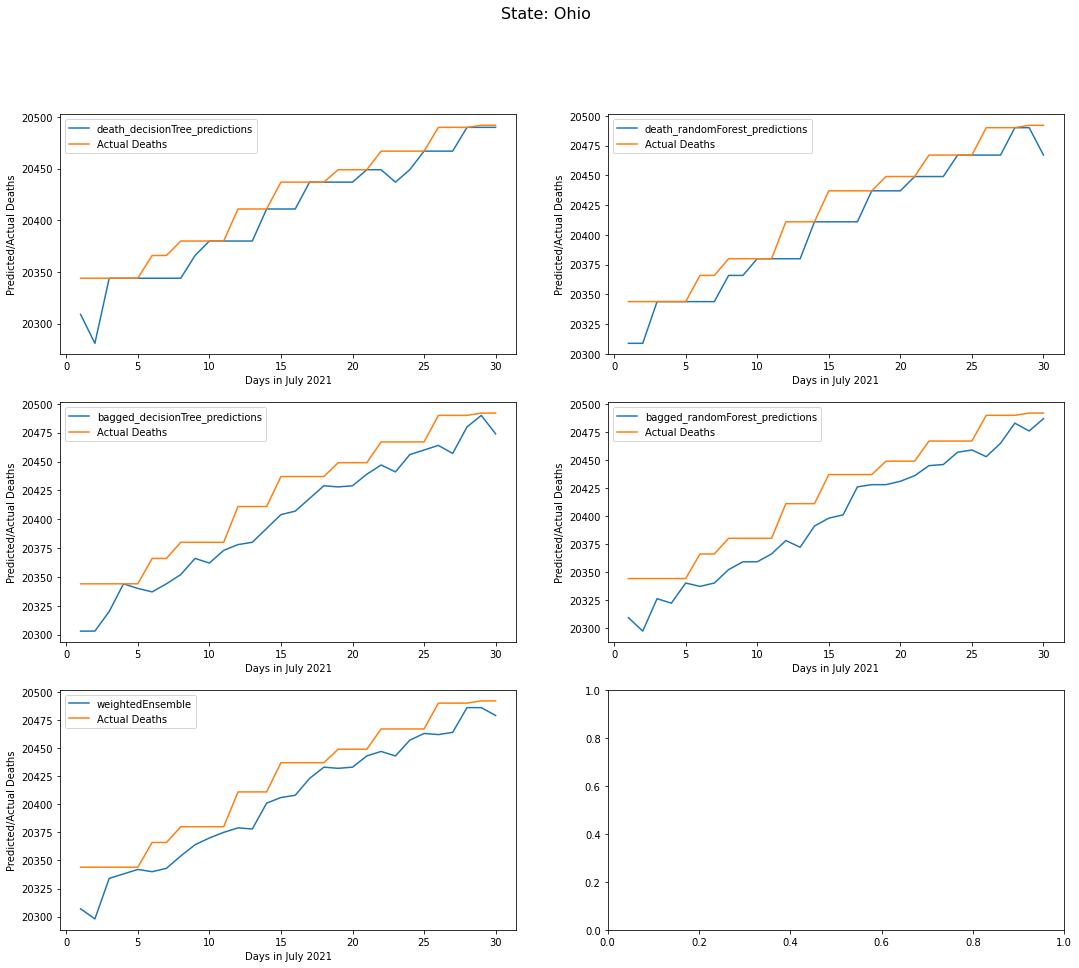

<Figure size 1080x1080 with 0 Axes>

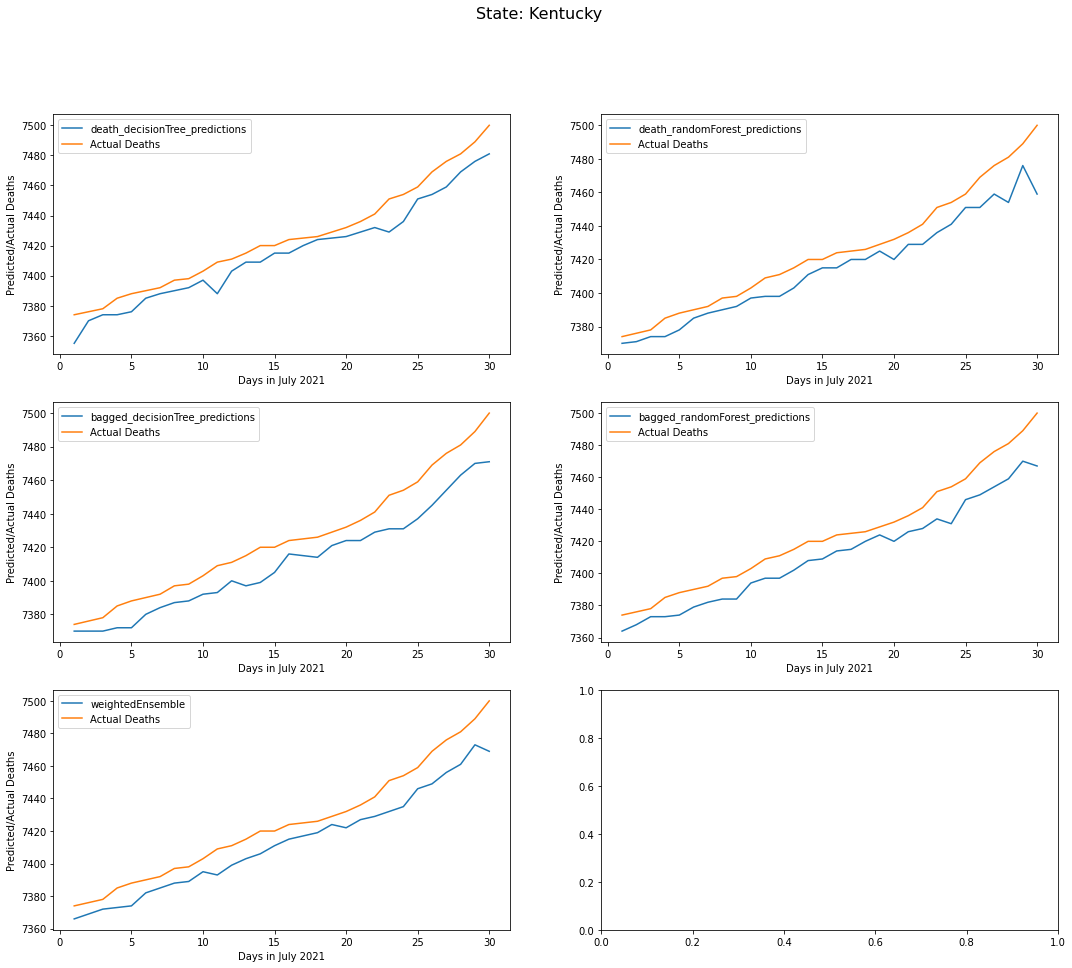

<Figure size 1080x1080 with 0 Axes>

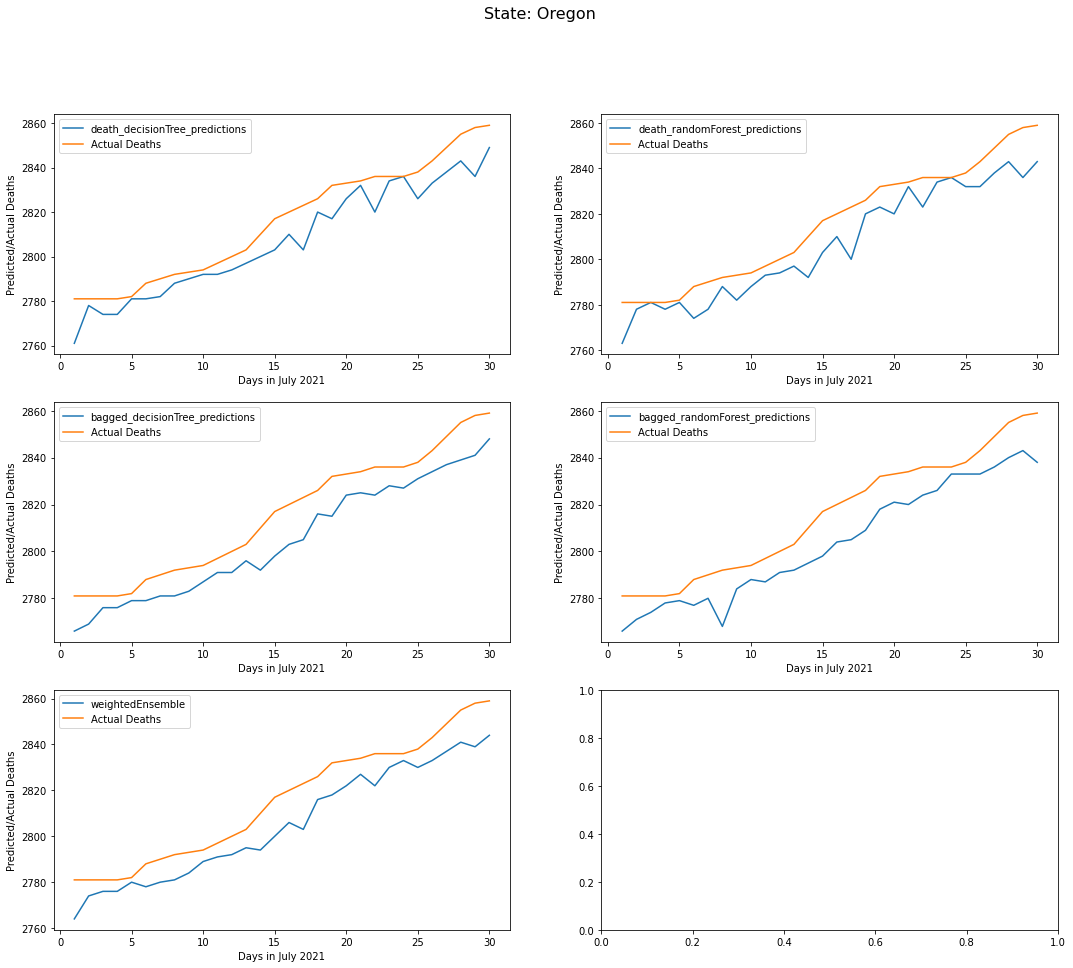

<Figure size 1080x1080 with 0 Axes>

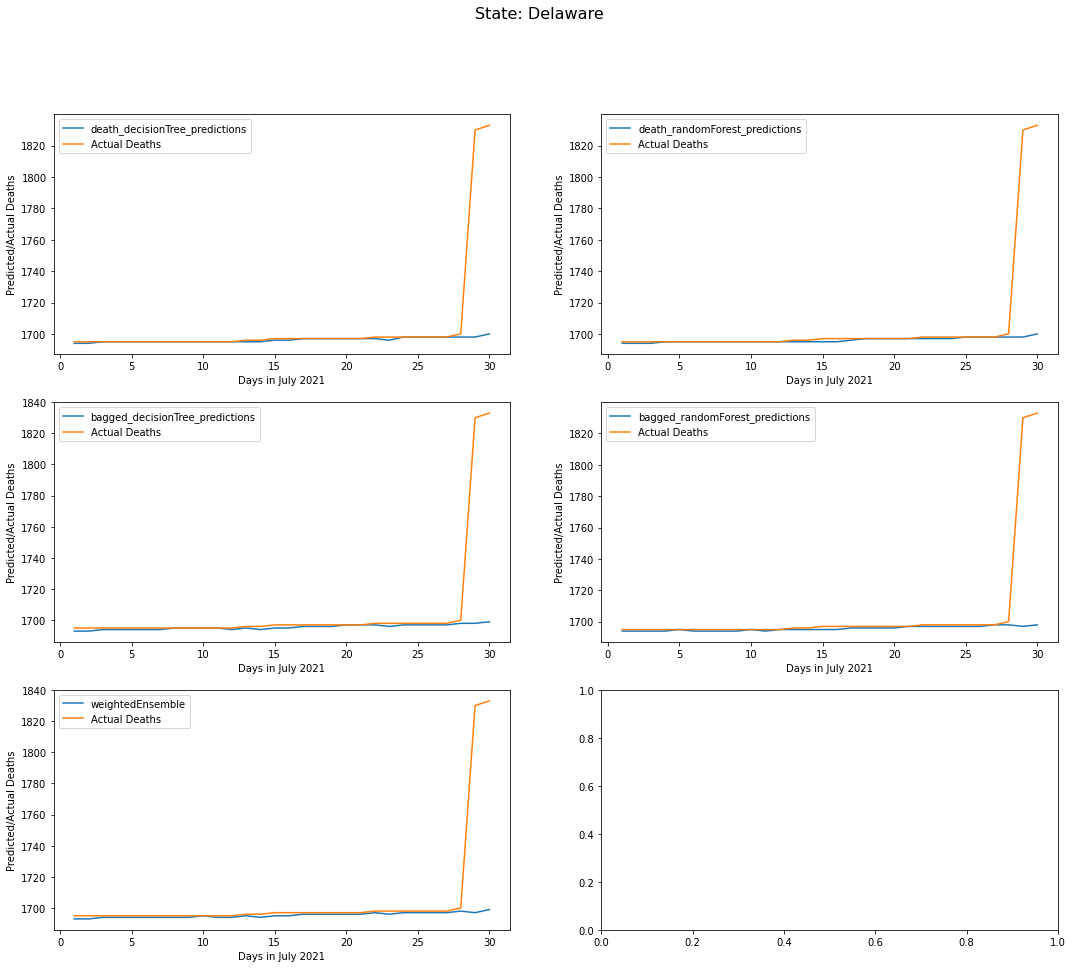

<Figure size 1080x1080 with 0 Axes>

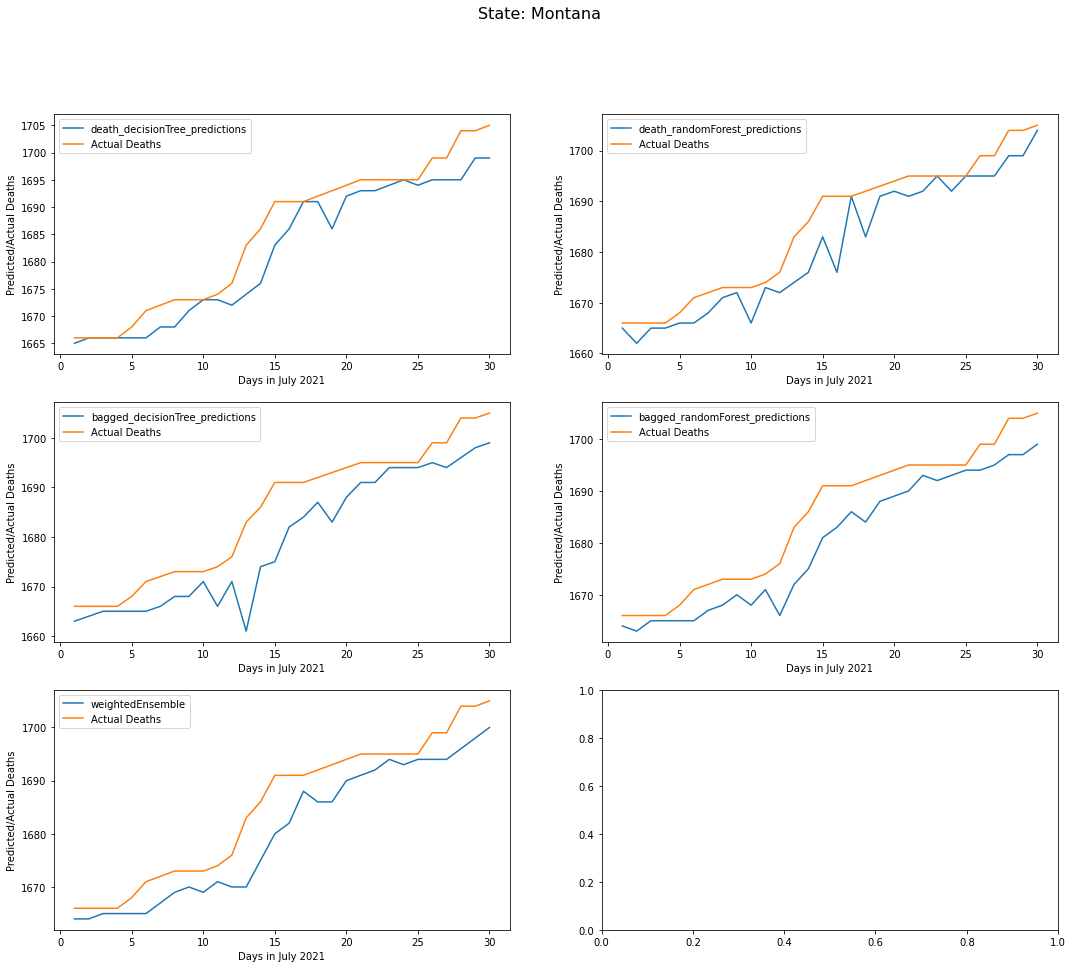

In [17]:
data_source='cdc'
data_type = 'death'
states = [file.split('_')[0] for file in all_files]
models = [data_type+'_decisionTree_predictions', data_type+'_randomForest_predictions', 
          'bagged_decisionTree_predictions', 'bagged_randomForest_predictions', 'weightedEnsemble']

for state in states:
    if state=='Virginia':
        continue
    df_sub = df.iloc[:1,:]
    df_sub = df_sub.loc[:, df_sub.columns.str.contains(state)]
    df_sub = df_sub.loc[:, df_sub.columns.str.contains('cdc')]
    # df_sub = df_sub.loc[:, df_sub.columns.str.contains('jh')]
    df_sub = df_sub.loc[:, df_sub.columns.str.contains('death')]
#     models = ['death_decisionTree_predictions', 'death_randomForest_predictions', 'bagged_decisionTree_predictions', 'bagged_randomForest_predictions', 'weightedEnsemble']

    actual = df_sub.loc[:, df_sub.columns.str.contains('death_truth')].to_numpy().T
    # actual = (actual-actual.mean())/(actual.std())


    days = np.arange(1,31)
    model_predictions={}
    plt.figure(1, figsize=(15, 15))
    fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
    for i,model in enumerate(models):
        model_predictions[model]=[]
        df_model = df_sub.loc[:, df_sub.columns.str.contains(model)]
#         print(df_model)
        model_predictions[model]=df_model.to_numpy().T.astype(int)
        
    #     model_predictions[model] = (model_predictions[model]-model_predictions[model].mean())/(model_predictions[model].std())
    #     print(df_model.to_numpy().T.shape)
        
        if i==0:
            x=0
            y=0
        if i==1:
            x=0
            y=1
        if i==2:
            x=1
            y=0
        if i==3:
            x=1
            y=1
        if i==4:
            x=2
            y=0
#         print(model_predictions[model].shape)
        ax[x,y].plot(days, model_predictions[model], label=model)
        ax[x,y].plot(days, actual, label='Actual Deaths')
        ax[x,y].legend()
        ax[x,y].set_xlabel('Days in July 2021')
        ax[x,y].set_ylabel('Predicted/Actual Deaths')
    fig.suptitle('State: '+state, fontsize=16)
    plt.show()
    # plt.plot(days, actual, label='actual')


In [28]:
all_files = listdir('./Predictions/State/')
states = [file.split('_')[0] for file in all_files]

In [19]:
all_files = listdir('./Data/State_Data_Clean/')
states = [file.split('_')[0] for file in all_files]

In [24]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [30]:
feature_file = './Predictions/State/'+all_files[0]
rmse_df = pd.read_csv(feature_file)
rmse_df_sub = rmse_df[rmse_df['range']%5==0]   

In [31]:
rmse_df_sub

range  decisionTree  ...  bagged_randomForest  weightedEnsemble
4       5    183.773440  ...           291.549560        197.598010
9      10    206.563120  ...           203.689833        201.492615
14     15    232.830549  ...           245.677055        239.269328
19     20    298.561443  ...           304.553510        301.156816
24     25    373.240863  ...           377.558849        376.341535
29     30    498.754352  ...           501.399075        500.434955

[6 rows x 6 columns]

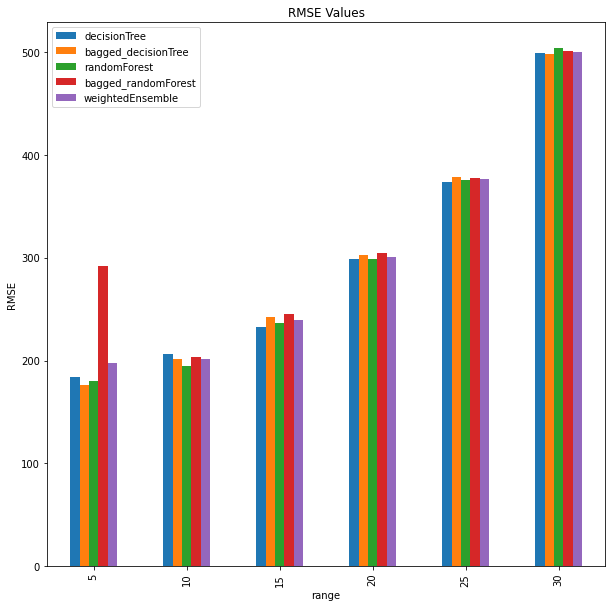

In [32]:
rmse_df_sub.plot(x='range',
        kind='bar',
        stacked=False,
        title='RMSE Values',
            figsize=(10,10), ylabel='RMSE')

In [33]:
all_files

['Georgia_jh_death_RMSE.csv',
 'Arizona_predictions_cumulative.csv',
 'Arkansas_cdc_death_RMSE.csv',
 'Connecticut_predictions_cumulative.csv',
 'Nebraska_predictions_cumulative.csv',
 'Texas_cdc_confirmed_RMSE.csv',
 'Arkansas_predictions_cumulative.csv',
 'Alaska_cdc_confirmed_RMSE.csv',
 'Virginia_jh_confirmed_RMSE.csv',
 'New Hampshire_cdc_death_RMSE.csv',
 'Connecticut_jh_death_RMSE.csv',
 'Tennessee_jh_death_RMSE.csv',
 'Montana_cdc_confirmed_RMSE.csv',
 'Wyoming_cdc_confirmed_RMSE.csv',
 'Wyoming_predictions_cumulative.csv',
 'Maine_cdc_death_RMSE.csv',
 'Louisiana_cdc_death_RMSE.csv',
 'Wyoming_cdc_death_RMSE.csv',
 'Rhode Island_jh_confirmed_RMSE.csv',
 'Louisiana_predictions_cumulative.csv',
 'Michigan_jh_death_RMSE.csv',
 'Maryland_jh_death_RMSE.csv',
 'Tennessee_jh_confirmed_RMSE.csv',
 'Illinois_predictions_cumulative.csv',
 'Pennsylvania_cdc_confirmed_RMSE.csv',
 'North Dakota_cdc_confirmed_RMSE.csv',
 'Maine_predictions_cumulative.csv',
 'Alabama_cdc_confirmed_RMSE.csv',

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

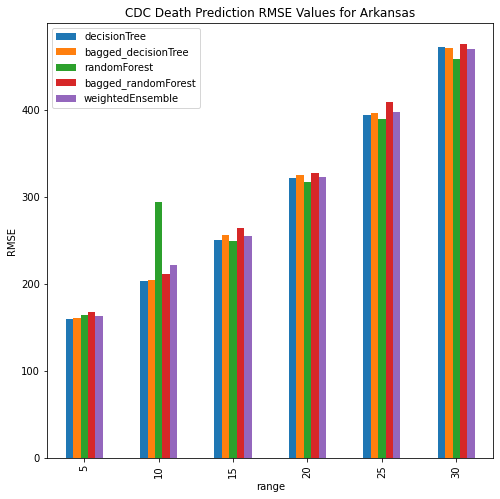

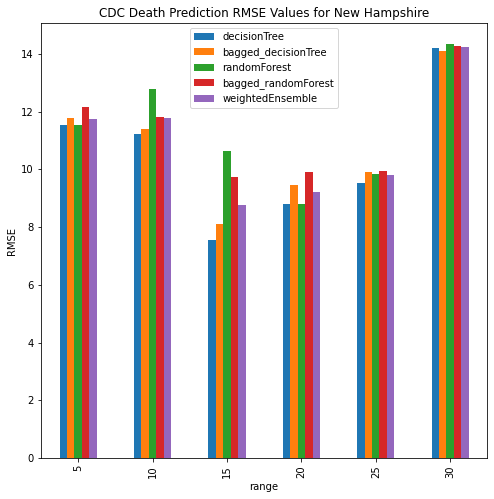

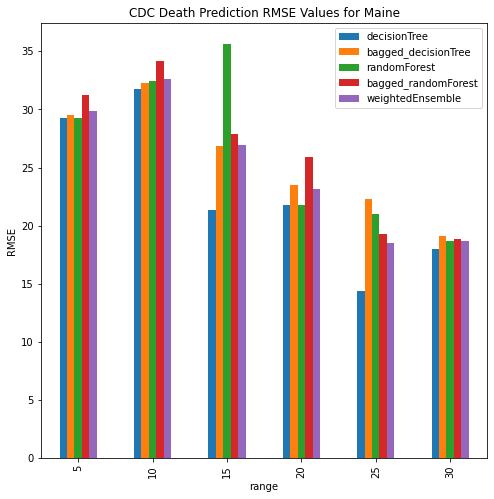

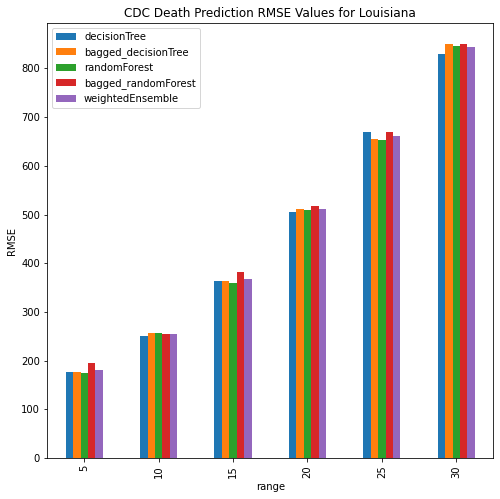

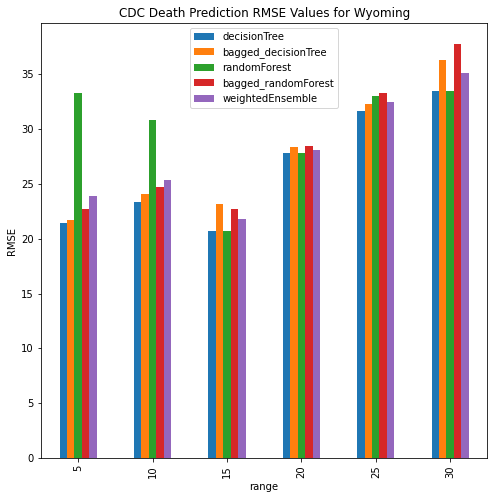

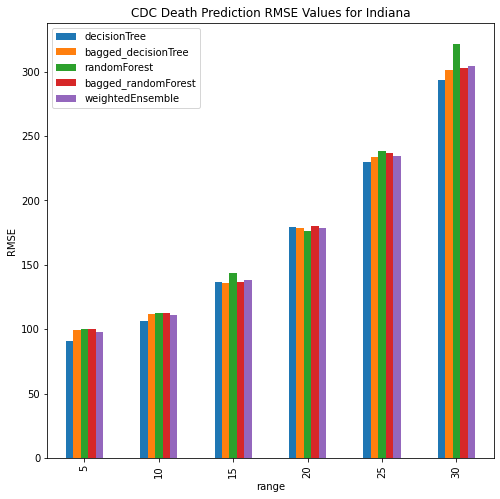

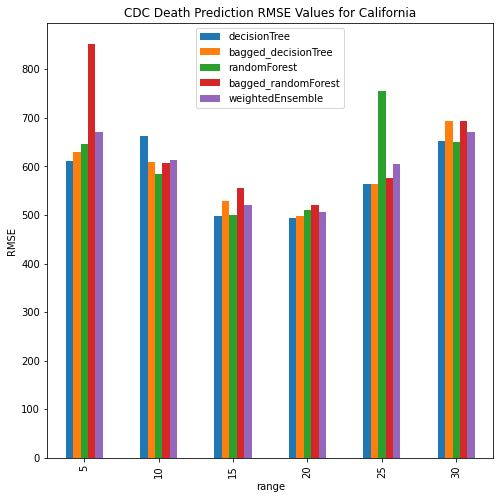

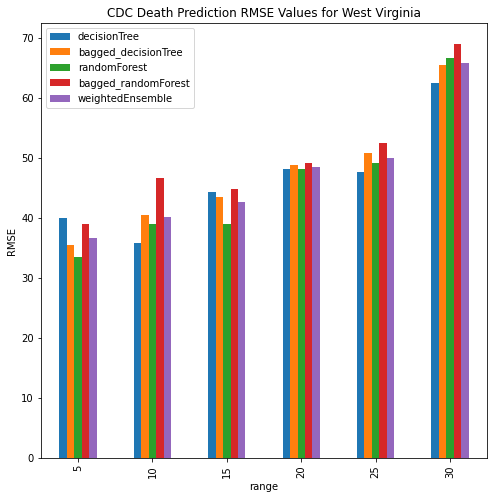

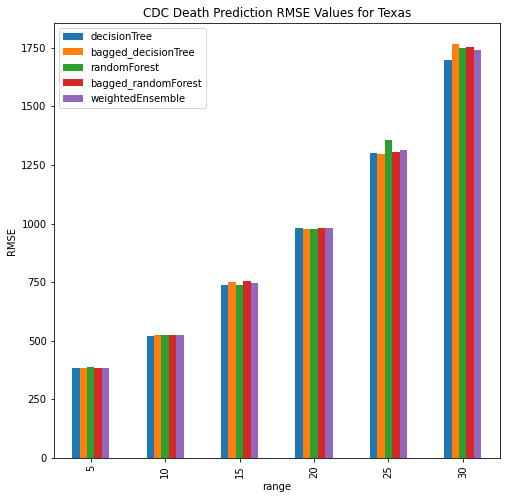

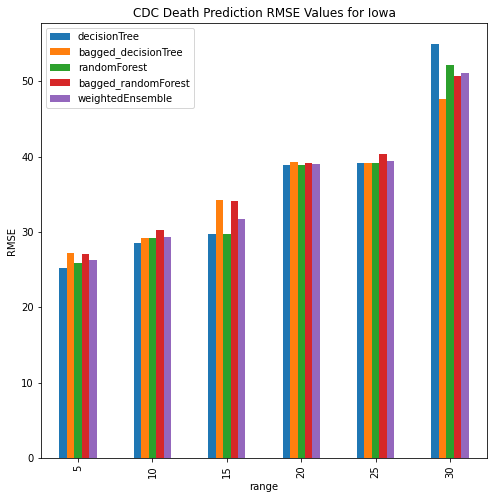

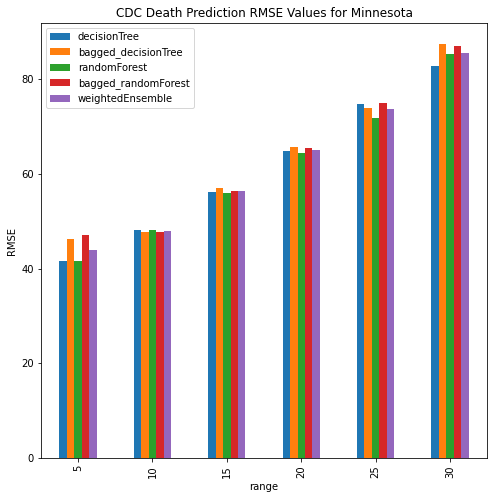

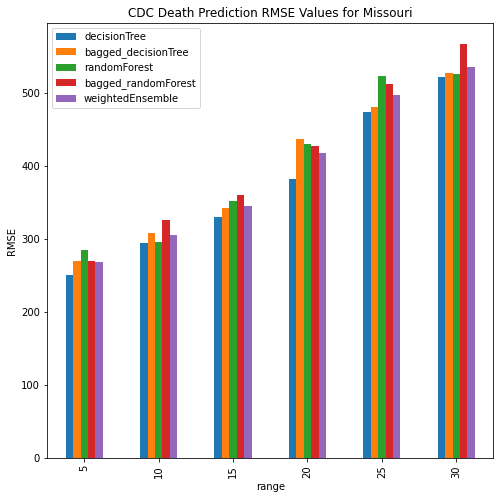

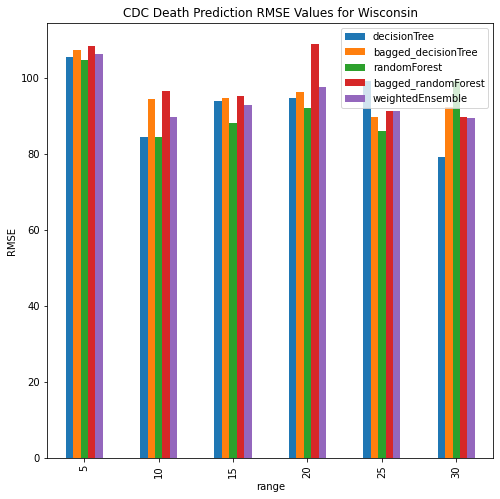

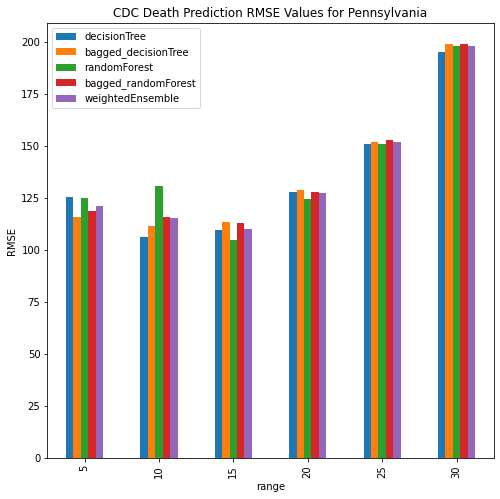

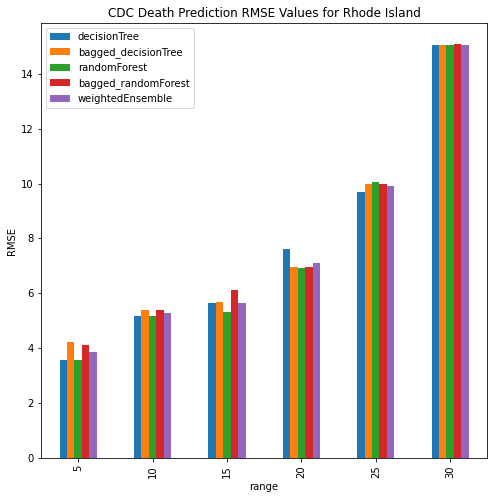

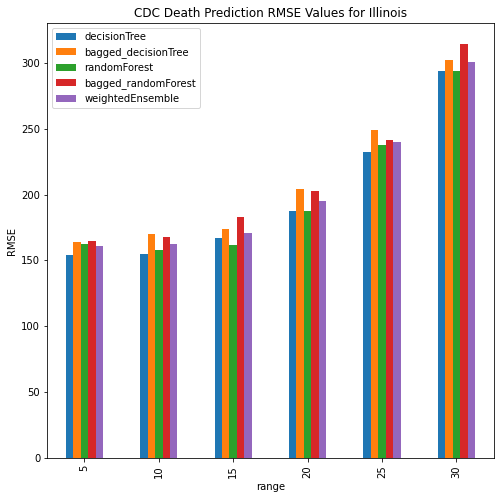

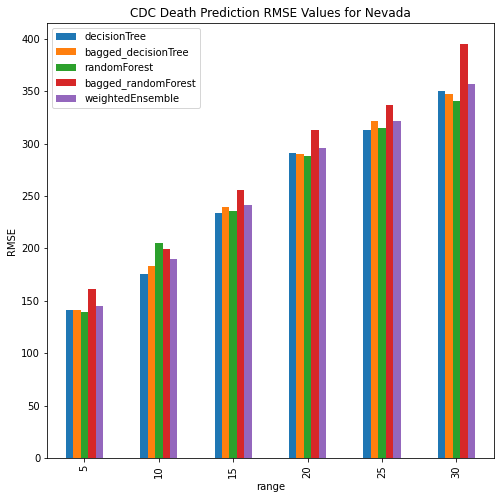

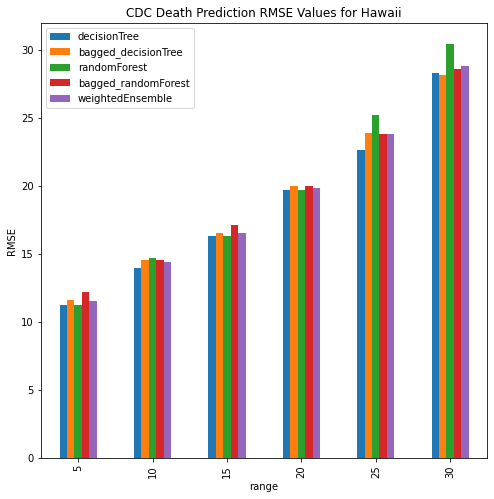

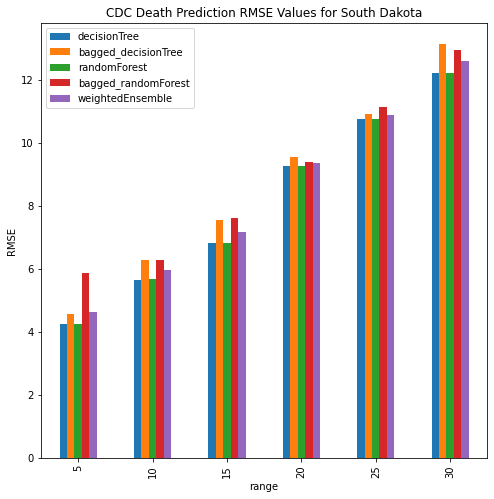

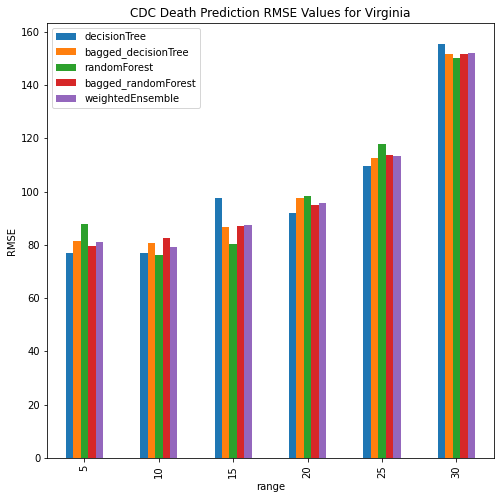

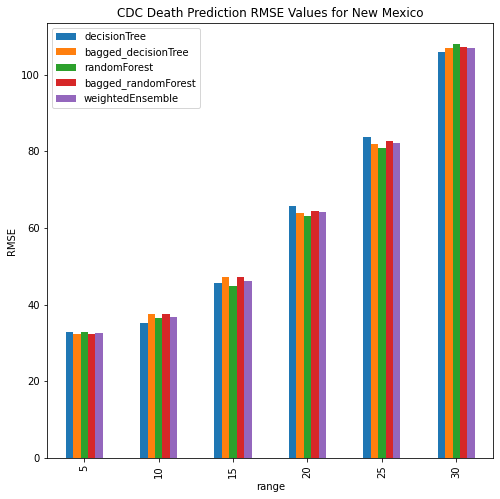

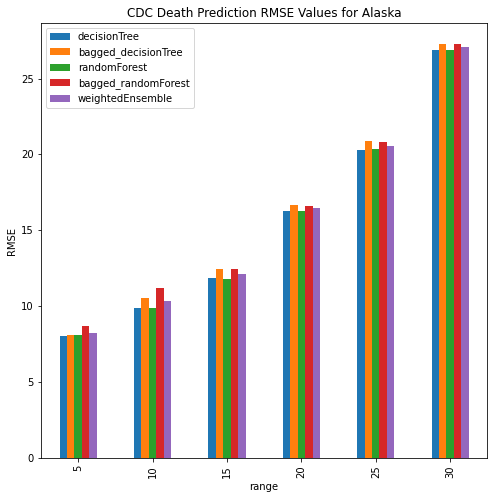

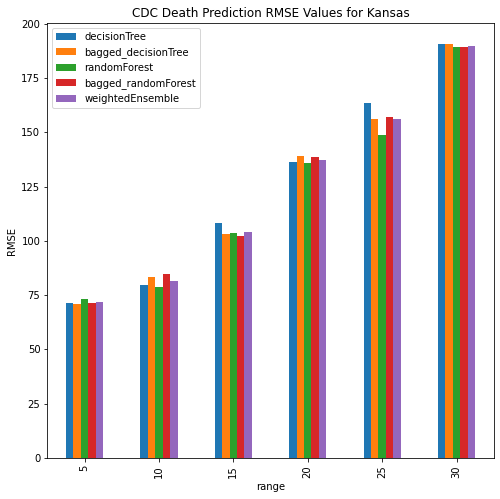

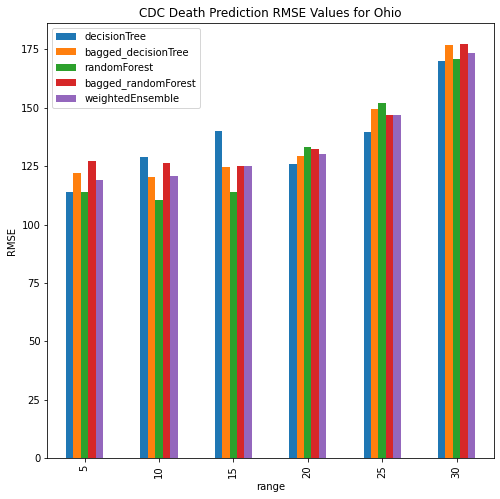

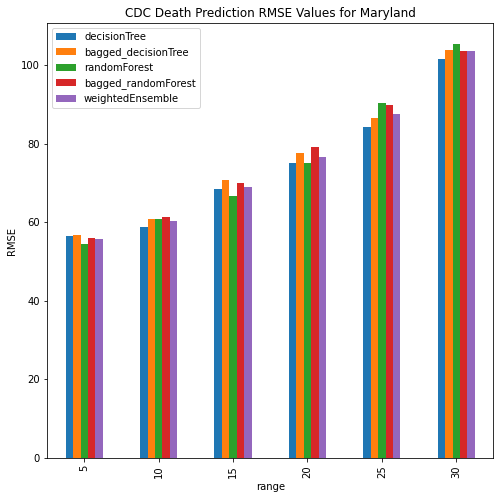

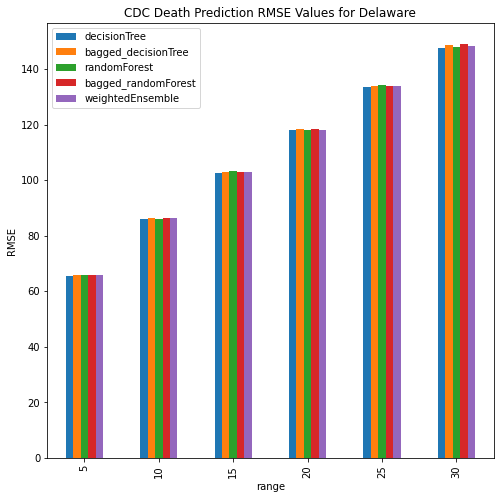

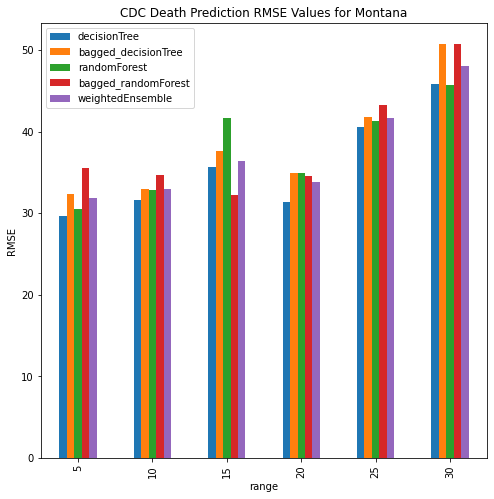

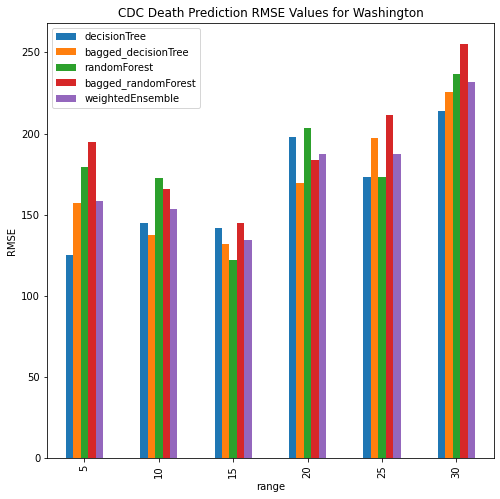

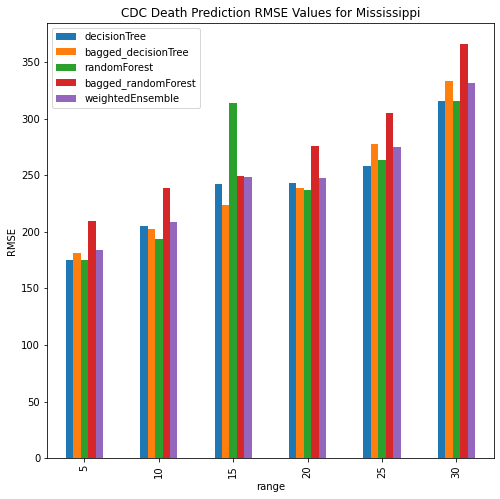

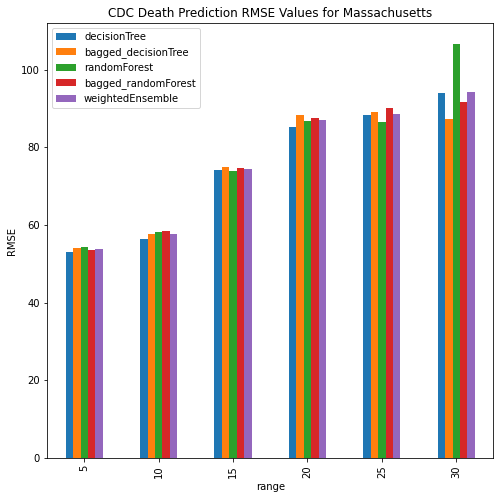

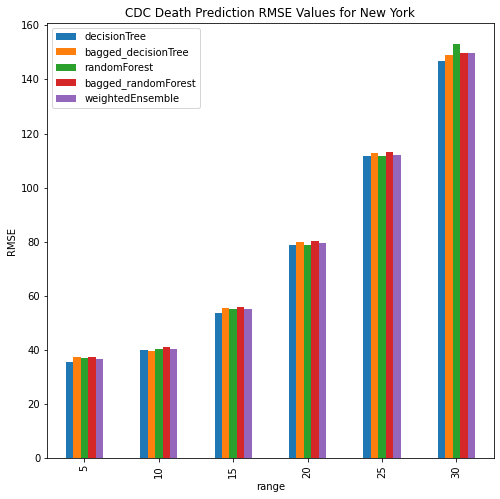

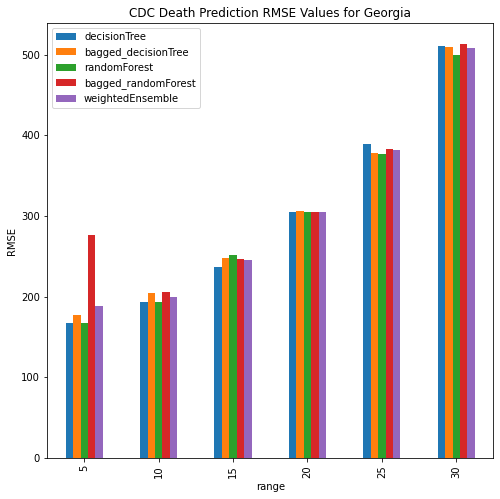

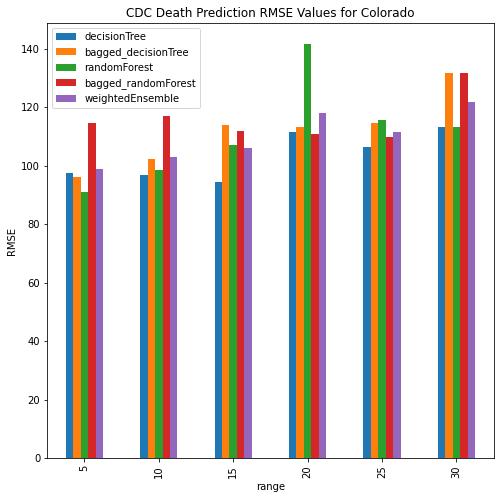

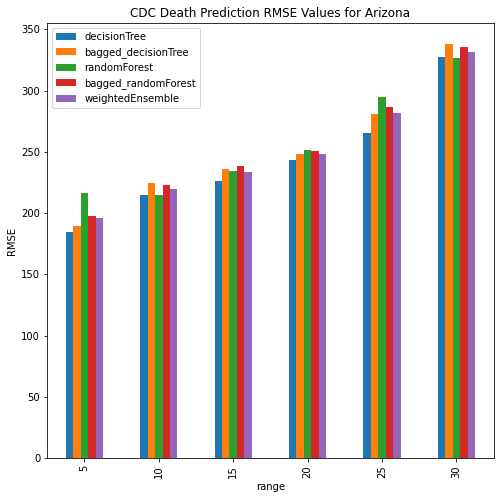

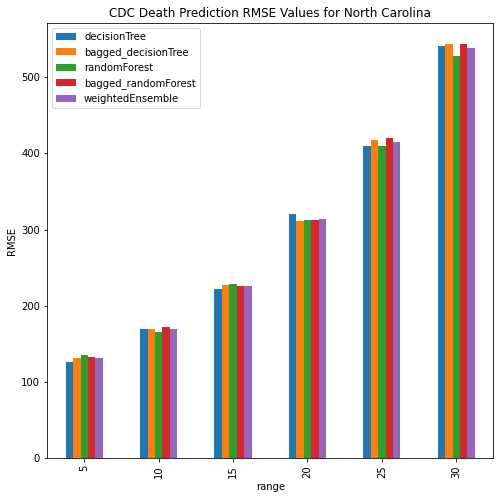

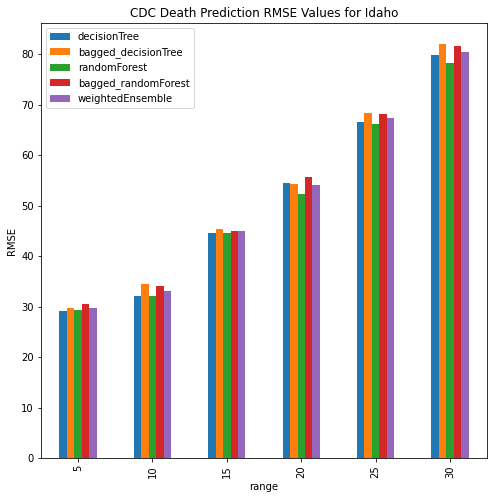

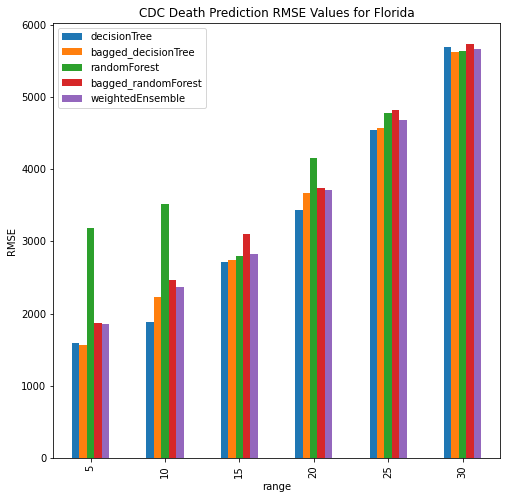

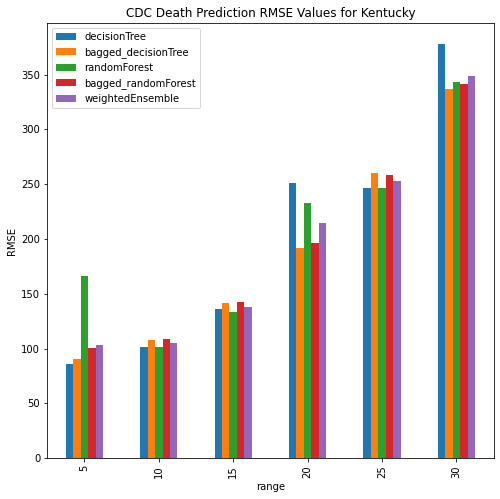

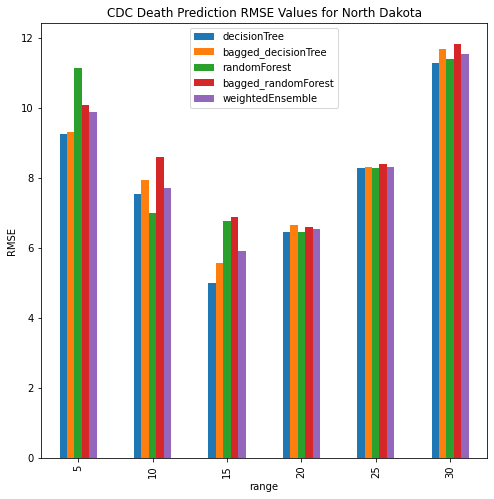

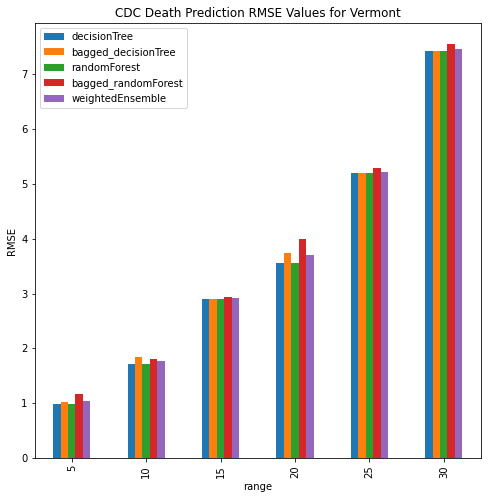

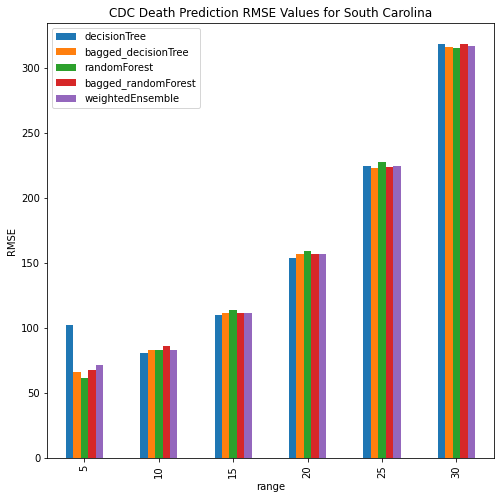

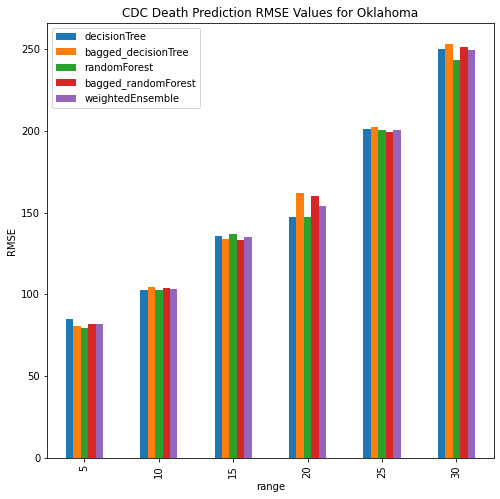

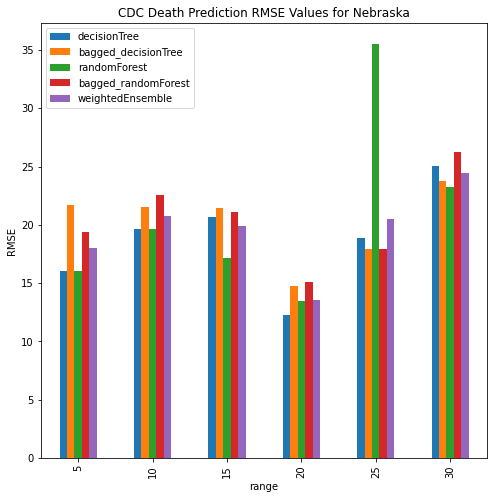

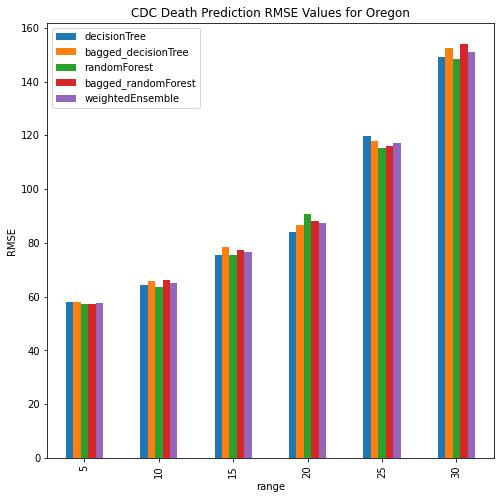

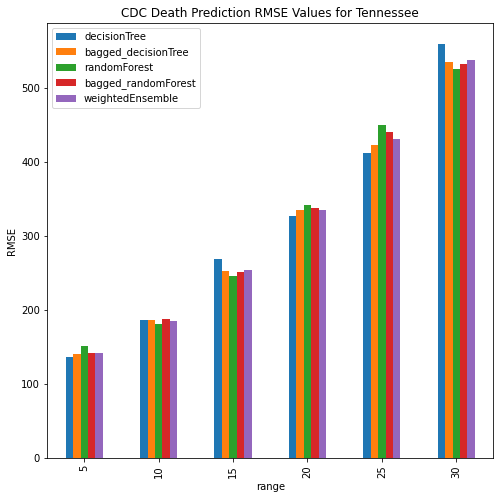

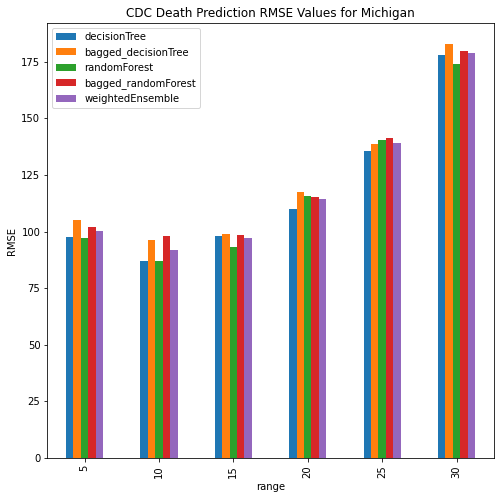

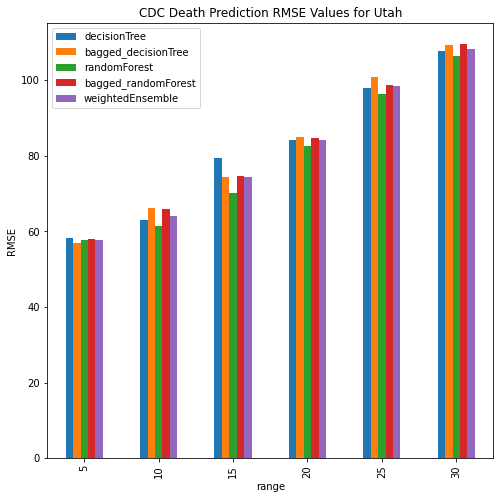

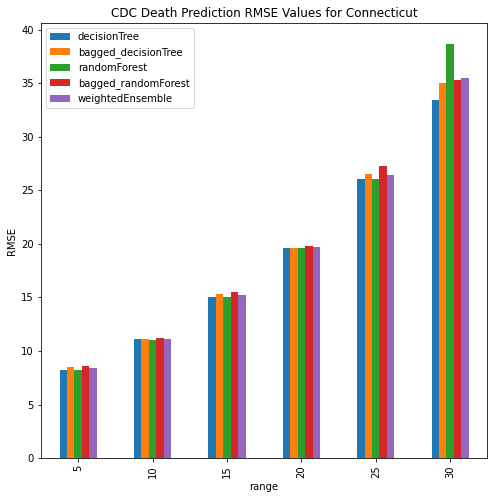

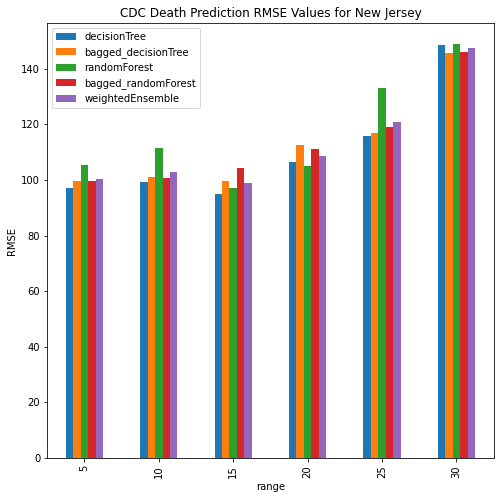

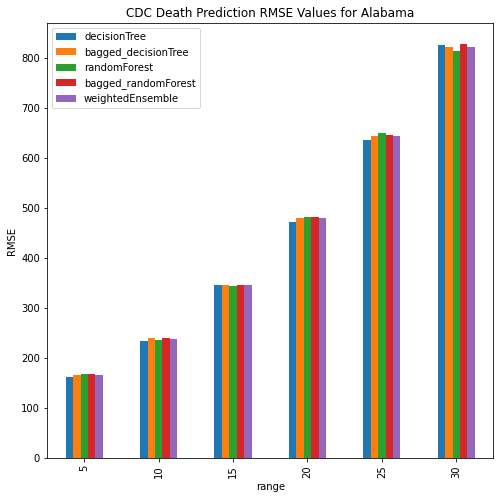

In [34]:
for i, file in enumerate(all_files):    
    feature_file = './Predictions/State/'+all_files[i]
    if "cdc_death" in feature_file:
        state = file.split('_')[0]
        rmse_df = pd.read_csv(feature_file)
        rmse_df_sub = rmse_df[rmse_df['range']%5==0]
        a= rmse_df_sub.plot(x='range',
        kind='bar',
        stacked=False,
        title='CDC Death Prediction RMSE Values for '+state,
            figsize=(8,8), ylabel='RMSE')

<BarContainer object of 5 artists>

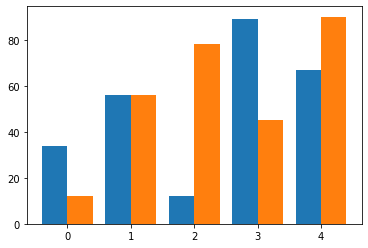

In [36]:
x = np.arange(5)
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
width = 0.40
  
# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

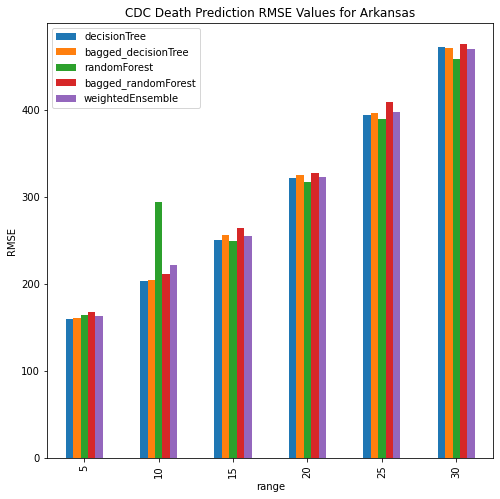

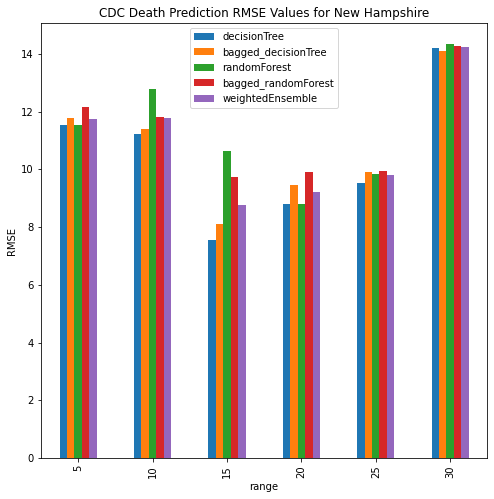

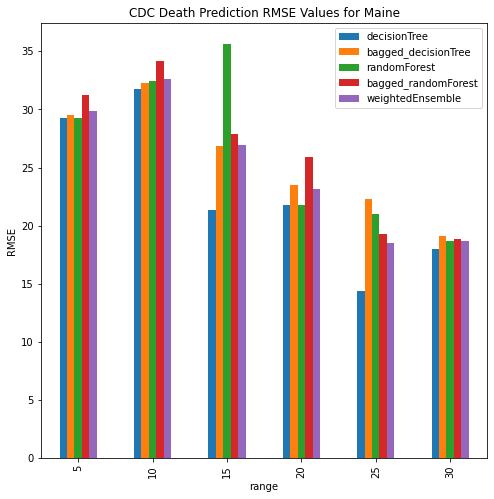

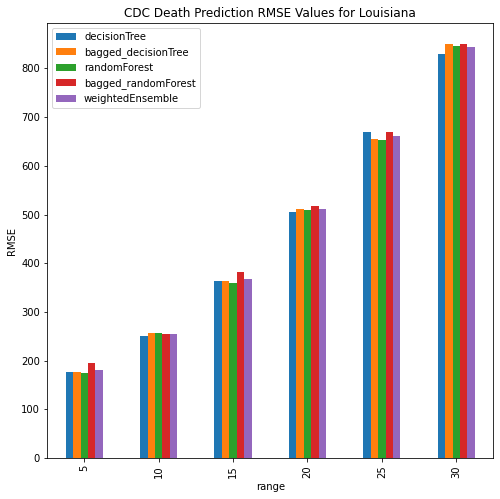

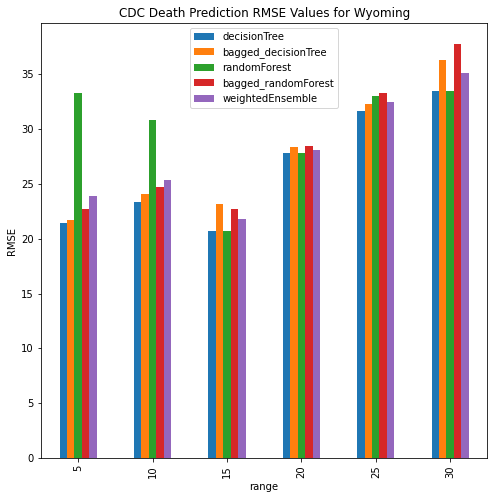

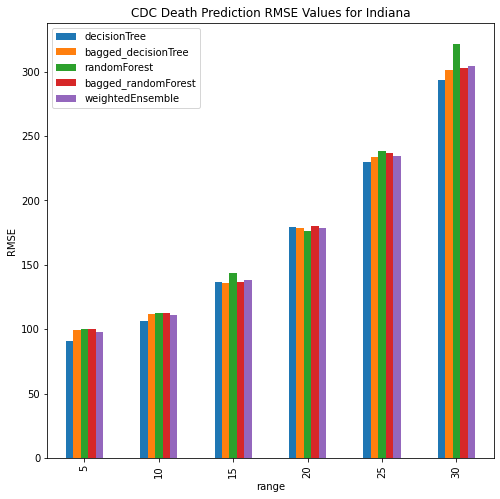

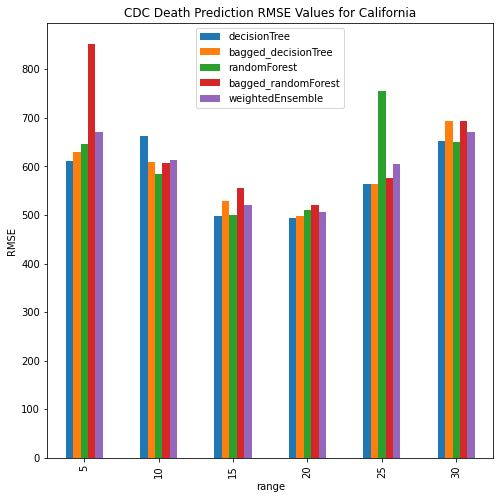

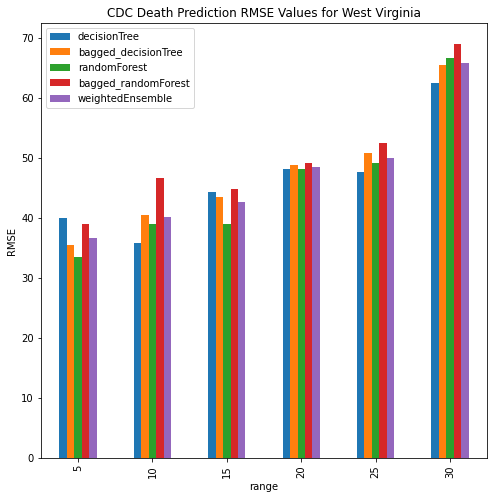

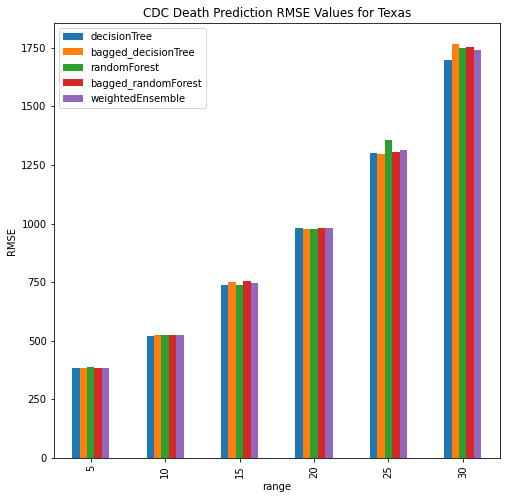

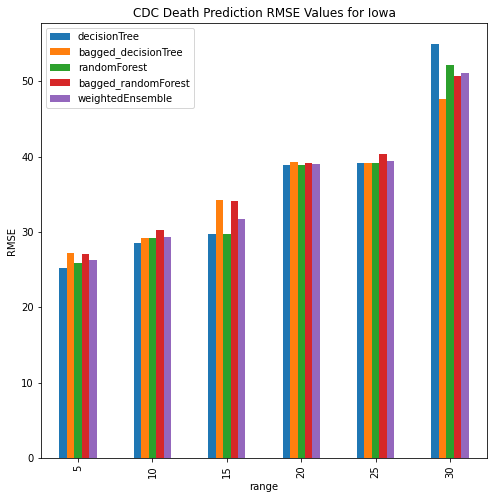

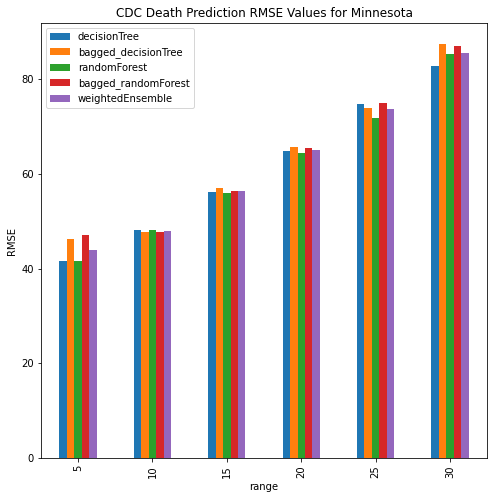

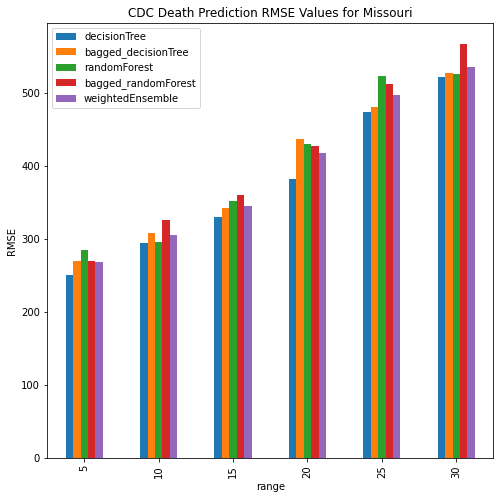

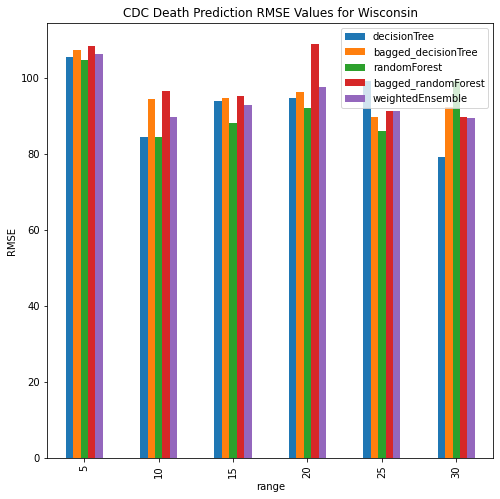

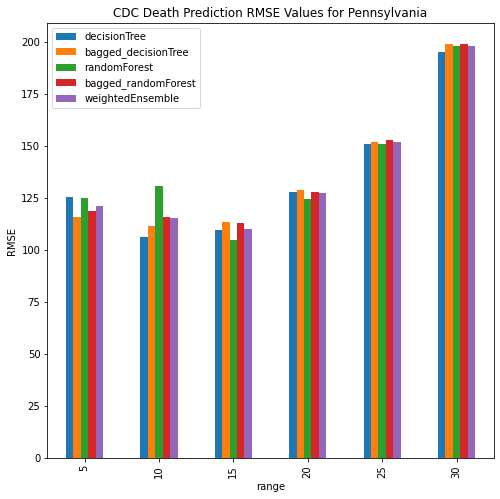

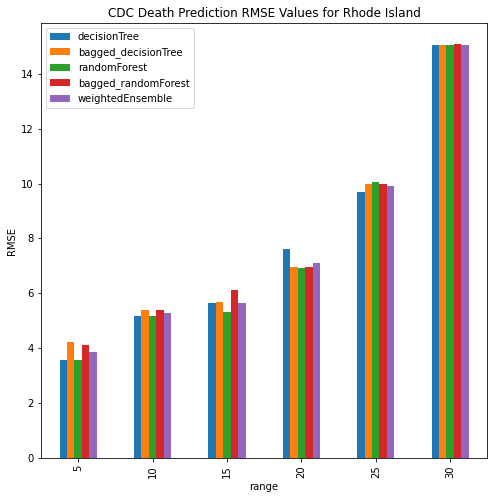

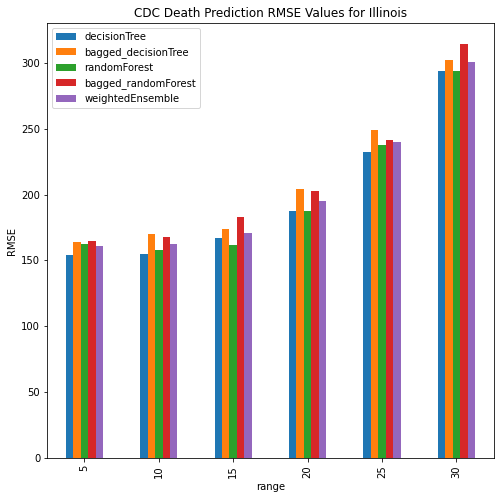

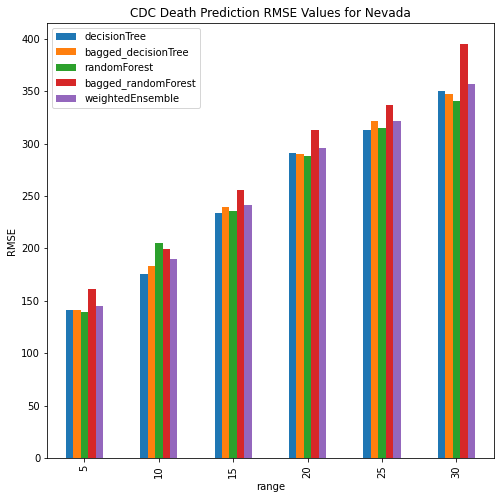

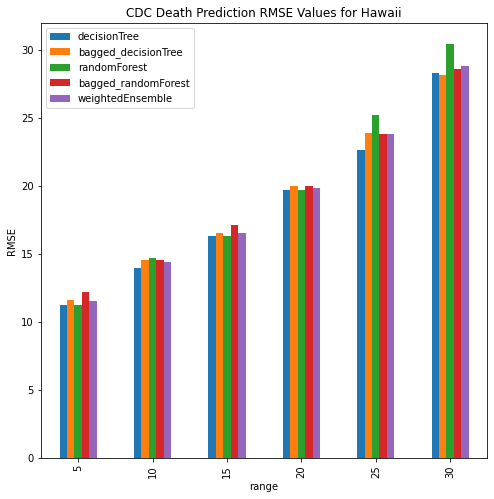

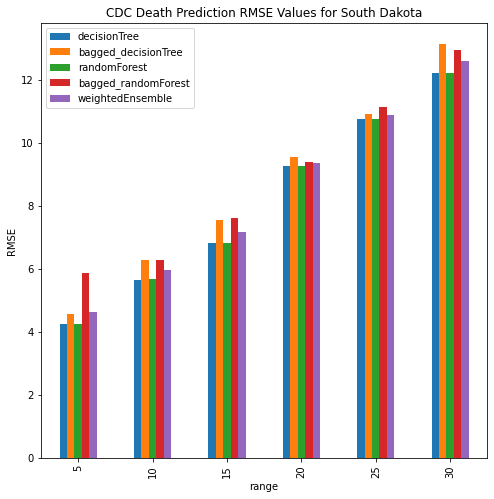

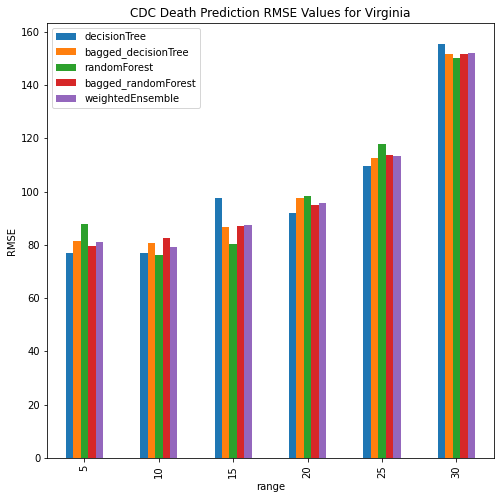

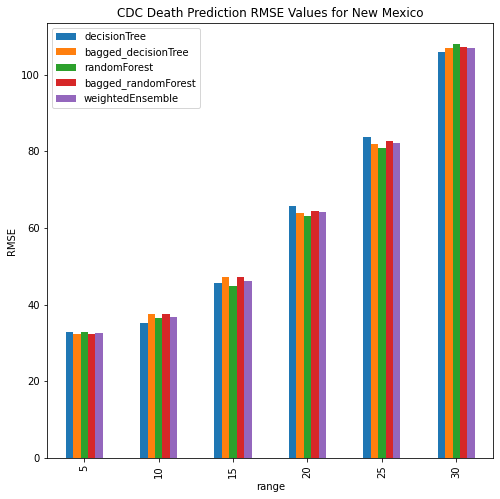

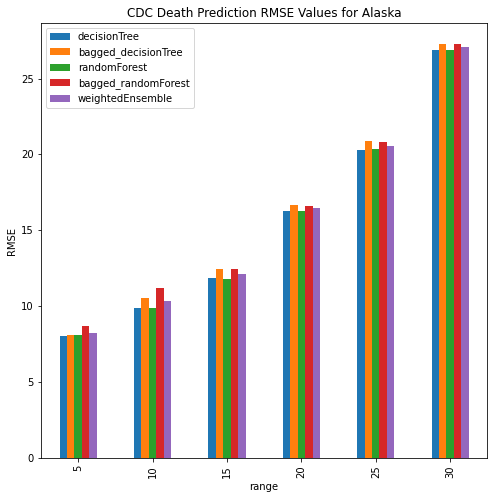

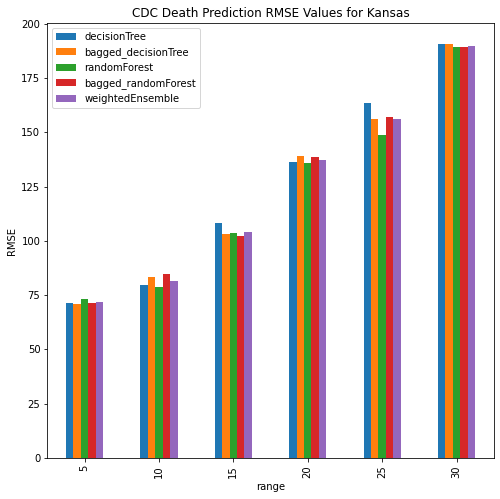

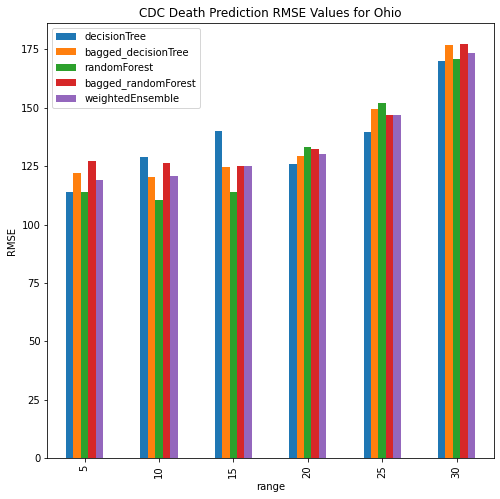

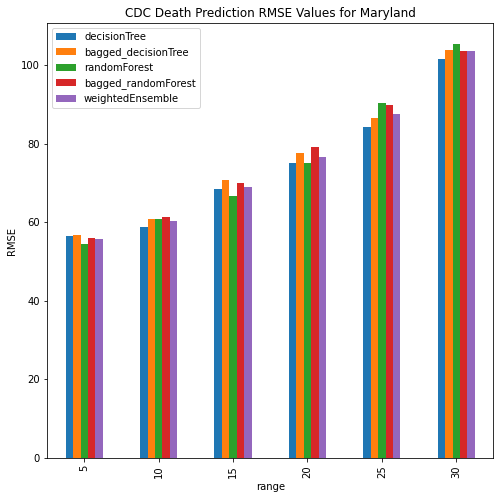

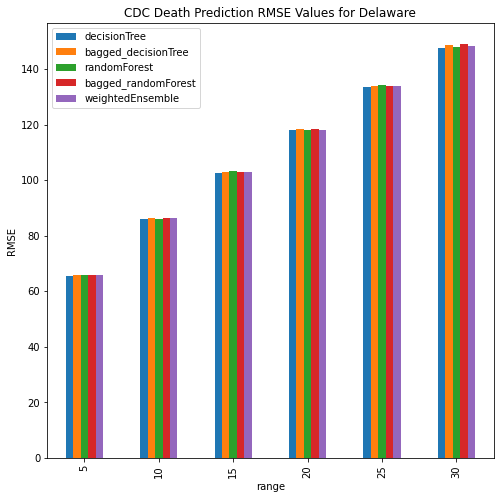

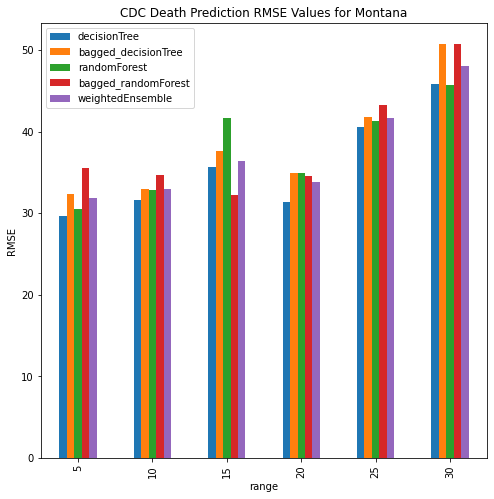

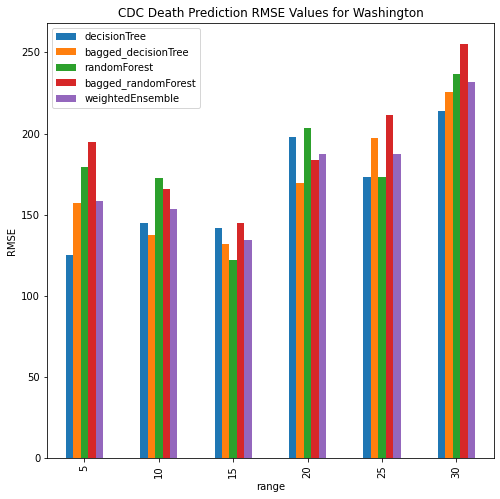

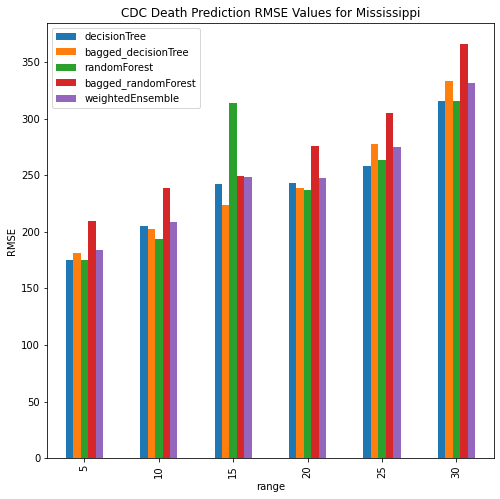

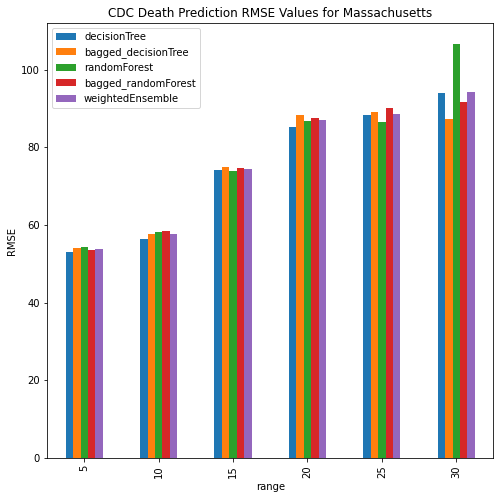

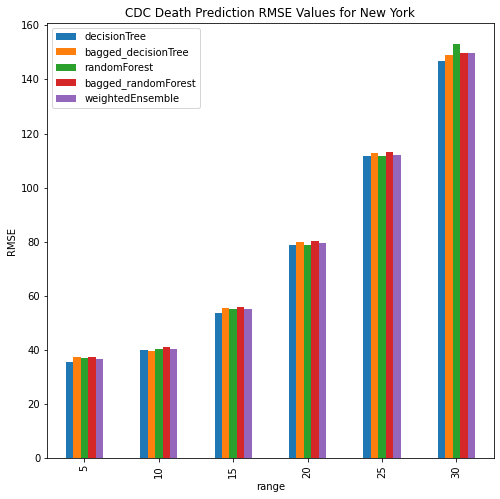

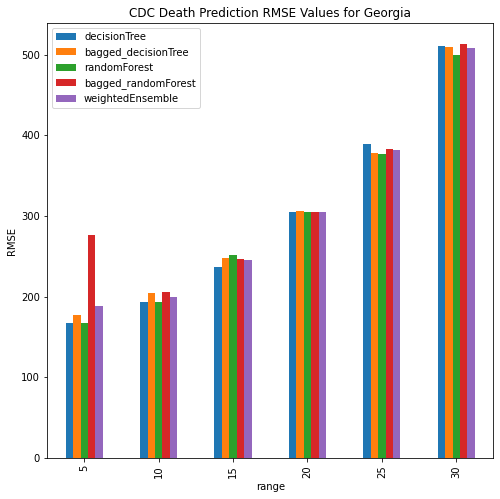

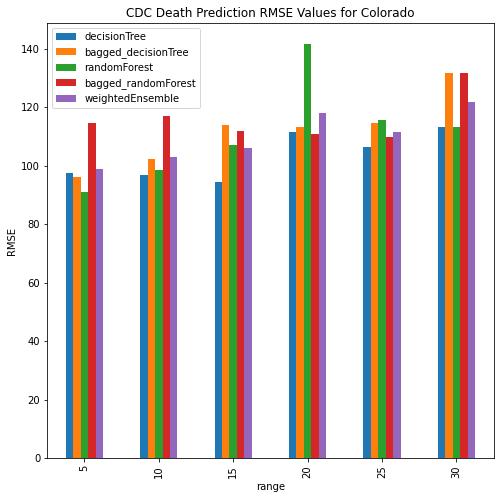

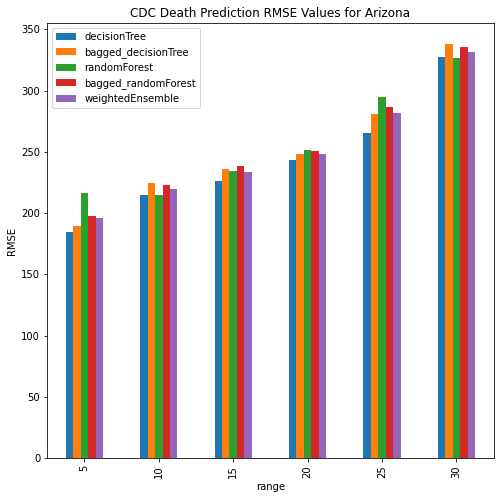

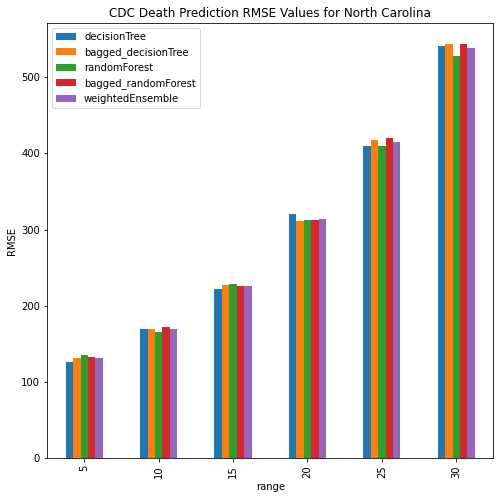

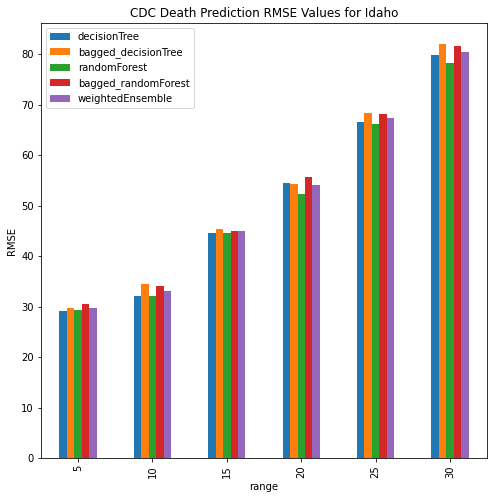

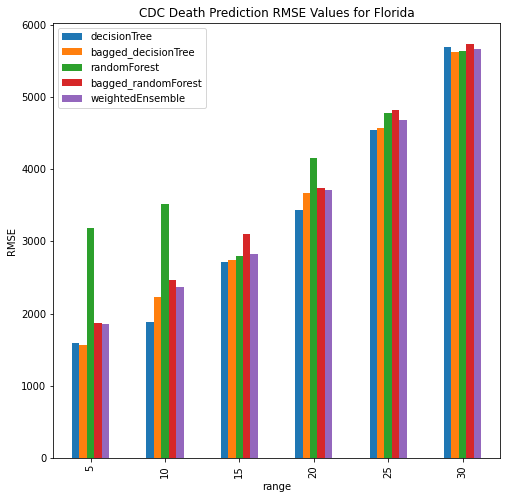

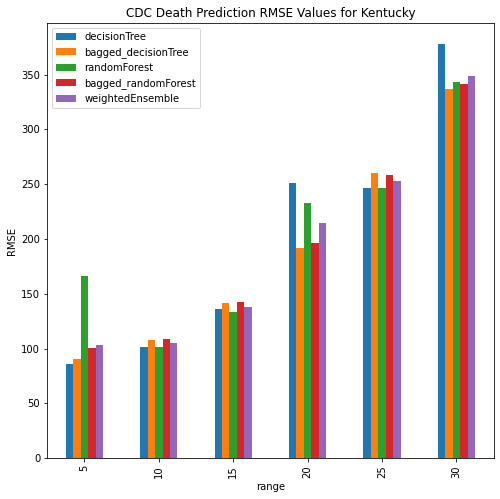

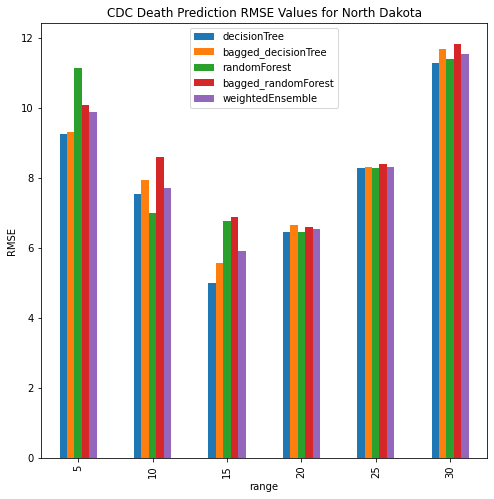

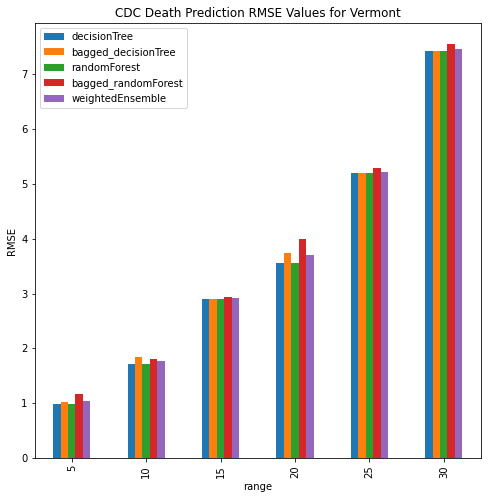

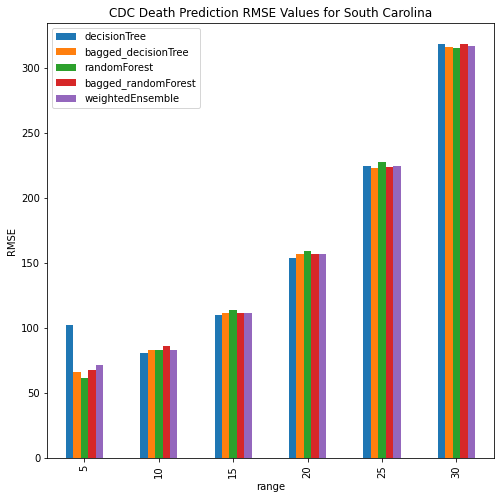

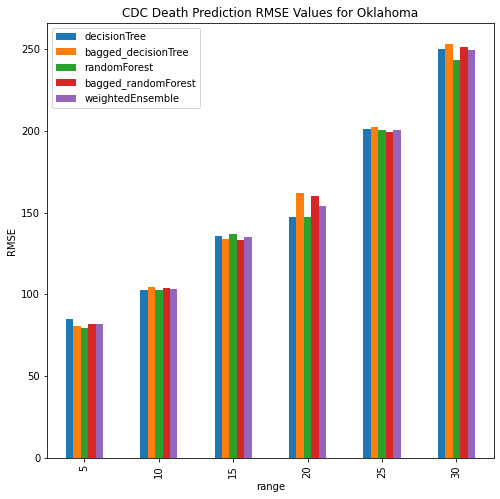

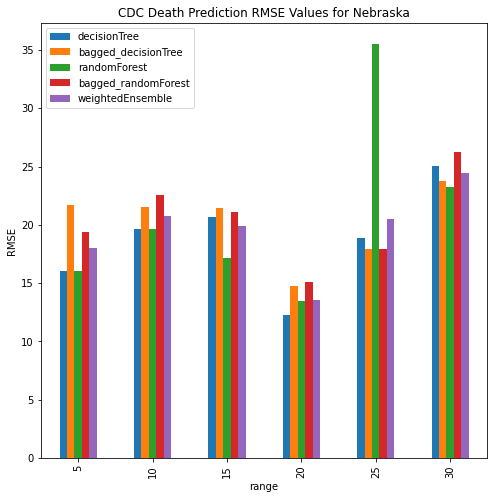

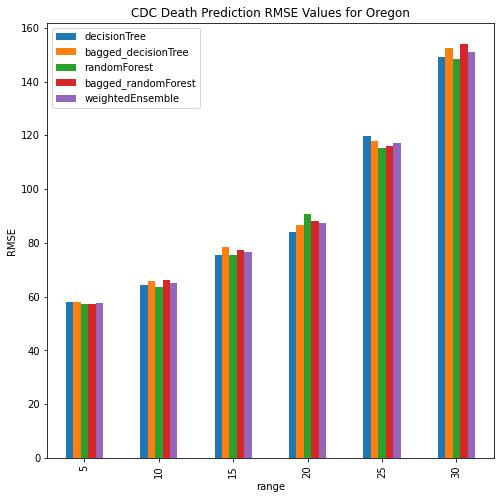

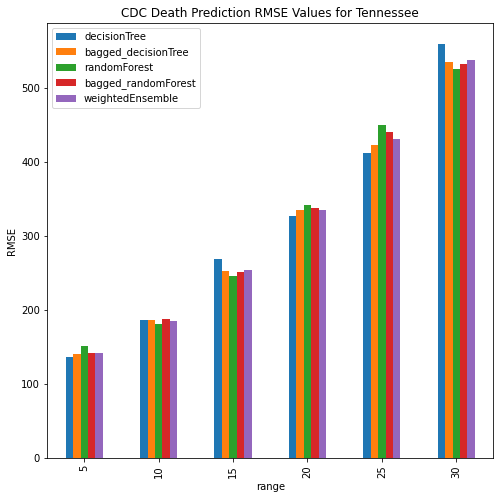

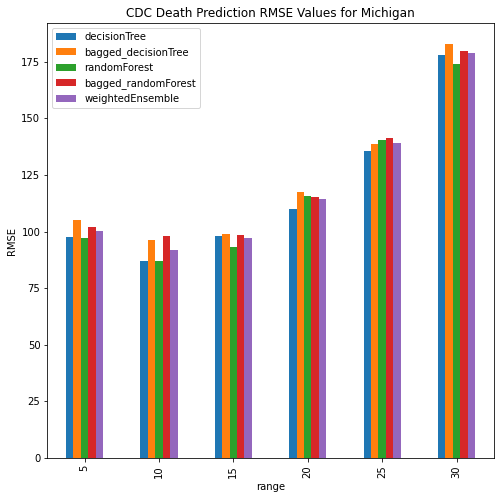

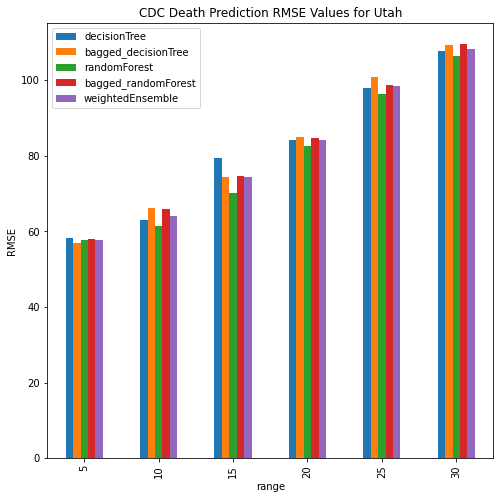

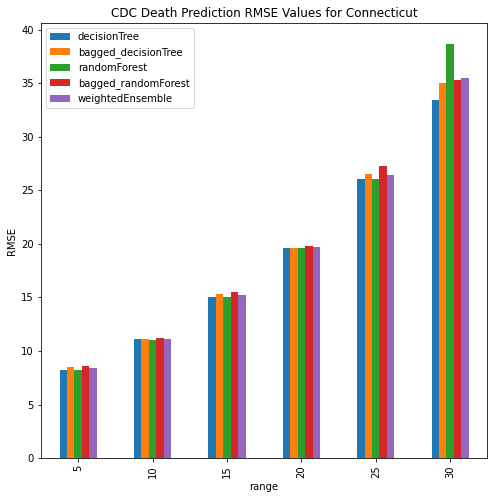

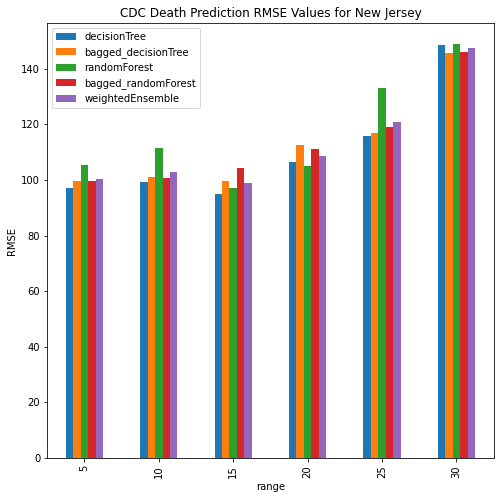

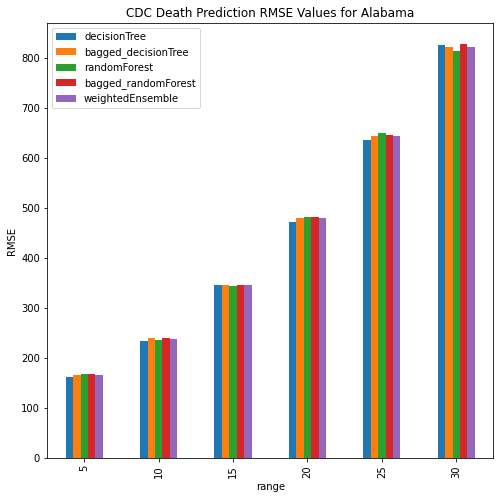

In [55]:
for i, file in enumerate(all_files):    
    feature_file = './Predictions/State/'+all_files[i]
    if "cdc_death" in feature_file:
        state = file.split('_')[0]
        rmse_df = pd.read_csv(feature_file)
        rmse_df_sub = rmse_df[rmse_df['range']%5==0]
        ax=rmse_df_sub.plot(x='range',
        kind='bar',
        stacked=False,
        title='CDC Death Prediction RMSE Values for '+state,
            figsize=(8,8), ylabel='RMSE')
        ax.get_figure().savefig('/content/drive/MyDrive/MLProject/team_se7en/Images/'+str(i)+".png")
        #ax.get_figure().savefig(str(i)+".png")

In [ ]:
# /content/drive/MyDrive/MLProject/team_se7en/Images